# SEMMA

Individual stocks: Dataframe 1 - stock 1

- Exploration
- Univariate analysis - Open, High, Close, Low, Volume - Histograms + Boxplots
- Bivaraite analysis - Correlation matrix
- Hypothesis: Multivariate - at least 1
- EDA for time series: Trend, Seasonality, Cyclical varaition, Irregular events
- Modeling - ARIMA, PACF, ACF, ADF, Seasonality
- Minimum of 2 ARIMA models, 2 SARIMA models

Individual stocks: Dataframe 2 - stock 2, and stock 3



Trend - Looking at the slope
Cyclical Variation - Same repition over the same span of time
Seasonality - Looking at the nature of the line over one year/whatever span of time
Irregular Events - Outliers (Pandemic, wars, sanctions, political conflict)

# Data Exploration between the stocks

1. Either 1 dataframe combining all stocks
2. 3 individual, correlation, trends, irregular
3. Think of the 3 stocks as a portfolio and figure out if there any patterns

Trend - Looking at the slope

Cyclical Variation - Same repition over the same span of time

Seasonality - Looking at the nature of the line over one year/whatever span of time

Irregular Events - Outliers (Pandemic, wars, sanctions, political conflict)



---



#Project

In [ ]:
!pip install pmdarima


In [ ]:
!pip install --upgrade yfinance

# Stock 1 - Nvidia

In [ ]:
import yfinance as yf
import pandas as pd
ticker_nvda = "nvda"

df_nvda = yf.download(ticker_nvda, start="2020-01-01", end="2025-01-01")
df_nvda.reset_index(inplace=True)

if isinstance(df_nvda.columns, pd.MultiIndex):
    df_nvda.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_nvda.columns]

# Rename the 'Date' column
df_nvda = df_nvda.rename(columns={'Date_': 'Date_NVDA'})

df_nvda.head()

[*********************100%***********************]  1 of 1 completed


Date_NVDA  Close_NVDA  High_NVDA  Low_NVDA  Open_NVDA  Volume_NVDA
0 2020-01-02    5.972710   5.972710  5.893293   5.943831    237536000
1 2020-01-03    5.877112   5.920928  5.828067   5.852963    205384000
2 2020-01-06    5.901756   5.906984  5.757611   5.783751    262636000
3 2020-01-07    5.973208   6.019016  5.885077   5.930138    314856000
4 2020-01-08    5.984411   6.025738  5.928894   5.968976    277108000

Nvidia stock prices from 1/1/2020 to 1/1/2025 are first imported.

#Nvidia EDA

In [ ]:
df_nvda.shape

(1258, 6)

The dataset has 1258 rows, which represents 1258 trading days which likely excludes weekends and other non-trading days.

In [ ]:
# prompt: check for missing values

df_nvda.isnull().sum()
df_nvda.isna().sum()


Date_NVDA      0
Close_NVDA     0
High_NVDA      0
Low_NVDA       0
Open_NVDA      0
Volume_NVDA    0
dtype: int64

The dataset does not have any missing values.

In [ ]:
df_nvda.head()

Date_NVDA  Close_NVDA  High_NVDA  Low_NVDA  Open_NVDA  Volume_NVDA
0 2020-01-02    5.972710   5.972710  5.893293   5.943831    237536000
1 2020-01-03    5.877112   5.920928  5.828067   5.852963    205384000
2 2020-01-06    5.901756   5.906984  5.757611   5.783751    262636000
3 2020-01-07    5.973208   6.019016  5.885077   5.930138    314856000
4 2020-01-08    5.984411   6.025738  5.928894   5.968976    277108000

## Nvidia - Histograms

In [ ]:
# prompt: Open_NVDA    Close_NVDA	High_NVDA	Low_NVDA	Volume_NVDA Histograms of nvda (in the same order), provide x and y axis titles. provide volume scaling ratio

import matplotlib.pyplot as plt

# Assuming df_nvda is already defined from the previous code

# Histograms
fig, axes = plt.subplots(3, 2, figsize=(15, 10))  # Adjust figsize as needed

axes[0, 0].hist(df_nvda['Open_NVDA'], bins=20, edgecolor='black')
axes[0, 0].set_title('Open_NVDA Histogram')
axes[0, 0].set_xlabel('Open Price')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df_nvda['Close_NVDA'], bins=20, edgecolor='black')
axes[0, 1].set_title('Close_NVDA Histogram')
axes[0, 1].set_xlabel('Close Price')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(df_nvda['High_NVDA'], bins=20, edgecolor='black')
axes[1, 0].set_title('High_NVDA Histogram')
axes[1, 0].set_xlabel('High Price')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(df_nvda['Low_NVDA'], bins=20, edgecolor='black')
axes[1, 1].set_title('Low_NVDA Histogram')
axes[1, 1].set_xlabel('Low Price')
axes[1, 1].set_ylabel('Frequency')


# Volume Histogram with scaling (adjust the scaling ratio as needed)
scaling_ratio = 0.00001  # Example scaling ratio
axes[2, 0].hist(df_nvda['Volume_NVDA'] * scaling_ratio, bins=20, edgecolor='black')
axes[2, 0].set_title('Volume_NVDA Histogram (Scaled)')
axes[2, 0].set_xlabel('Volume (Scaled)')
axes[2, 0].set_ylabel('Frequency')

# Adjust this based on if you have a 6th plot
axes[2, 1].set_axis_off()


plt.tight_layout()
plt.show()


1. Open, Close, High, and Low Price Histograms:

- The 4 price histograms are nearly identical in features, likely due to the interconnectedness of the 4 variables as they all are representations of price. The graphs follows a normal distribution, they are also right-skewed with low kurtosis.

- The majority of NVDA's opening prices are concentrated below $50, with a sharp decline in frequency as prices increase. This indicates that for a long period, NVDA traded at relatively low prices before experiencing significant growth.

Relevant Real-World Events:

- Pre-2020: NVDA was already a strong player in AI and gaming but had yet to see its biggest price surge.

- 2020-2022 Boom: The COVID-19 pandemic accelerated the demand for GPUs (gaming, AI, crypto mining), leading to a significant stock rally.

- 2023-2024 AI Boom: NVDA benefited from the AI revolution (ChatGPT, generative AI), skyrocketing its valuation.

2. Volume Histogram:

- Unlike the price histograms, the volume histogram exhibits a more balanced, near-normal distribution, meaning that NVDA's daily traded volume has been relatively stable over time, without extreme fluctuations.

- The highest concentration of trading volume is around 4,000-6,000 (scaled units), indicating that most trading days saw similar activity levels. This suggests that NVDA maintains strong liquidity, a crucial factor for institutional and retail investors alike.

- Lower Tail Behavior: While lower-volume trading days exist, they are not as frequent, showing that even on slow days, NVDA remains actively traded.

- Market Influences on NVDA Trading Volume
Pre-2020: NVDA was steadily growing in gaming and AI but lacked extreme trading spikes.

Relevant Real-World Events:

- 2020-2021 Pandemic & Crypto Mining Surge: Increased GPU demand (gaming, AI, and crypto) drove higher daily trading volumes.

- 2022 Tech Stock Correction: After the 2021 highs, the stock market correction led to fluctuating volume, as uncertainty affected institutional and retail investors.

- 2023-2024 AI Boom: The explosion in AI applications (ChatGPT, generative AI) caused surges in trading volume, with institutions buying heavily into NVDA as a market leader in AI chips.

## Nvidia - Boxplots

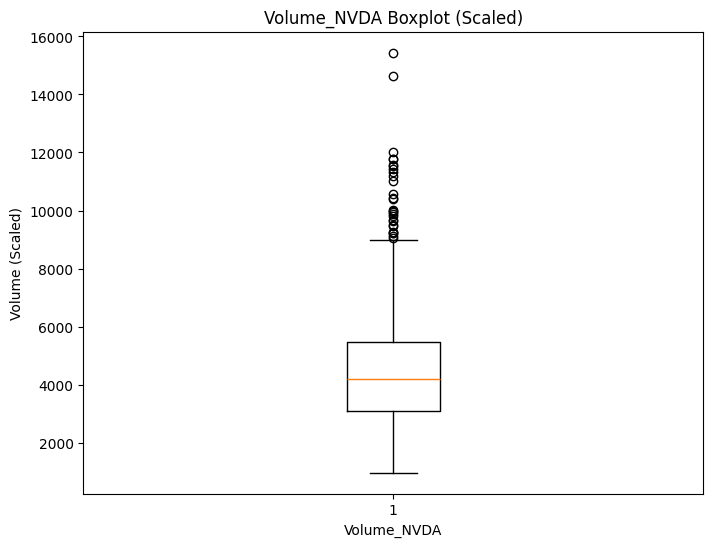

In [ ]:
# prompt: make nvda boxplots with their respective x label and y label in the axis

import matplotlib.pyplot as plt
# Boxplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].boxplot(df_nvda['Open_NVDA'])
axes[0, 0].set_title('Open_NVDA Boxplot')
axes[0, 0].set_xlabel('Open_NVDA')
axes[0, 0].set_ylabel('Price')

axes[0, 1].boxplot(df_nvda['Close_NVDA'])
axes[0, 1].set_title('Close_NVDA Boxplot')
axes[0, 1].set_xlabel('Close_NVDA')
axes[0, 1].set_ylabel('Price')

axes[1, 0].boxplot(df_nvda['High_NVDA'])
axes[1, 0].set_title('High_NVDA Boxplot')
axes[1, 0].set_xlabel('High_NVDA')
axes[1, 0].set_ylabel('Price')

axes[1, 1].boxplot(df_nvda['Low_NVDA'])
axes[1, 1].set_title('Low_NVDA Boxplot')
axes[1, 1].set_xlabel('Low_NVDA')
axes[1, 1].set_ylabel('Price')


plt.tight_layout()
plt.show()

# Volume Boxplot (consider scaling for better visualization)
plt.figure(figsize=(8, 6))
plt.boxplot(df_nvda['Volume_NVDA'] * scaling_ratio)  # Use the same scaling ratio as in the histogram
plt.title('Volume_NVDA Boxplot (Scaled)')
plt.xlabel('Volume_NVDA')
plt.ylabel('Volume (Scaled)')
plt.show()


1. Open, Close, High, and Low Boxplot Analysis:

- The Open, Close, High, and Low prices follow a similar distribution, with IQRs mostly between $10 and $50.

- Outliers above $100 in all charts suggest NVDA experienced sharp bullish rallies.

- The stock's High price consistently exceeds the Open & Close, confirming intraday upward movements.

- The Low price rarely dips significantly below the Open, indicating strong buying support at lower levels.



2. Volume Boxplot Boxplot Analysis:

- The median trading volume (orange line) is around 4000 units (scaled), meaning NVDA typically trades at this level.

- The interquartile range (IQR) spans from 2000 to 6000, indicating that most trading days fall within this range.

- There are many outliers above 8000, showing that NVDA occasionally experiences significant spikes in trading volume.

- The two extreme outliers (15,000-16,000) suggest days with unusually high trading activity, likely due to events like the AI & Gaming booms, trading hype among retail investors, and other factors that were previously discussed.

## Nvidia - Correlation Matrix

In [ ]:
# prompt: build a correlation matrix

import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df_nvda[['Open_NVDA', 'High_NVDA', 'Low_NVDA', 'Close_NVDA', 'Volume_NVDA']].corr()

# Display the correlation matrix
print(correlation_matrix)

# You can also visualize the correlation matrix using a heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of NVDA Stock Data')
plt.show()


             Open_NVDA  High_NVDA  Low_NVDA  Close_NVDA  Volume_NVDA
Open_NVDA     1.000000   0.999782  0.999661    0.999345    -0.247223
High_NVDA     0.999782   1.000000  0.999663    0.999670    -0.243159
Low_NVDA      0.999661   0.999663  1.000000    0.999768    -0.252632
Close_NVDA    0.999345   0.999670  0.999768    1.000000    -0.248415
Volume_NVDA  -0.247223  -0.243159 -0.252632   -0.248415     1.000000


### Analyzing the 2 Highest Correlating vs 2 Lowest Correlating Variables

In [ ]:
# prompt: Plot scatter plots for open vs high, close vs low, volume vs high, volume vs open. Display their correlation coefficients as well.

import matplotlib.pyplot as plt
# Scatter plots and correlation coefficients
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Open vs High
axes[0, 0].scatter(df_nvda['Open_NVDA'], df_nvda['High_NVDA'])
axes[0, 0].set_title('Open_NVDA vs High_NVDA')
axes[0, 0].set_xlabel('Open_NVDA')
axes[0, 0].set_ylabel('High_NVDA')
correlation_coefficient = df_nvda['Open_NVDA'].corr(df_nvda['High_NVDA'])
axes[0,0].text(0.05, 0.9, f"Correlation: {correlation_coefficient:.2f}", transform=axes[0,0].transAxes)

# Close vs Low
axes[0, 1].scatter(df_nvda['Close_NVDA'], df_nvda['Low_NVDA'])
axes[0, 1].set_title('Close_NVDA vs Low_NVDA')
axes[0, 1].set_xlabel('Close_NVDA')
axes[0, 1].set_ylabel('Low_NVDA')
correlation_coefficient = df_nvda['Close_NVDA'].corr(df_nvda['Low_NVDA'])
axes[0,1].text(0.05, 0.9, f"Correlation: {correlation_coefficient:.2f}", transform=axes[0,1].transAxes)

# Volume vs High
axes[1, 0].scatter(df_nvda['Volume_NVDA'], df_nvda['High_NVDA'])
axes[1, 0].set_title('Volume_NVDA vs High_NVDA')
axes[1, 0].set_xlabel('Volume_NVDA')
axes[1, 0].set_ylabel('High_NVDA')
correlation_coefficient = df_nvda['Volume_NVDA'].corr(df_nvda['High_NVDA'])
axes[1,0].text(0.7, 0.9, f"Correlation: {correlation_coefficient:.2f}", transform=axes[1,0].transAxes)

# Volume vs Open
axes[1, 1].scatter(df_nvda['Volume_NVDA'], df_nvda['Open_NVDA'])
axes[1, 1].set_title('Volume_NVDA vs Open_NVDA')
axes[1, 1].set_xlabel('Volume_NVDA')
axes[1, 1].set_ylabel('Open_NVDA')
correlation_coefficient = df_nvda['Volume_NVDA'].corr(df_nvda['Open_NVDA'])
axes[1,1].text(0.7, 0.9, f"Correlation: {correlation_coefficient:.2f}", transform=axes[1,1].transAxes)

plt.tight_layout()
plt.show()


1. Open_NVDA vs. High_NVDA & Close_NVDA vs. Low_NVDA

Perfect Correlation (1.00): These plots demonstrate a perfect correlation, indicating that the opening price strongly predicts the day's high, and the closing price closely aligns with the day's low. This pattern is typical in stock trading, where daily price ranges are influenced by opening and closing values.

2. Volume_NVDA vs. High_NVDA & Volume_NVDA vs. Open_NVDA

Weak Negative Correlation (-0.24 and -0.25): These plots suggest that higher trading volumes are slightly associated with lower prices. This trend may reflect increased selling activity during periods of high volume, leading to modest price declines.

## Nvidia - Checking for Seasonality

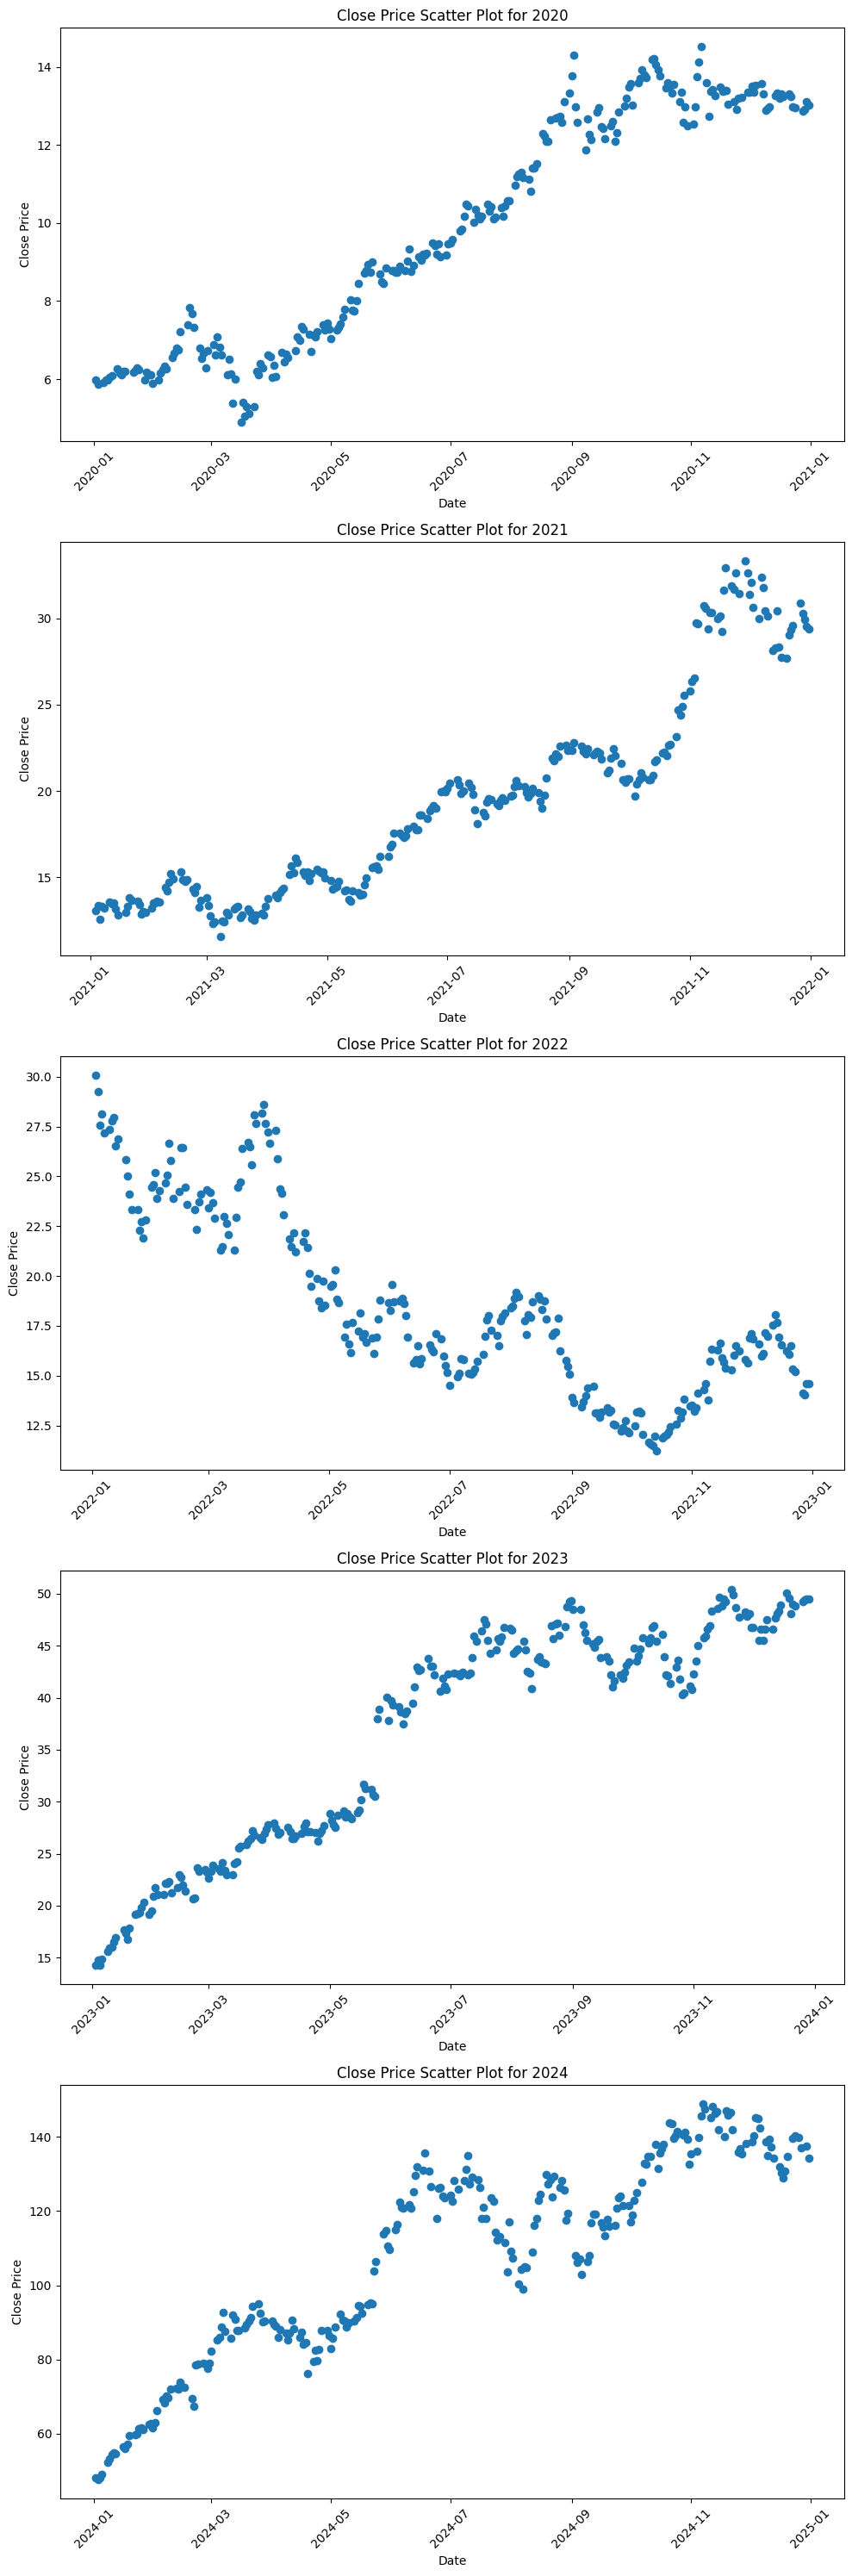

In [ ]:
# prompt: create five scatter plots of the close price for every year

import pandas as pd
import matplotlib.pyplot as plt
# Assuming df_nvda is your DataFrame and 'Date_NVDA' is the date column

# Convert 'Date_NVDA' to datetime if it's not already
df_nvda['Date_NVDA'] = pd.to_datetime(df_nvda['Date_NVDA'])

# Create a year column
df_nvda['Year'] = df_nvda['Date_NVDA'].dt.year

# Group data by year
years = df_nvda['Year'].unique()

# Create subplots for each year
fig, axes = plt.subplots(len(years), 1, figsize=(10, 6 * len(years)))

for i, year in enumerate(years):
    year_data = df_nvda[df_nvda['Year'] == year]
    axes[i].scatter(year_data['Date_NVDA'], year_data['Close_NVDA'])
    axes[i].set_title(f'Close Price Scatter Plot for {year}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Close Price')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability


plt.tight_layout()
plt.show()


According to the 5 graphs, only graphs 2023-2024 and 2024-2025 displays similar patterns thus suggesting seasonality within those time-periods.

Possible Causes:

1. Market Cycles & Institutional Trading Patterns

Institutional investors, such as hedge funds and mutual funds, often rebalance their portfolios on a quarterly or yearly basis. This can create repeated price patterns as buying or selling pressures align with these rebalancing schedules.
Earnings seasons, which occur quarterly, also drive repeated fluctuations in stock prices. Strong earnings reports tend to boost stock prices, while weaker-than-expected results can lead to declines.

2. Product Launches & Business Seasonality

Nvidia has recurring product cycles, especially in GPUs for gaming, AI, and data centers. Major product launches or updates typically happen in the second half of the year, often influencing the stock price.
The demand for Nvidia's gaming and AI chips often spikes during Q4, driven by holiday sales and increased corporate tech spending before year-end budgets close.

3. Broader Economic Trends & Market Sentiment

Macroeconomic factors, such as interest rate decisions by the Federal Reserve, tend to influence tech stocks in recurring ways. Rate hikes can slow down growth stocks, while rate cuts provide a bullish boost.
Tech sector momentum often follows similar trends year-over-year, especially in response to investor sentiment toward AI, semiconductor demand, and regulatory news.

4. Nvidia-Specific Events

Nvidia's annual GPU Technology Conference (GTC) often acts as a price catalyst. Investors react to new developments, partnerships, and AI advancements announced at this event, leading to a potential seasonal rally.
Stock splits or buybacks can also influence stock price behavior in recurring ways if Nvidia implements them during similar time periods.

## Nvidia - Multivariate Scatter Plot

Hypothesis: As explored previously, it may be that many shares of Nvidia would be bought around 2022 and 2023 as the market factors and investor hype around the stock start to erupt.

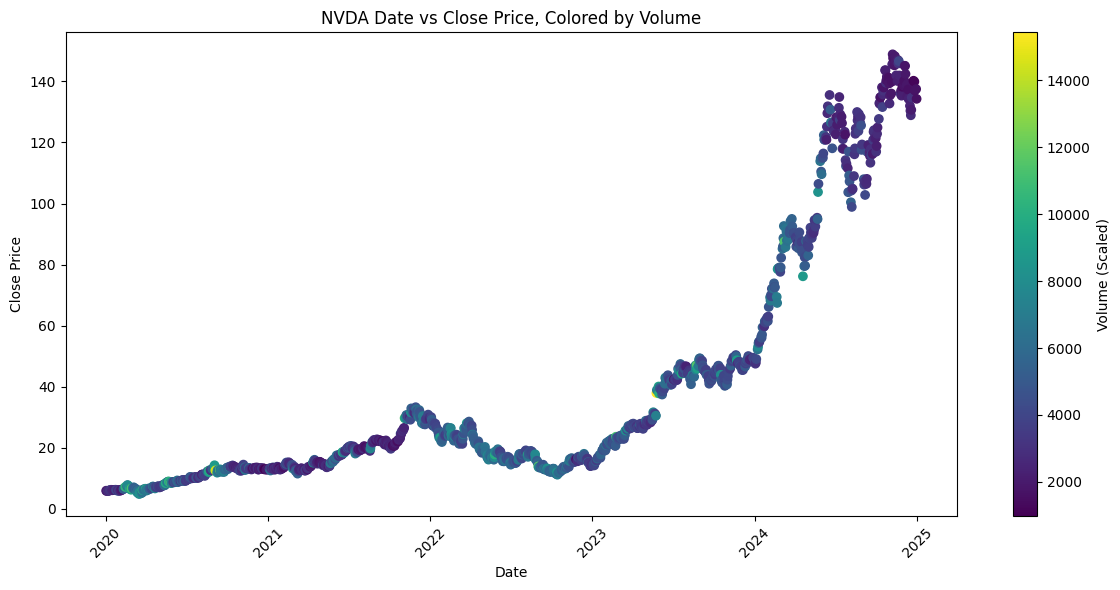

In [ ]:
# prompt: plot a scatter plot date_nvda vs close_nvda, colored by volume_nvda (with provide volume scaling ratio)

import matplotlib.pyplot as plt
# Assuming df_nvda and scaling_ratio are already defined from the previous code

plt.figure(figsize=(12, 6))
plt.scatter(df_nvda['Date_NVDA'], df_nvda['Close_NVDA'], c=df_nvda['Volume_NVDA'] * scaling_ratio, cmap='viridis')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('NVDA Date vs Close Price, Colored by Volume')
plt.colorbar(label='Volume (Scaled)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Analysis of the Scatter Plot
1. General Upward Trend
The scatter plot shows a consistent increase in Nvidia's stock price over the years, indicating a long-term bullish trend. This suggests strong fundamentals, growing revenue, and increasing investor confidence. Factors contributing to this trend could include:

- Advancements in AI and data centers, which have fueled Nvidia’s business expansion.

- Strong financial performance, with rising revenue and profit margins.

- Market leadership in GPUs, making Nvidia a key player in gaming, AI, and autonomous vehicles.

2. No Clear Cyclical Variation

Cyclical variations are usually tied to broader economic cycles (e.g., boom and recession periods). The chart does not show repeated rises and falls at regular intervals, suggesting that Nvidia’s stock performance is not strictly tied to economic cycles. Instead, the trend appears driven more by technological innovation and industry demand rather than predictable market cycles like retail seasonality or commodity price fluctuations.

3. No Clear Signs of Seasonality

Seasonality refers to recurring price patterns at fixed time intervals, such as yearly or quarterly trends. Unlike retail or travel industries that exhibit strong seasonal trends (e.g., higher sales in Q4 due to holidays), Nvidia’s price movement does not show consistent dips or peaks at specific times of the year. However, occasional spikes in volume might align with:

- Earnings releases causing temporary price fluctuations.

- Product launches (e.g., new GPUs) influencing investor sentiment.

- Macroeconomic news (e.g., interest rate decisions, AI market growth) driving temporary surges.

4. No Apparent Irregular Points (Outliers)

There are no extreme anomalies or sudden price crashes/spikes that deviate significantly from the overall trend. This suggests:

- Nvidia’s stock price has grown steadily without major unexpected shocks (e.g., bankruptcy fears, regulatory crackdowns).

- Investor sentiment has remained largely positive, without panic-driven selloffs or speculative bubbles.

- Volume does not show extreme fluctuations, indicating relatively stable trading activity.

Lastly, the stated hypothesis appears to be proven correct as the graph shows that the volume of shares that were traded was relatively high around 2022 and 2023 for previously explained reasons.

# Nvidia - ARIMA Modelling

Before modelling the ADF, PACF, and ACF tests will first be conducted to identify the optimum p, q, d values.

### Using ADF test to find differencing value (d)

In [ ]:
# prompt: Run the ADF test

from statsmodels.tsa.stattools import adfuller

# Assuming df_nvda is already defined and contains the 'Close_NVDA' column

# Perform the Augmented Dickey-Fuller test
result = adfuller(df_nvda['Close_NVDA'])

# Print the test results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: 0.913628
p-value: 0.993266
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


ADF test results indicate that Nvidia closing stock price dataset is still non-stationary because:

1. p-value (0.993266) > 0.05, meaning we fail to reject the null hypothesis (data has a unit root, meaning it's non-stationary).

2. ADF Statistic (0.913628) is higher than all critical values, thus confirming non-stationarity.


In [ ]:
# prompt: Apply first-order differencing (d=1)

# Assuming df_nvda is already defined from the previous code and contains 'Close_NVDA'

# Apply first-order differencing to the 'Close_NVDA' column
df_nvda['Close_NVDA_Diff'] = df_nvda['Close_NVDA'].diff(periods=1)

# Drop the first row which will have NaN after differencing
df_nvda = df_nvda.dropna(subset=['Close_NVDA_Diff'])

# Now you can use df_nvda['Close_NVDA_Diff'] for further analysis or modeling
# For example, re-run the ADF test on the differenced series:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_nvda['Close_NVDA_Diff'])
print('ADF Statistic after differencing: %f' % result[0])
print('p-value after differencing: %f' % result[1])
print('Critical Values after differencing:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic after differencing: -6.946167
p-value after differencing: 0.000000
Critical Values after differencing:
	1%: -3.436
	5%: -2.864
	10%: -2.568


After first-order differencing (d = 1) shows:

1. ADF Statistic (-6.946167) is much lower than all critical values, thus strongly suggesting stationarity.

2. p-value (0.000000) < 0.05, thus confirming that the data is now stationary.

### Using PACF to identify (p)

In [ ]:
# prompt: Plot PACF

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Assuming df_nvda and 'Close_NVDA_Diff' are already defined
plot_pacf(df_nvda['Close_NVDA_Diff'], lags=20)  # Adjust the number of lags as needed
plt.show()


p = 1

### Using ACF to identify (q)

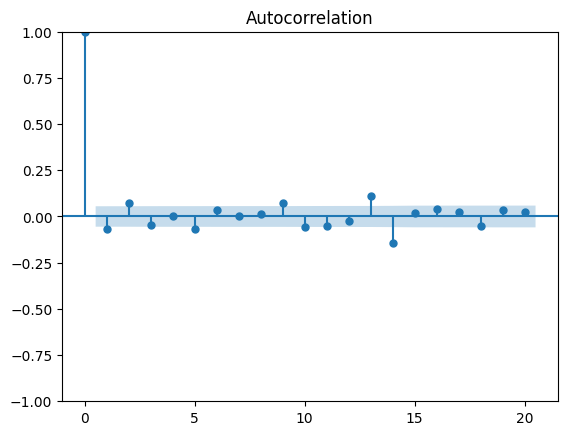

In [ ]:
# prompt: plot acf

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_nvda['Close_NVDA_Diff'], lags=20)
plt.show()


q = 1

However, it is worth noting that both the PACF and ACF graphs seems to begin stabilizing and show a **gradual** decent past point 13. Therefore, varying combinations of p and q values within 1 to 13 will be tested to find the best hyperparameter combinations.

### Building ARIMA Baseline model (Order: 1, 1, 1)

Mean Absolute Error (MAE): 58.34527131873276
Mean Squared Error (MSE): 4123.3093264540985
Root Mean Squared Error (RMSE): 64.21299966871271
R² Score: -4.6952


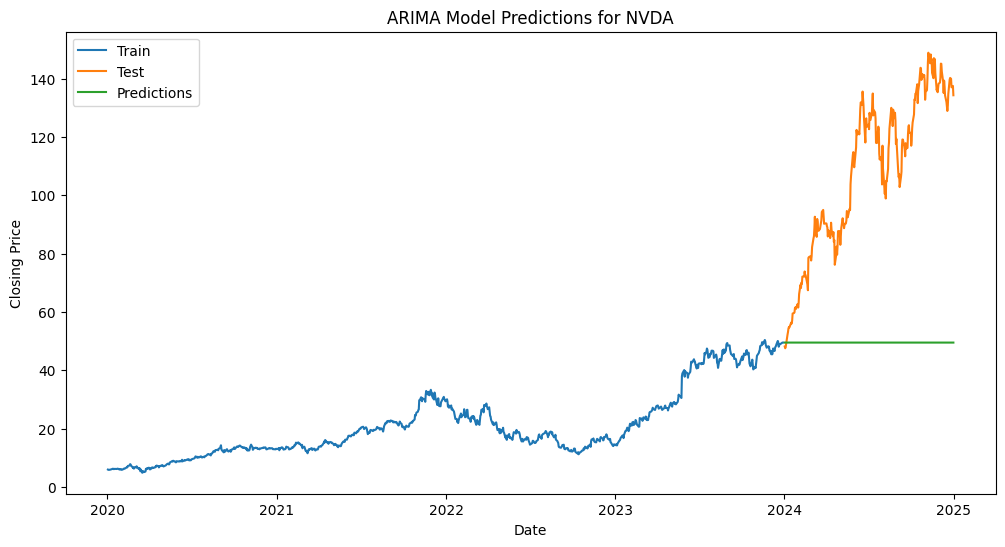

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Assuming df_nvda is already defined and contains 'Close_NVDA' and 'Date_NVDA' columns
# Convert 'Date_NVDA' to datetime objects if it's not already
df_nvda['Date_NVDA'] = pd.to_datetime(df_nvda['Date_NVDA'])

# Train-test split
train_size = int(len(df_nvda) * 0.8)
train_nvda, test_nvda = df_nvda[:train_size], df_nvda[train_size:]

# Build and train the ARIMA model (p=1, d=1, q=1)
order = (1, 1, 1)
model = ARIMA(train_nvda['Close_NVDA'], order=order)
model_fit = model.fit()

# Make predictions
predictions_nvda = model_fit.forecast(steps=len(test_nvda))

mae = mean_absolute_error(test_nvda['Close_NVDA'], predictions_nvda)
mse = mean_squared_error(test_nvda['Close_NVDA'], predictions_nvda)
rmse = sqrt(mse)
r2 = r2_score(test_nvda['Close_NVDA'], predictions_nvda)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2:.4f}')  # R-squared value

# Visualize Predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_nvda, x='Date_NVDA', y='Close_NVDA', label='Train')
sns.lineplot(data=test_nvda, x='Date_NVDA', y='Close_NVDA', label='Test')
sns.lineplot(x=test_nvda['Date_NVDA'], y=predictions_nvda, label='Predictions')
plt.title('ARIMA Model Predictions for NVDA')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


Despite using the seemingly optimal order of values from the tests, it is apparent that the RMSE, MAE, MSE, and R^2 shows incredibly inaccurate predictions made by the model, making it highly unreliable. More modelling with better hyperparameters is required.



### Finding the best ARIMA models (p & q values in the 1 to 13 range)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # Import warnings module
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Suppress warnings
warnings.filterwarnings("ignore")


# Train-test split (80% train, 20% test)
train_size = int(len(df_nvda) * 0.8)
train_nvda, test_nvda = df_nvda.iloc[:train_size], df_nvda.iloc[train_size:]

# Iterate through p and q values (1 to 12 in steps of 4)
results = []

for p in range(1, 13, 4):
    for q in range(1, 13, 4):
        try:
            # Train ARIMA model with given (p, d, q)
            order = (p, 1, q)  # d=1 assumed based on stationarity check
            model = ARIMA(train_nvda['Close_NVDA'], order=order)
            model_fit = model.fit()

            # Make predictions
            predictions_nvda = model_fit.forecast(steps=len(test_nvda))

            # Evaluate model performance
            mae = mean_absolute_error(test_nvda['Close_NVDA'], predictions_nvda)
            mse = mean_squared_error(test_nvda['Close_NVDA'], predictions_nvda)
            rmse = sqrt(mse)
            r2 = r2_score(test_nvda['Close_NVDA'], predictions_nvda)

            # Store results
            results.append([p, q, mae, mse, rmse, r2])

        except Exception as e:
            print(f"Skipping ARIMA({p}, 1, {q}) due to error: {e}")
            results.append([p, q, None, None, None, None])

# Convert results into a Pandas DataFrame
results_df = pd.DataFrame(results, columns=['p', 'q', 'MAE', 'MSE', 'RMSE', 'R^2'])

# Display results
import IPython.display as display
display.display(results_df)


p  q        MAE          MSE       RMSE       R^2
0  1  1  58.345270  4123.309221  64.212999 -4.695210
1  1  5  58.288054  4116.513039  64.160058 -4.685823
2  1  9  58.272101  4114.588326  64.145057 -4.683164
3  5  1  58.258095  4112.897743  64.131878 -4.680829
4  5  5  58.225629  4108.933015  64.100960 -4.675353
5  5  9  58.177734  4103.232551  64.056479 -4.667480
6  9  1  58.225137  4108.923104  64.100882 -4.675339
7  9  5  58.243965  4111.370620  64.119971 -4.678720
8  9  9  58.284829  4116.059213  64.156521 -4.685196

The models listed above were created to determine which p and q parameters produced the best results. These values were selected from a range of 1 to 12 based on the PACF & ACF tests, which showed a sudden tick around the 12 mark. Therefore, the values between 1 (where sharp drop occurred) and 12 (where a slight tick occurred) were chosen. To balance accuracy and efficiency, values were tested at intervals of 4, ensuring reasonable runtimes without sacrificing model performance.

Order 5, 1, 9 is found to produce predictions with the best evaluation metrics out of the list.

### ARIMA Model (5, 1, 9)

Mean Absolute Error (MAE): 58.168078730429116
Mean Squared Error (MSE): 4102.072386637337
Root Mean Squared Error (RMSE): 64.04742295078965
R² Score: -4.6659


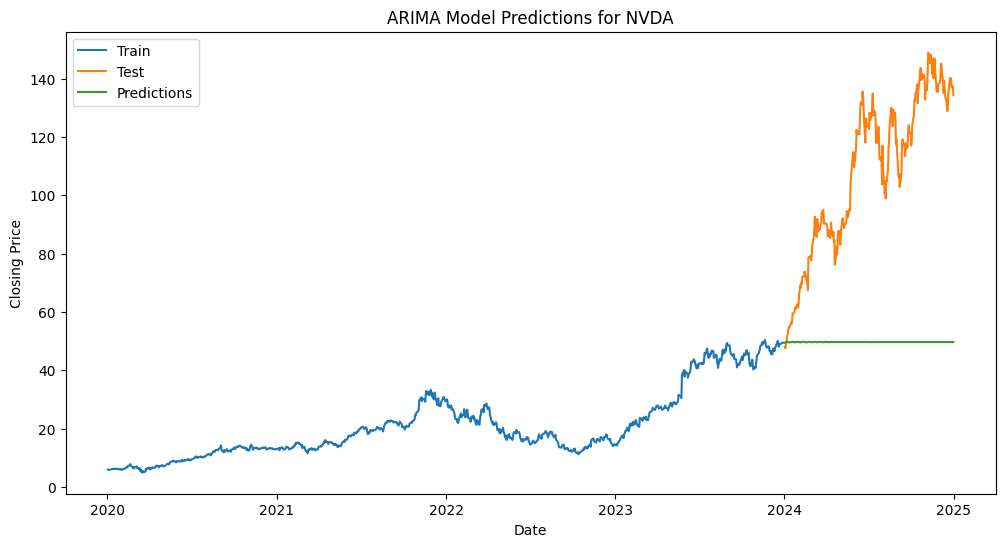

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import warnings  # Import warnings module

# Suppress warnings
warnings.filterwarnings("ignore")

# Assuming df_nvda is already defined and contains 'Close_NVDA' and 'Date_NVDA' columns
# Convert 'Date_NVDA' to datetime objects if it's not already
df_nvda['Date_NVDA'] = pd.to_datetime(df_nvda['Date_NVDA'])

# Train-test split
train_size = int(len(df_nvda) * 0.8)
train_nvda, test_nvda = df_nvda[:train_size], df_nvda[train_size:]

# Build and train the ARIMA model (p=1, d=1, q=1)
order = (5, 1, 9)
model = ARIMA(train_nvda['Close_NVDA'], order=order)
model_fit = model.fit()

# Make predictions
predictions_nvda = model_fit.forecast(steps=len(test_nvda))

# Evaluate the model
mae = mean_absolute_error(test_nvda['Close_NVDA'], predictions_nvda)
mse = mean_squared_error(test_nvda['Close_NVDA'], predictions_nvda)
rmse = sqrt(mse)
r2 = r2_score(test_nvda['Close_NVDA'], predictions_nvda)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2:.4f}')  # R-squared value

# Visualize Predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_nvda, x='Date_NVDA', y='Close_NVDA', label='Train')
sns.lineplot(data=test_nvda, x='Date_NVDA', y='Close_NVDA', label='Test')
sns.lineplot(x=test_nvda['Date_NVDA'], y=predictions_nvda, label='Predictions')
plt.title('ARIMA Model Predictions for NVDA')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


Despite being the best from the list of models, it is apparent that the RMSE, MAE, MSE, and R^2 shows incredibly inaccurate predictions made by the model, making it highly unreliable.

## Nvidia - ARIMA Modelling (2023 & 2024)

 A new dataset of values from years 2023 and 2024 will be used as seasonality was found between these periods, which may allow the models to produce more accurate results.

In [ ]:
# prompt: import a new nvda dataset that only includes 1/1/23 to 1/1/25. make sure the dataframe uses a different name, call it df2_nvda

import pandas as pd
# Create df2_nvda with data from 2023-01-01 to 2025-01-01
df2_nvda = yf.download(ticker_nvda, start="2023-01-01", end="2025-01-01")
df2_nvda.reset_index(inplace=True)

if isinstance(df2_nvda.columns, pd.MultiIndex):
    df2_nvda.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df2_nvda.columns]

# Rename the 'Date' column
df2_nvda = df2_nvda.rename(columns={'Date_': 'Date_NVDA'})

df2_nvda.head()


[*********************100%***********************]  1 of 1 completed


Date_NVDA  Close_NVDA  High_NVDA   Low_NVDA  Open_NVDA  Volume_NVDA
0 2023-01-03   14.304595  14.985101  14.085754  14.840206    401277000
1 2023-01-04   14.738279  14.842204  14.230649  14.556412    431324000
2 2023-01-05   14.254633  14.553415  14.137717  14.480469    389168000
3 2023-01-06   14.848200  14.999090  14.023800  14.463479    405044000
4 2023-01-09   15.616640  16.044328  15.129994  15.272890    504231000

### Running the ADF, PACF, and ACF tests on df2_NVDA

Before modelling with the new dataset, the ADF, PACF, and ACF tests will first be conducted to identify the optimum p, q, d values.

ADF Statistic: -0.370918
p-value: 0.914842
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570
ADF Statistic after differencing: -6.600949
p-value after differencing: 0.000000
Critical Values after differencing:
	1%: -3.444
	5%: -2.867
	10%: -2.570


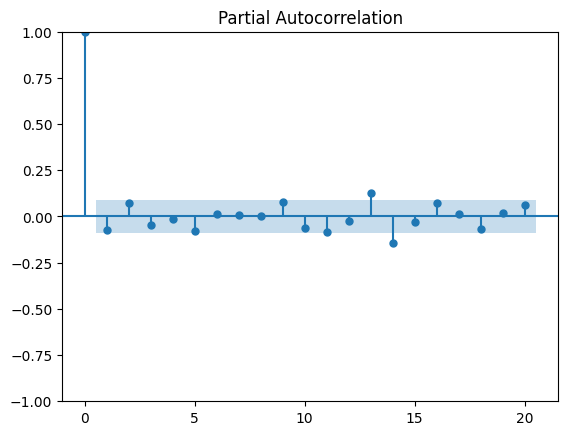

In [ ]:
# prompt: Run the ADF, PACF, and ACF tests again on df2_nvda

import matplotlib.pyplot as plt
# Assuming df2_nvda is already defined and contains the 'Close_NVDA' column

# Perform the Augmented Dickey-Fuller test
result = adfuller(df2_nvda['Close_NVDA'])

# Print the test results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Apply first-order differencing to the 'Close_NVDA' column
df2_nvda['Close_NVDA_Diff'] = df2_nvda['Close_NVDA'].diff(periods=1)

# Drop the first row which will have NaN after differencing
df2_nvda = df2_nvda.dropna(subset=['Close_NVDA_Diff'])

# Now you can use df2_nvda['Close_NVDA_Diff'] for further analysis or modeling
# For example, re-run the ADF test on the differenced series:

result = adfuller(df2_nvda['Close_NVDA_Diff'])
print('ADF Statistic after differencing: %f' % result[0])
print('p-value after differencing: %f' % result[1])
print('Critical Values after differencing:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Plot PACF
plot_pacf(df2_nvda['Close_NVDA_Diff'], lags=20)  # Adjust the number of lags as needed
plt.show()

# Plot ACF
plot_acf(df2_nvda['Close_NVDA_Diff'], lags=20)
plt.show()


The results of the tests are similar to the first, where differencing had to be applied once. PACF and ACF also displayed a sharp drop after 1, therefore p = 1 and q = 1 will be used.

### Building an ARIMA model with df2_NVDA - BEST ARIMA

Mean Absolute Error (MAE): 30.934283800299102
Mean Squared Error (MSE): 1100.1468485623511
Root Mean Squared Error (RMSE): 33.16846165504742
R² Score: -6.6813


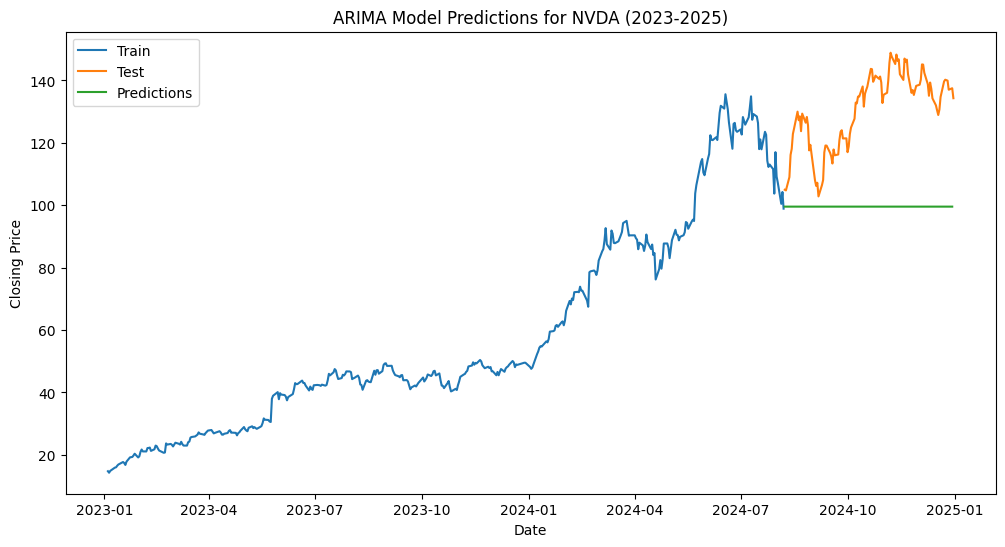

In [ ]:
# prompt: Build an ARIMA model using order (1,1,1) on df2_nvda

import pandas as pd
import matplotlib.pyplot as plt
# Assuming df2_nvda is already defined and contains 'Close_NVDA' and 'Date_NVDA' columns
# Convert 'Date_NVDA' to datetime objects if it's not already
df2_nvda['Date_NVDA'] = pd.to_datetime(df2_nvda['Date_NVDA'])

# Train-test split (adjust split ratio as needed)
train_size = int(len(df2_nvda) * 0.8)
train_data, test_data = df2_nvda[:train_size], df2_nvda[train_size:]

# Build and train the ARIMA model with order (1, 1, 1)
order = (1, 1, 1)
model = ARIMA(train_data['Close_NVDA'], order=order)
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Evaluate the model
mae = mean_absolute_error(test_data['Close_NVDA'], predictions)
mse = mean_squared_error(test_data['Close_NVDA'], predictions)
rmse = sqrt(mse)
r2 = r2_score(test_data['Close_NVDA'], predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2:.4f}')  # R-squared value

# Visualize Predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data, x='Date_NVDA', y='Close_NVDA', label='Train')
sns.lineplot(data=test_data, x='Date_NVDA', y='Close_NVDA', label='Test')
sns.lineplot(x=test_data['Date_NVDA'], y=predictions, label='Predictions')
plt.title('ARIMA Model Predictions for NVDA (2023-2025)')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


1. Prediction Accuracy

- MAE (30.93): The model's average error is about $30.93, meaning the predicted stock price deviates significantly from the actual values.

- MSE (1100.15) and RMSE (33.17): The squared error values indicate considerable variation between predicted and actual prices, with an RMSE of $33.17, suggesting the model struggles to capture the stock's volatility.

- R² Score (-6.6813): A highly negative value indicates that the model performs far worse than a simple mean prediction.

2. Performance Issues

The predicted line is flat, indicating that the ARIMA model struggles with capturing the upward momentum and fluctuations of NVDA's stock price. This suggests that ARIMA, which assumes linear relationships and stationarity, is not well-suited for highly volatile stock price forecasting.

## Nvidia - SARIMA Modelling

A SARIMA model is useful for predicting stock prices because it captures both short-term dependencies (AR, MA) and seasonal patterns (SAR, SMA), making it effective for assets with periodic trends. While stock prices are influenced by external factors, SARIMA helps model recurring patterns, improving forecasts in markets with seasonal tendencies.

### Nvidia - SARIMA with 2023 - 2025 Dataset (Order: 1, 1, 1) - BEST SARIMA

Mean Absolute Error (MAE): 26.84348864985837
Mean Squared Error (MSE): 807.8861333214046
Root Mean Squared Error (RMSE): 28.42333782864716
R² Score: -4.6407


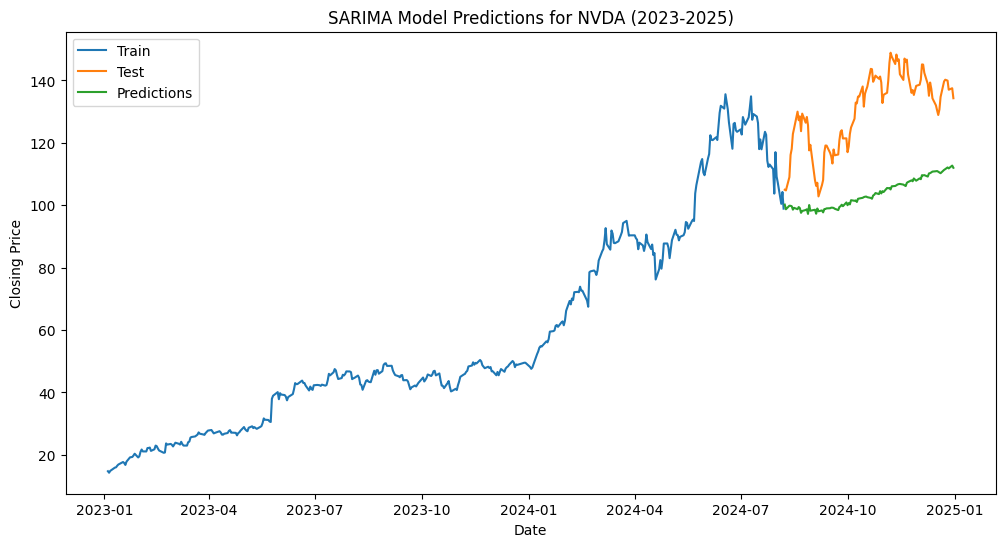

In [ ]:
# prompt: build a sarima model

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Set 'Date_NVDA' as the index
df2_nvda = df2_nvda.set_index('Date_NVDA')

# Train-test split (adjust split ratio as needed)
train_size = int(len(df2_nvda) * 0.8)
train_data, test_data = df2_nvda[:train_size], df2_nvda[train_size:]

# Define the SARIMA model order (p, d, q) x (P, D, Q, s)
# You'll need to determine appropriate values for these parameters
# based on your data analysis (e.g., ACF, PACF, seasonal patterns).

# Example order:  (1,1,1)x(1,1,1,12) - adjust based on your data
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 21)  # Assuming a yearly seasonality (s=12)


try:
    # Build and train the SARIMA model
    model = SARIMAX(train_data['Close_NVDA'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()


    # Make predictions
    predictions = model_fit.forecast(steps=len(test_data))

    # Evaluate the model
    mae = mean_absolute_error(test_data['Close_NVDA'], predictions)
    mse = mean_squared_error(test_data['Close_NVDA'], predictions)
    rmse = sqrt(mse)
    r2 = r2_score(test_data['Close_NVDA'], predictions)

    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R² Score: {r2:.4f}')  # R-squared value


    # Visualize Predictions
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=train_data, x=train_data.index, y='Close_NVDA', label='Train')
    sns.lineplot(data=test_data, x=test_data.index, y='Close_NVDA', label='Test')
    sns.lineplot(x=test_data.index, y=predictions, label='Predictions')
    plt.title('SARIMA Model Predictions for NVDA (2023-2025)')
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


1. Prediction Accuracy

- MAE (26.84): On average, the predicted closing price deviates from actual values by approximately $26.84.

- MSE (807.89) & RMSE (28.42): The squared errors indicate significant variation, with RMSE suggesting an average prediction error of around $28.42.

- R² Score (-4.64): A strongly negative value suggests the model performs worse than a simple mean baseline, meaning it fails to capture meaningful patterns in NVDA’s stock movements.

2.  Trend Insights

The training data (blue) shows a strong upward trend, reflecting NVDA’s significant growth. The test data (orange) continues the trend but exhibits increased volatility. The model’s predictions (green) appear smooth and under-responsive to actual price fluctuations, indicating it does not capture NVDA’s high volatility and rapid price shifts well.

SARIMA may be inadequate for NVDA due to its assumption of stationarity and seasonality, which may not apply to a highly volatile stock like NVDA. The model fails to track sharp price swings, leading to poor accuracy and an R² score suggesting near-random predictions.

Nevertheless, this appears to be the best model to predict JPM's stock prices in comparison to the previous models.

### Nvidia - SARIMA with Full Dataset (Order: 5, 1, 9)

Mean Absolute Error (MAE): 52.85767550455058
Mean Squared Error (MSE): 3366.96051916098
Root Mean Squared Error (RMSE): 58.02551610421901
R² Score: -3.6505


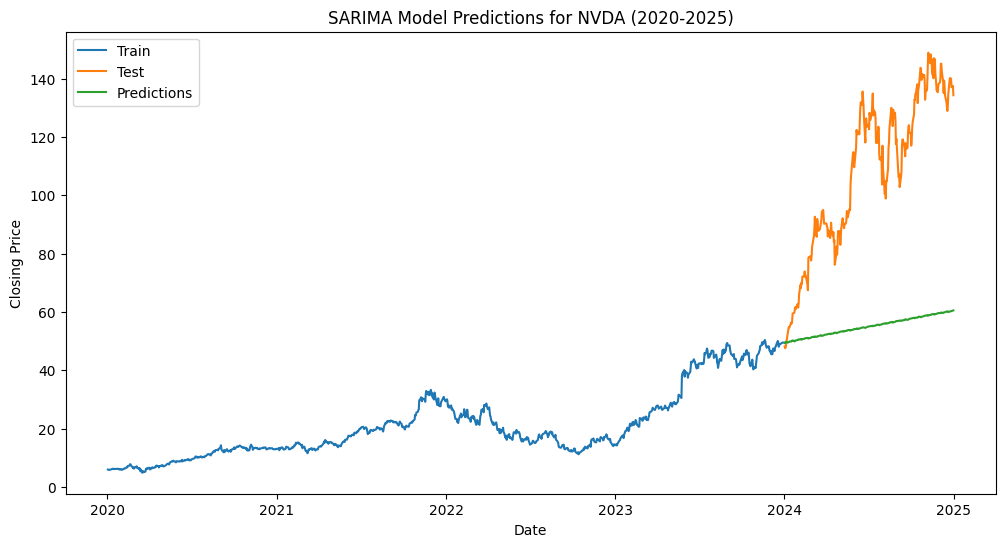

In [ ]:
# prompt: build a sarima model

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Set 'Date_NVDA' as the index
df_nvda = df_nvda.set_index('Date_NVDA')

# Train-test split (adjust split ratio as needed)
train_size = int(len(df_nvda) * 0.8)
train_data, test_data = df_nvda[:train_size], df_nvda[train_size:]

# Define the SARIMA model order (p, d, q) x (P, D, Q, s)
# You'll need to determine appropriate values for these parameters
# based on your data analysis (e.g., ACF, PACF, seasonal patterns).

# Example order:  (1,1,1)x(1,1,1,12) - adjust based on your data
order = (5, 1, 9)
seasonal_order = (1, 1, 1, 21)  # Assuming a yearly seasonality (s=12)


try:
    # Build and train the SARIMA model
    model = SARIMAX(train_data['Close_NVDA'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()


    # Make predictions
    predictions = model_fit.forecast(steps=len(test_data))

    # Evaluate the model
    mae = mean_absolute_error(test_data['Close_NVDA'], predictions)
    mse = mean_squared_error(test_data['Close_NVDA'], predictions)
    rmse = sqrt(mse)
    r2 = r2_score(test_data['Close_NVDA'], predictions)

    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R² Score: {r2:.4f}')  # R-squared value


    # Visualize Predictions
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=train_data, x=train_data.index, y='Close_NVDA', label='Train')
    sns.lineplot(data=test_data, x=test_data.index, y='Close_NVDA', label='Test')
    sns.lineplot(x=test_data.index, y=predictions, label='Predictions')
    plt.title('SARIMA Model Predictions for NVDA (2020-2025)')
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


Despite being the best from the list of models, it is apparent that the RMSE, MAE, MSE, and R^2 shows incredibly inaccurate predictions made by the model, making it highly unreliable.



Mean Absolute Error (MAE): 99.74828579831491
Mean Squared Error (MSE): 11976.683610391943
Root Mean Squared Error (RMSE): 109.43803548306202
R² Score: -82.6220


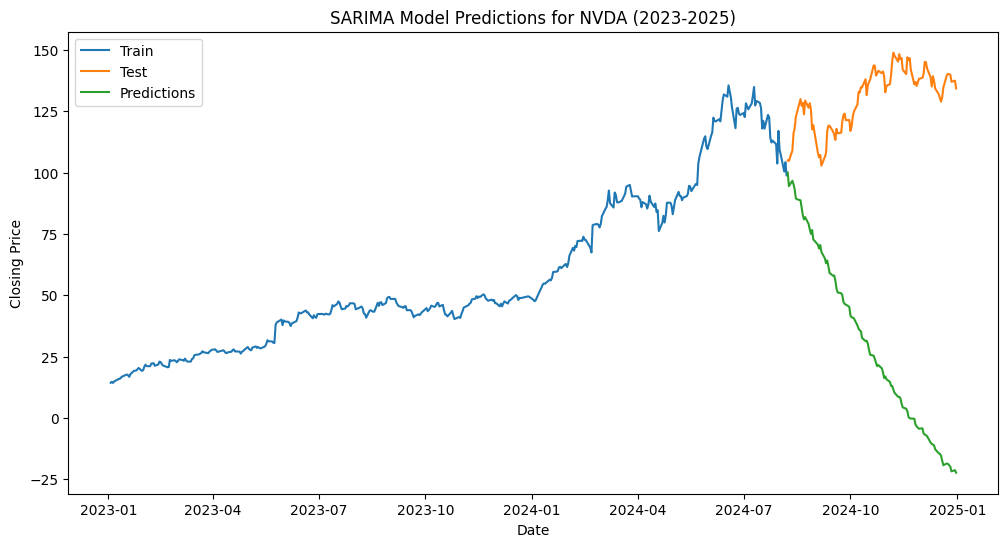

In [ ]:
# prompt: build a sarima model

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Set 'Date_NVDA' as the index
df2_nvda = df2_nvda.set_index('Date_NVDA')

# Train-test split (adjust split ratio as needed)
train_size = int(len(df2_nvda) * 0.8)
train_data, test_data = df2_nvda[:train_size], df2_nvda[train_size:]

# Define the SARIMA model order (p, d, q) x (P, D, Q, s)
# You'll need to determine appropriate values for these parameters
# based on your data analysis (e.g., ACF, PACF, seasonal patterns).

# Example order:  (1,1,1)x(1,1,1,12) - adjust based on your data
order = (5, 1, 9)
seasonal_order = (1, 1, 1, 21)  # Assuming a yearly seasonality (s=12)


try:
    # Build and train the SARIMA model
    model = SARIMAX(train_data['Close_NVDA'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()


    # Make predictions
    predictions = model_fit.forecast(steps=len(test_data))

    # Evaluate the model
    mae = mean_absolute_error(test_data['Close_NVDA'], predictions)
    mse = mean_squared_error(test_data['Close_NVDA'], predictions)
    rmse = sqrt(mse)
    r2 = r2_score(test_data['Close_NVDA'], predictions)

    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R² Score: {r2:.4f}')  # R-squared value


    # Visualize Predictions
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=train_data, x=train_data.index, y='Close_NVDA', label='Train')
    sns.lineplot(data=test_data, x=test_data.index, y='Close_NVDA', label='Test')
    sns.lineplot(x=test_data.index, y=predictions, label='Predictions')
    plt.title('SARIMA Model Predictions for NVDA (2023-2025)')
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


# Stock 2 - JP Morgan

The JP Morgan stock will now be analysed.

In [ ]:
import pandas as pd
ticker_jpm = "JPM"

df_jpm = yf.download(ticker_jpm, start="2020-01-01", end="2025-01-01")
df_jpm.reset_index(inplace=True)

if isinstance(df_jpm.columns, pd.MultiIndex):
    df_jpm.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_jpm.columns]

# Rename the 'Date' column
df_jpm = df_jpm.rename(columns={'Date_': 'Date_JPM'})

df_jpm.head()


[*********************100%***********************]  1 of 1 completed


Date_JPM   Close_JPM    High_JPM     Low_JPM    Open_JPM  Volume_JPM
0 2020-01-02  121.477203  121.485822  119.901588  120.357913    10803700
1 2020-01-03  119.874123  120.645323  118.782314  119.146251    10386800
2 2020-01-06  119.778854  119.813523  118.279781  118.331770    10259000
3 2020-01-07  117.742516  119.458218  117.690527  118.955636    10531300
4 2020-01-08  118.661034  119.215605  117.499902  117.586546     9695300

# JP Morgan EDA

In [ ]:
df_jpm.shape

(1258, 6)

The dataset has 1258 rows, which represents 1258 trading days which likely excludes weekends and other non-trading days.

## JPM - Histograms

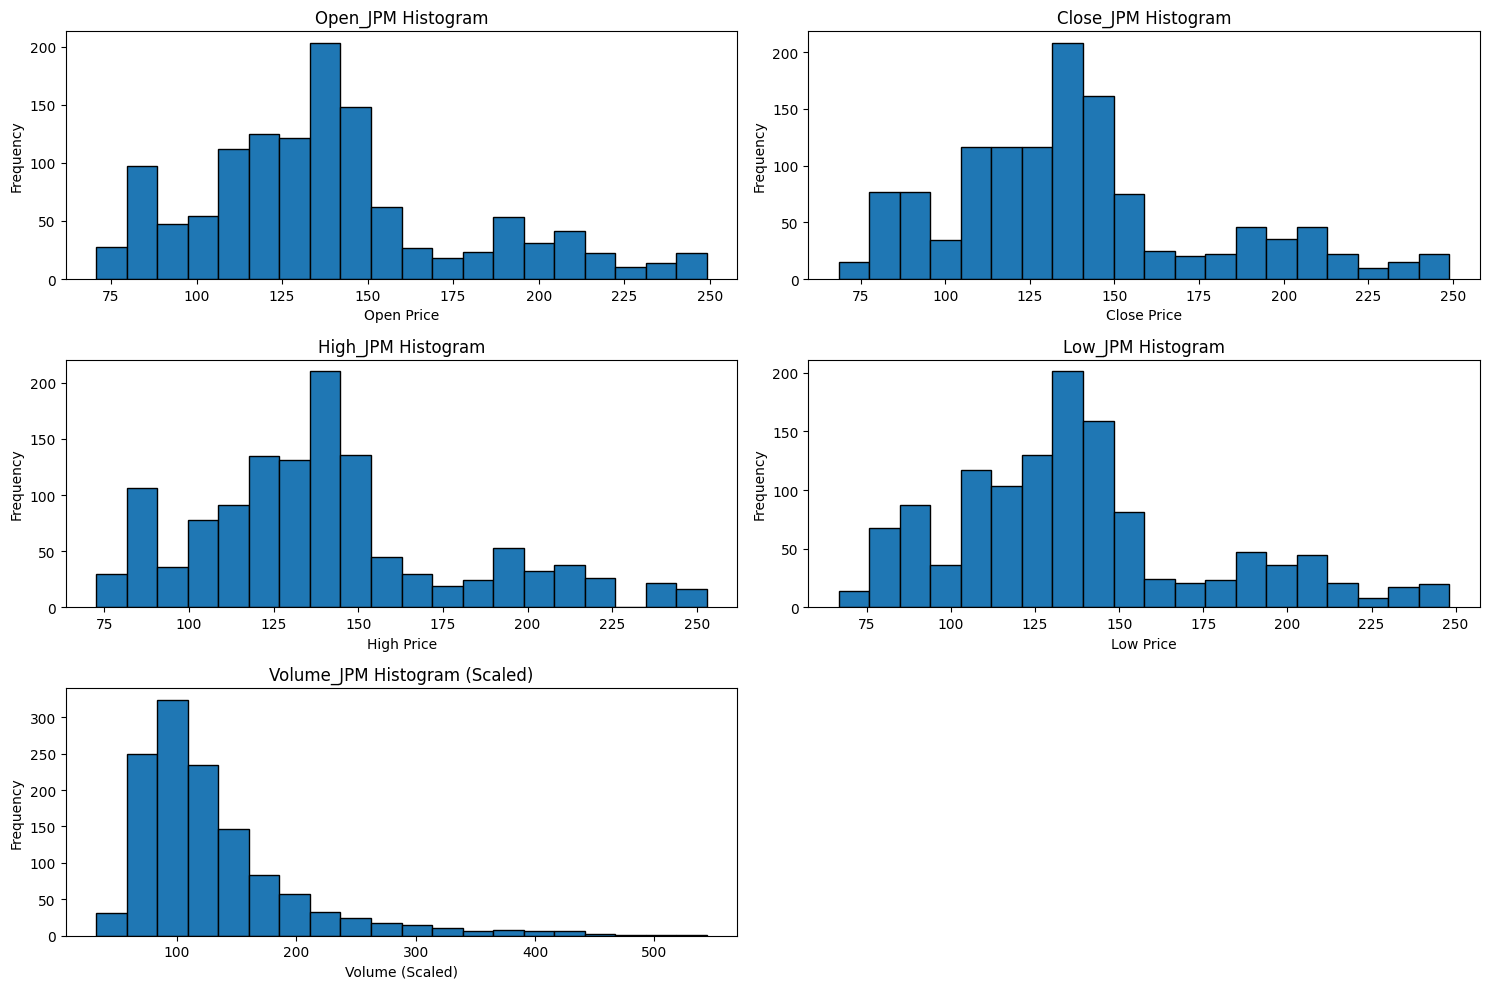

In [ ]:
# prompt: plot histograms just like nvda, but now with JPM. Use correct column names, i.e. High_JPM

import matplotlib.pyplot as plt
# Rename the 'Date' column
df_jpm = df_jpm.rename(columns={'Date_': 'Date_JPM'})

# Histograms for JPM
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

axes[0, 0].hist(df_jpm['Open_JPM'], bins=20, edgecolor='black')
axes[0, 0].set_title('Open_JPM Histogram')
axes[0, 0].set_xlabel('Open Price')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df_jpm['Close_JPM'], bins=20, edgecolor='black')
axes[0, 1].set_title('Close_JPM Histogram')
axes[0, 1].set_xlabel('Close Price')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(df_jpm['High_JPM'], bins=20, edgecolor='black')
axes[1, 0].set_title('High_JPM Histogram')
axes[1, 0].set_xlabel('High Price')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(df_jpm['Low_JPM'], bins=20, edgecolor='black')
axes[1, 1].set_title('Low_JPM Histogram')
axes[1, 1].set_xlabel('Low Price')
axes[1, 1].set_ylabel('Frequency')

scaling_ratio = 0.00001  # Example scaling ratio
axes[2, 0].hist(df_jpm['Volume_JPM'] * scaling_ratio, bins=20, edgecolor='black')
axes[2, 0].set_title('Volume_JPM Histogram (Scaled)')
axes[2, 0].set_xlabel('Volume (Scaled)')
axes[2, 0].set_ylabel('Frequency')

axes[2, 1].set_axis_off()

plt.tight_layout()
plt.show()


1. Open, Close, High, and Low Price Histograms

- The four price histograms are almost identical, reflecting the strong correlation between opening, closing, high, and low prices.

- The distributions appear right-skewed, meaning that JPM has spent most of its time at lower price levels but has seen growth over time.

- A peak in frequency is observed between $120-$150, suggesting that this has been a dominant trading range.

- Fewer data points exist above $180-$200, indicating that JPM has only recently reached these higher price levels.

Relevant Real-World Events:

- 2008-2013 (Financial Crisis & Recovery): JPM's price was relatively low during this period, as banks were still recovering from the 2008 financial collapse.
- 2016-2019 (Steady Growth): The stock saw consistent appreciation, supported by economic expansion and strong financial performance.
- 2020-2021 (COVID-19 Volatility): The stock likely experienced sharp dips in March 2020, followed by a rapid recovery fueled by stimulus measures and Fed interventions.
- 2022-2024 (Interest Rate Hikes & Banking Sector Stress): The histogram's long tail reflects volatility caused by inflation concerns, Fed rate hikes, and uncertainty in the financial sector.

2. Volume Histogram (Scaled)

- The volume histogram is highly right-skewed, indicating that most days have relatively low trading volume, with occasional extreme spikes.

- The highest frequency is observed at lower volume levels (below 200, scaled units), meaning JPM trades at stable volumes most of the time.

- There are significant outliers with very high trading volume (above 500), suggesting periods of intense market activity.

Relevant Real-World Events:

- 2008-2009 (Financial Crisis): Trading volume likely surged as JPM navigated the crisis and absorbed failing banks like Bear Stearns.

- 2016-2019 (Strong Economic Expansion): Volume remained relatively stable, as the financial sector benefited from economic growth.

- March 2020 (COVID-19 Crash & Recovery): Extreme spikes in volume align with panic selling and subsequent buying as stimulus packages revived the economy.

- 2023-2024 (Banking Crisis & Fed Policy): JPM likely experienced increased trading activity following regional bank failures, interest rate hikes, and changing investor sentiment towards financial stocks.


## JPM - Boxplots

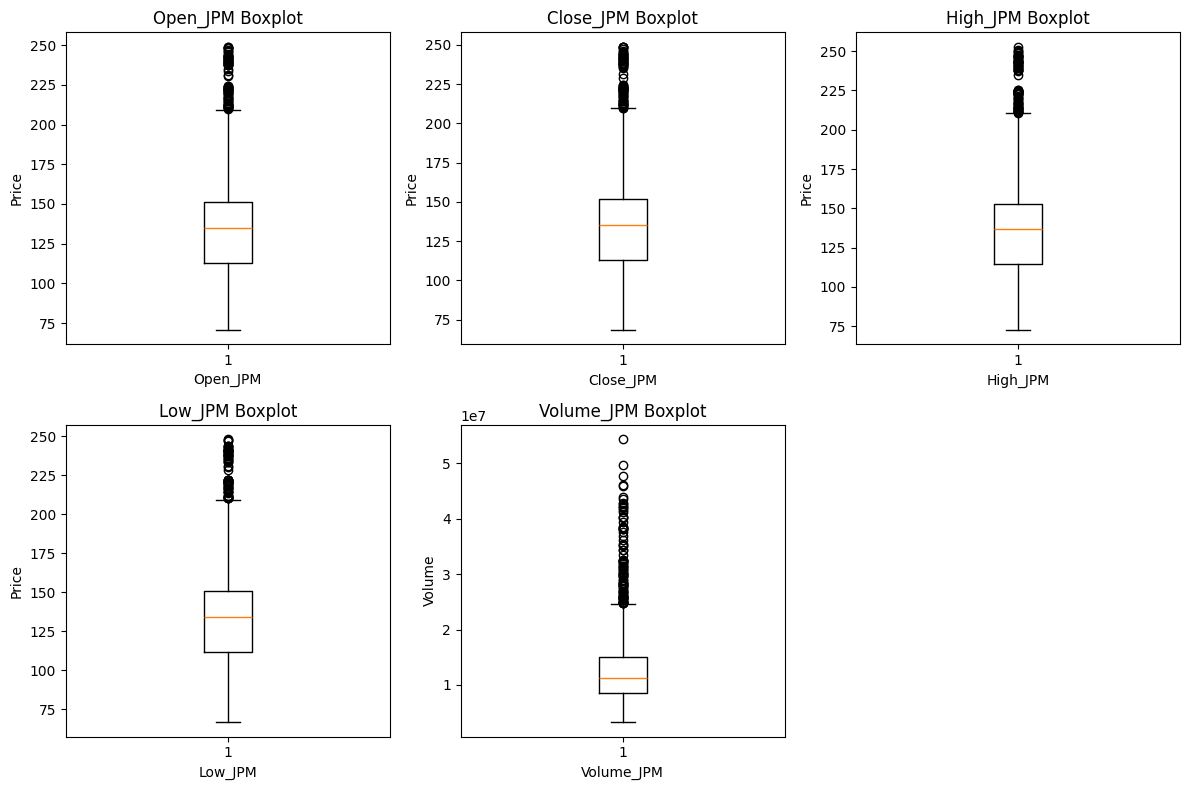

In [ ]:
# prompt: now make boxplots with axis titles

import matplotlib.pyplot as plt

# Boxplots for JPM with axis titles
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.boxplot(df_jpm['Open_JPM'])
plt.title('Open_JPM Boxplot')
plt.xlabel('Open_JPM')
plt.ylabel('Price')

plt.subplot(2, 3, 2)
plt.boxplot(df_jpm['Close_JPM'])
plt.title('Close_JPM Boxplot')
plt.xlabel('Close_JPM')
plt.ylabel('Price')

plt.subplot(2, 3, 3)
plt.boxplot(df_jpm['High_JPM'])
plt.title('High_JPM Boxplot')
plt.xlabel('High_JPM')
plt.ylabel('Price')

plt.subplot(2, 3, 4)
plt.boxplot(df_jpm['Low_JPM'])
plt.title('Low_JPM Boxplot')
plt.xlabel('Low_JPM')
plt.ylabel('Price')

plt.subplot(2, 3, 5)
plt.boxplot(df_jpm['Volume_JPM'])
plt.title('Volume_JPM Boxplot')
plt.xlabel('Volume_JPM')
plt.ylabel('Volume')

plt.tight_layout()
plt.show()


1. Open, Close, High, and Low Boxplot Analysis:

- Interquartile Range (IQR): JPMorgan Chase's stock prices predominantly range between 100 and 150 USD, indicating that during the analyzed period, the stock frequently traded within this bracket.

- Outliers Above 200 USD: Notable price increases above 200 USD suggest significant periods of growth. For example, on February 18, 2025, the stock reached an all-time high closing price of 279.95 USD. This surge can be attributed to strategic acquisitions, regulatory settlements, and broader market dynamics.

- High vs. Open & Close Prices: The High prices consistently surpass the Open and Close prices, highlighting typical intraday volatility where peak prices during the day often exceed opening and closing figures.

- Low vs. Open Prices: The Low prices rarely fall significantly below the Open prices, indicating strong buying support and suggesting that investors are eager to purchase shares during minor dips, preventing substantial declines.

2. Volume Boxplot Analysis:

- Median Trading Volume: The median trading volume is approximately 10 to 15 million shares per day, reflecting steady investor interest.

- Interquartile Range (IQR): Trading volumes typically fall between 5 million and 20 million shares, encompassing the middle 50% of trading days.

- Outliers Above 40-50 Million Shares: Significant spikes in trading volume, exceeding 40 to 50 million shares, often correspond to major events such as regulatory actions, corporate developments, or broader economic factors.







## JPM - Correlation Matrix

            Open_JPM  High_JPM   Low_JPM  Close_JPM  Volume_JPM
Open_JPM    1.000000  0.999521  0.999444   0.998918   -0.471252
High_JPM    0.999521  1.000000  0.999344   0.999482   -0.462564
Low_JPM     0.999444  0.999344  1.000000   0.999537   -0.482349
Close_JPM   0.998918  0.999482  0.999537   1.000000   -0.473504
Volume_JPM -0.471252 -0.462564 -0.482349  -0.473504    1.000000


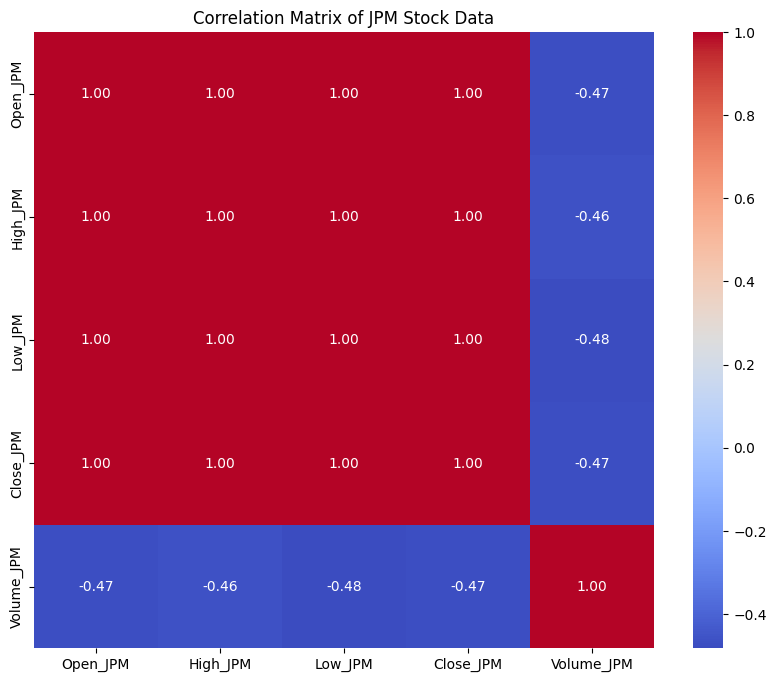

In [ ]:
# prompt: now make correlation matrix

import matplotlib.pyplot as plt
# Calculate the correlation matrix for JPM
correlation_matrix_jpm = df_jpm[['Open_JPM', 'High_JPM', 'Low_JPM', 'Close_JPM', 'Volume_JPM']].corr()

# Display the correlation matrix for JPM
print(correlation_matrix_jpm)

# Visualize the correlation matrix for JPM using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_jpm, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of JPM Stock Data')
plt.show()


According to the correlation matrix above, high vs open and low vs close display the highest correlation coefficients, while volume vs high and volume vs open have the lowest correlation coefficients.

### Analyzing the 2 Highest Correlating vs 2 Lowest Correlating Variables

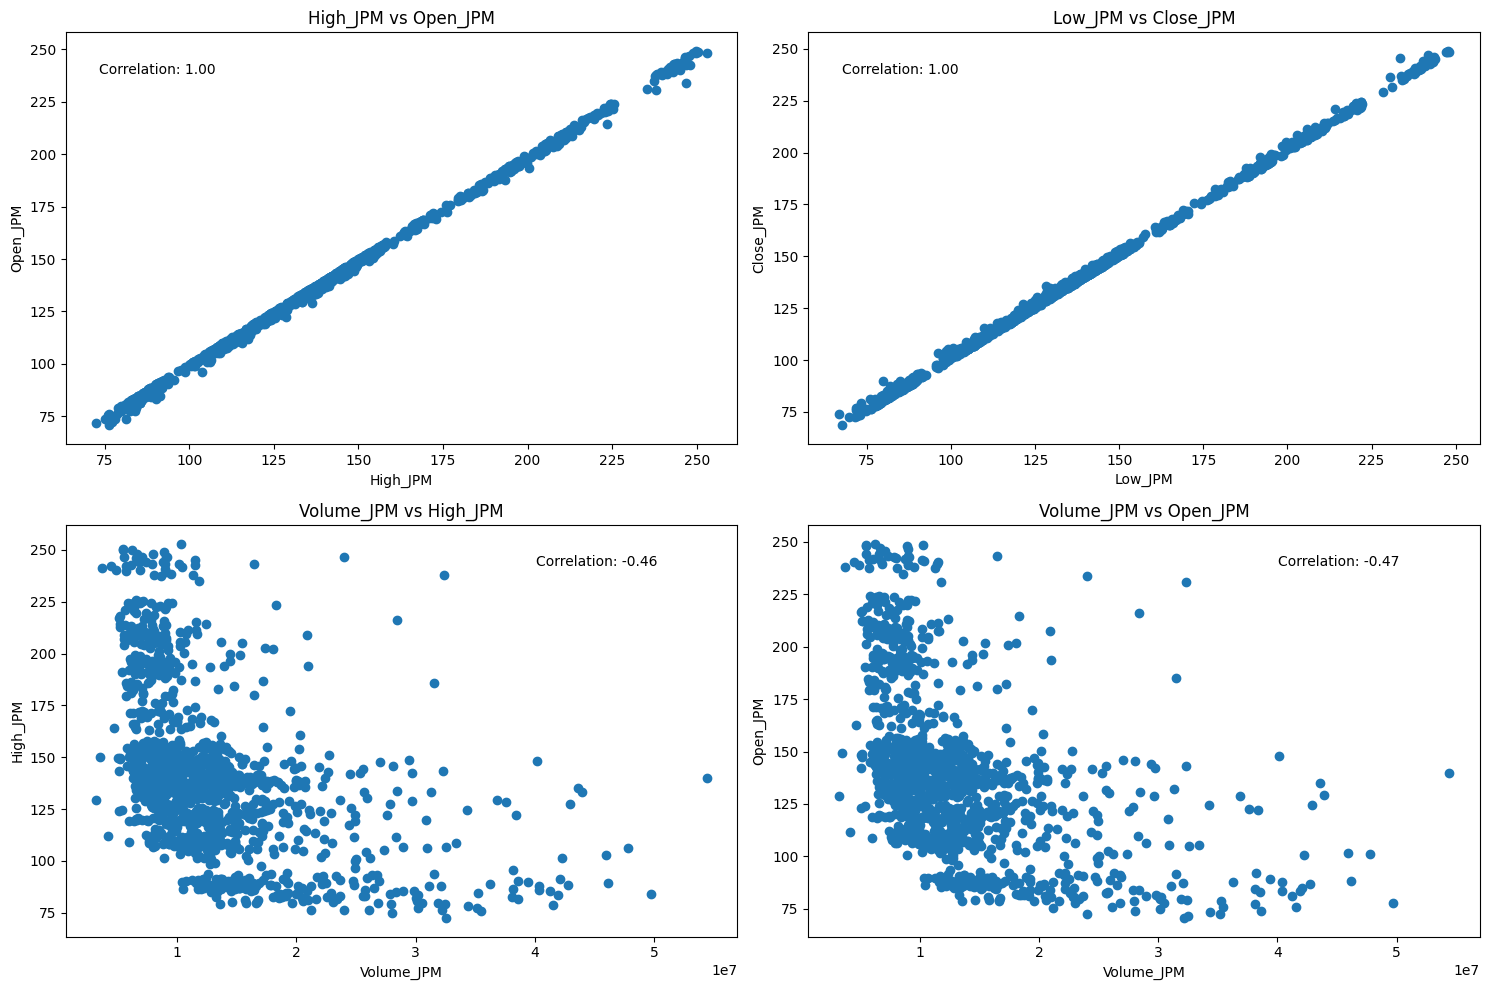

In [ ]:
# prompt: now scatter plots for jpm: high vs open, low vs close, volume vs high, volume vs open. Display their respective correlation coefficients as well

import matplotlib.pyplot as plt
# Scatter plots and correlation coefficients for JPM
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# High vs Open
axes[0, 0].scatter(df_jpm['High_JPM'], df_jpm['Open_JPM'])
axes[0, 0].set_title('High_JPM vs Open_JPM')
axes[0, 0].set_xlabel('High_JPM')
axes[0, 0].set_ylabel('Open_JPM')
correlation_coefficient = df_jpm['High_JPM'].corr(df_jpm['Open_JPM'])
axes[0, 0].text(0.05, 0.9, f"Correlation: {correlation_coefficient:.2f}", transform=axes[0, 0].transAxes)

# Low vs Close
axes[0, 1].scatter(df_jpm['Low_JPM'], df_jpm['Close_JPM'])
axes[0, 1].set_title('Low_JPM vs Close_JPM')
axes[0, 1].set_xlabel('Low_JPM')
axes[0, 1].set_ylabel('Close_JPM')
correlation_coefficient = df_jpm['Low_JPM'].corr(df_jpm['Close_JPM'])
axes[0, 1].text(0.05, 0.9, f"Correlation: {correlation_coefficient:.2f}", transform=axes[0, 1].transAxes)

# Volume vs High
axes[1, 0].scatter(df_jpm['Volume_JPM'], df_jpm['High_JPM'])
axes[1, 0].set_title('Volume_JPM vs High_JPM')
axes[1, 0].set_xlabel('Volume_JPM')
axes[1, 0].set_ylabel('High_JPM')
correlation_coefficient = df_jpm['Volume_JPM'].corr(df_jpm['High_JPM'])
axes[1, 0].text(0.7, 0.9, f"Correlation: {correlation_coefficient:.2f}", transform=axes[1, 0].transAxes)

# Volume vs Open
axes[1, 1].scatter(df_jpm['Volume_JPM'], df_jpm['Open_JPM'])
axes[1, 1].set_title('Volume_JPM vs Open_JPM')
axes[1, 1].set_xlabel('Volume_JPM')
axes[1, 1].set_ylabel('Open_JPM')
correlation_coefficient = df_jpm['Volume_JPM'].corr(df_jpm['Open_JPM'])
axes[1, 1].text(0.7, 0.9, f"Correlation: {correlation_coefficient:.2f}", transform=axes[1, 1].transAxes)

plt.tight_layout()
plt.show()


1. High vs. Open Prices:

- Perfect Correlation: The scatter plot reveals a perfect linear relationship (correlation coefficient of 1.00) between the High and Open prices.

- Potential Cause: This strong correlation suggests that investor sentiment at market open significantly influences the day's peak prices. Positive news or earnings reports released before trading hours can lead to heightened buying activity right from the opening bell, driving prices higher throughout the day.

2. Low vs. Close Prices:

- Perfect Correlation: Similarly, the Low and Close prices exhibit a perfect linear relationship (correlation coefficient of 1.00).

- Potential Cause: This pattern may result from end-of-day sell-offs, where investors choose to liquidate positions before the market closes, leading to intraday lows aligning closely with closing prices. Such behavior can be influenced by factors like profit-taking or risk management strategies.

3. High vs. Close Prices:

- Perfect Correlation: The scatter plot shows a perfect linear relationship (correlation coefficient of 1.00) between the High and Close prices.

- Potential Cause: This indicates that the day's highest prices are often sustained until the market closes, possibly due to strong bullish momentum. Investors' confidence in the stock's performance may lead them to hold onto positions, maintaining elevated price levels through to the end of the trading session.

4. Low vs. Open Prices:

- Perfect Correlation: The scatter plot indicates a perfect linear relationship (correlation coefficient of 1.00) between the Low and Open prices.

- Potential Cause: This suggests that any negative sentiment or overnight news impacting the stock is immediately reflected at market open, setting the day's low price. Investors reacting to unfavorable developments may initiate sell orders right at the opening, establishing a low baseline for the day's trading.

## JPM - Checking for Seasonality

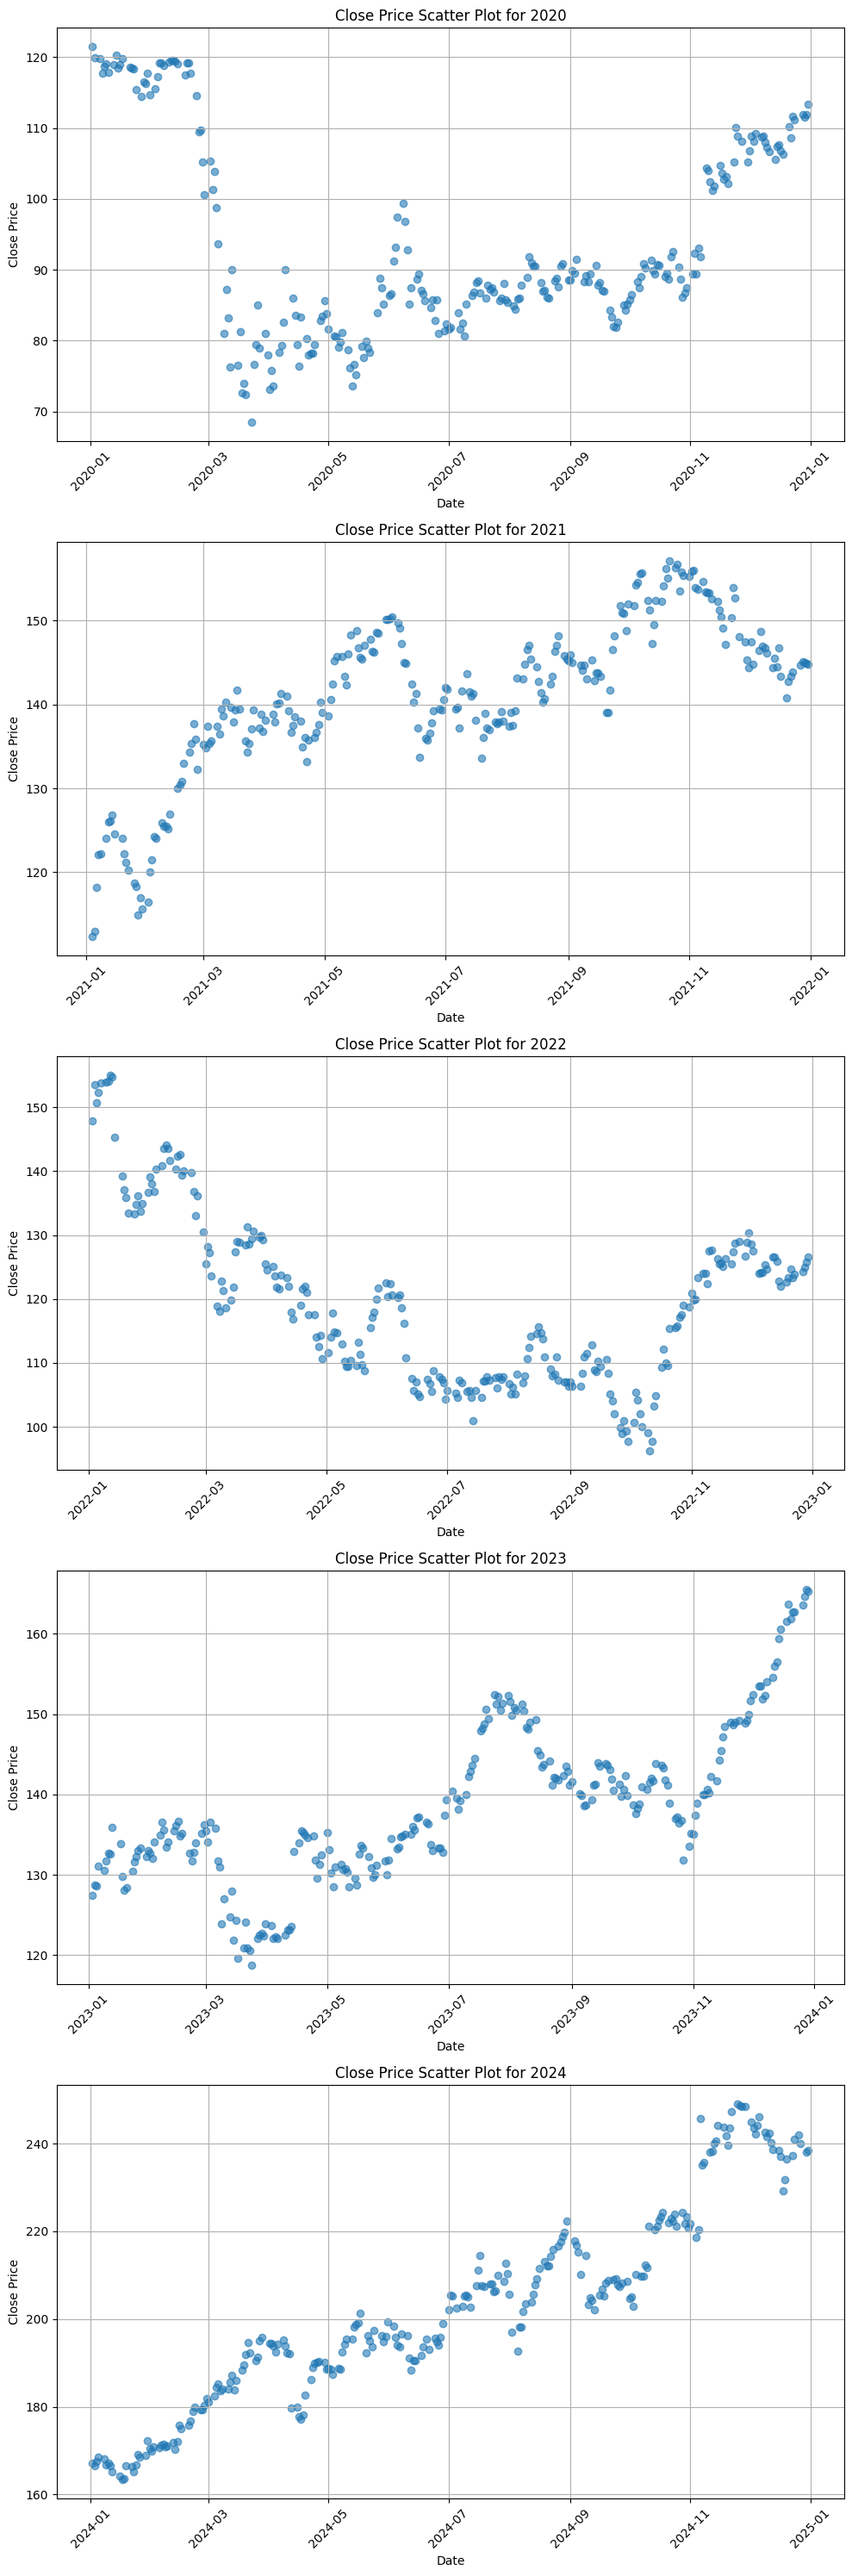

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date_JPM' is in datetime format
df_jpm['Date_JPM'] = pd.to_datetime(df_jpm['Date_JPM'])

# Create a year column
df_jpm['Year'] = df_jpm['Date_JPM'].dt.year

# Get unique years (ensure only 5 years are selected)
years = sorted(df_jpm['Year'].unique())[:5]  # Select up to 5 years if more exist

# Create subplots for each year
fig, axes = plt.subplots(len(years), 1, figsize=(10, 6 * len(years)))

# Ensure axes is iterable if only one year exists
if len(years) == 1:
    axes = [axes]

# Generate scatter plots for each year
for i, year in enumerate(years):
    year_data = df_jpm[df_jpm['Year'] == year]
    axes[i].scatter(year_data['Date_JPM'], year_data['Close_JPM'], alpha=0.6)
    axes[i].set_title(f'Close Price Scatter Plot for {year}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Close Price')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    axes[i].grid(True)

plt.tight_layout()
plt.show()


According to the 5 graphs, only graphs 2023-2024 and 2024-2025 displays similar patterns thus suggesting seasonality within those time-periods.

Several factors may contribute to this seasonality:

1. Economic Growth and Market Confidence:

Robust Economic Indicators: In 2024, the U.S. economy demonstrated resilience, with third-quarter real growth maintaining around 3% and unemployment holding steady at approximately 4%. This stability likely bolstered investor confidence, positively influencing JPMorgan's stock performance.

2. Strong Financial Performance:

Record Earnings: JPMorgan reported better-than-expected profits in 2024, including a notable third-quarter profit of nearly $13 billion. Such strong financial results can lead to increased investor interest and stock price appreciation.

3. Favorable Regulatory Environment:

Potential Easing of Regulations: The resignation of Federal Reserve Vice Chair Michael Barr in late 2024 signaled a potential shift towards a less stringent regulatory environment. This prospect may have encouraged investors, anticipating higher bank dividends and buybacks, thereby positively impacting stock performance.

4. Seasonal Investor Behavior:

Year-End Financial Activities: Investors often adjust portfolios towards the end of the year for tax purposes, performance reviews, or strategic rebalancing. Such activities can lead to increased trading volumes and stock price movements, contributing to observable seasonal patterns.

## JPM - Multivariate Scatter Plot

Hypothesis: Between 2020 and 2025, the drastic price drop that occurred in early-2020 may have signaled investors to buy shares of the stock with anticipation for it to rise in the coming years as investors may speculate that the stock's rise in the coming years.

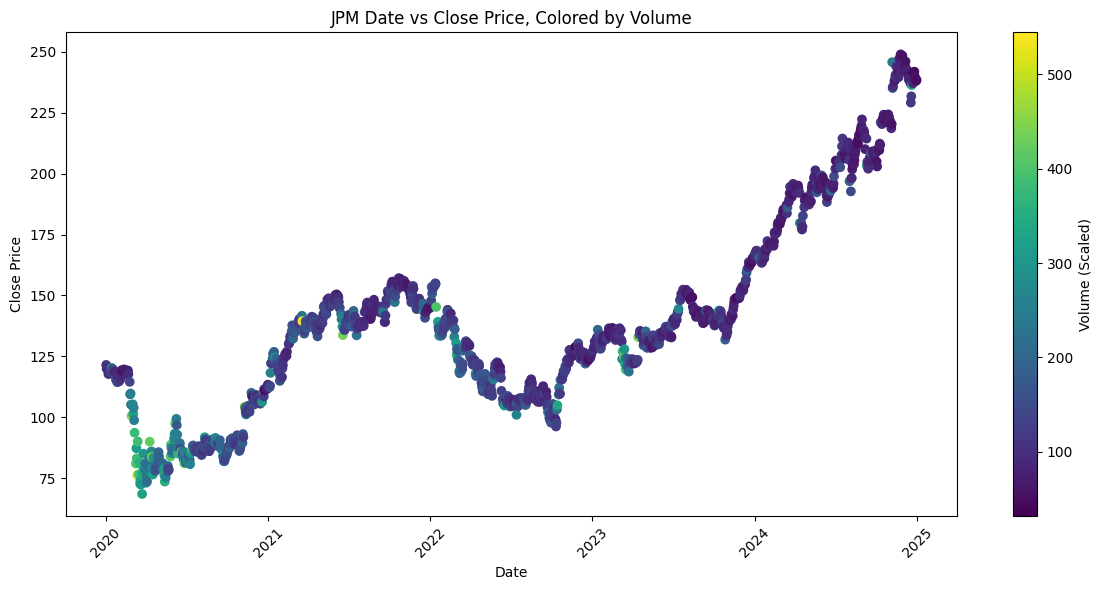

In [ ]:
import matplotlib.pyplot as plt
# Assuming df_jpm and scaling_ratio are already defined from the previous code

plt.figure(figsize=(12, 6))
plt.scatter(df_jpm['Date_JPM'], df_jpm['Close_JPM'], c=df_jpm['Volume_JPM'] * scaling_ratio, cmap='viridis')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('JPM Date vs Close Price, Colored by Volume')
plt.colorbar(label='Volume (Scaled)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Analysis of JPMorgan's Stock Performance

1. General Upward Trend
The stock price shows a consistent increase over the years, indicating a long-term bullish trend. This suggests strong fundamentals, growing revenue, and increasing investor confidence. Factors contributing to this trend could include:

- Robust corporate earnings, with JPMorgan consistently exceeding profit expectations.

- Strength in investment banking and trading activities, benefiting from market volatility and deal-making.

- Rising interest rates, which have improved net interest margins and boosted profitability.

2. No Clear Cyclical Variation

Cyclical variations are usually tied to broader economic cycles (e.g., boom and recession periods). The chart does not show repeated rises and falls at regular intervals, suggesting that JPMorgan’s stock performance is not strictly tied to economic cycles. Instead, the trend appears driven more by:

- Macroeconomic conditions, such as Federal Reserve policies on interest rates.

- Financial market dynamics, including corporate deal-making and trading volumes.

3. No Clear Signs of Seasonality

Seasonality refers to recurring price patterns at fixed time intervals, such as yearly or quarterly trends. Unlike industries such as retail or travel that experience strong seasonal effects, JPMorgan's stock price movement does not show consistent dips or peaks at specific times of the year. However, occasional spikes in volume might align with:

- Earnings releases, causing temporary price fluctuations.

- Federal Reserve interest rate decisions, influencing investor sentiment.

- Major economic events or policy changes, affecting the financial sector.

4. No Apparent Irregular Points (Outliers)

There are no extreme anomalies or sudden price crashes/spikes that deviate significantly from the overall trend. This suggests:

- JPMorgan's financial performance has remained stable, without major unexpected shocks.

- Investor sentiment has been strong, without panic-driven selloffs.
Volume fluctuations remain within expected ranges, reflecting healthy market activity.

Lastly, the hypothesis is proven to be correct as seen in the graph as much volume of shares were traded in early 2020 right when the price of the stock was low.



# JPM - Modelling

## JPM - ARIMA Modelling (Full Dataset)

An ARIMA model is useful for predicting stock prices because it captures trends, seasonality, and autocorrelations in historical data. By analyzing past price movements, it can generate short-term forecasts, making it valuable for trend analysis and risk management.

### Running ADF, PACF, and ACF Tests

Before modelling the ADF, PACF, and ACF tests will first be conducted to identify the optimum p, q, d values.

ADF Statistic: 0.588854
p-value: 0.987338
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
ADF Statistic after differencing: -10.333150
p-value after differencing: 0.000000
Critical Values after differencing:
	1%: -3.436
	5%: -2.864
	10%: -2.568


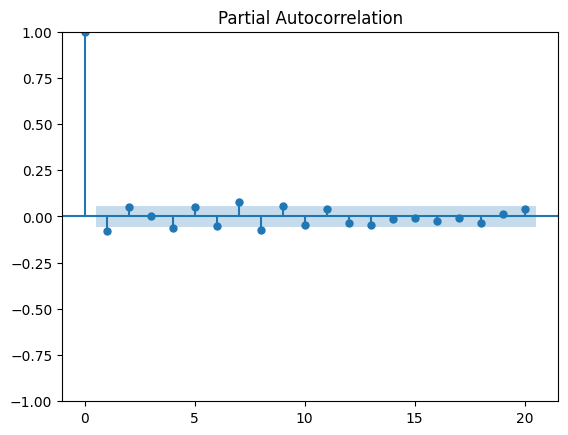

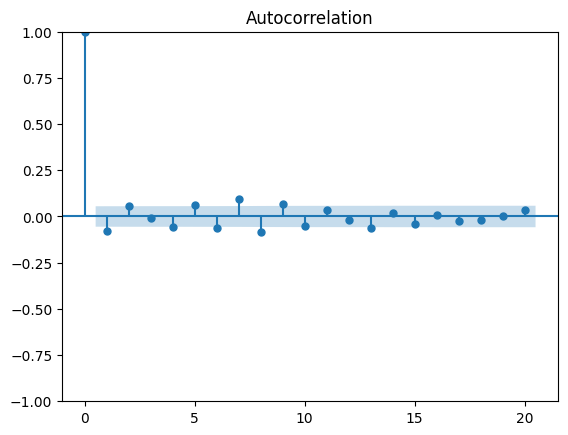

In [ ]:
# prompt: run adf, pacf, acf tests on df_jpm

import matplotlib.pyplot as plt
# Perform the Augmented Dickey-Fuller test
result = adfuller(df_jpm['Close_JPM'])

# Print the test results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Apply first-order differencing to the 'Close_JPM' column
df_jpm['Close_JPM_Diff'] = df_jpm['Close_JPM'].diff(periods=1)

# Drop the first row which will have NaN after differencing
df_jpm = df_jpm.dropna(subset=['Close_JPM_Diff'])

# Now you can use df_jpm['Close_JPM_Diff'] for further analysis or modeling
# For example, re-run the ADF test on the differenced series:

result = adfuller(df_jpm['Close_JPM_Diff'])
print('ADF Statistic after differencing: %f' % result[0])
print('p-value after differencing: %f' % result[1])
print('Critical Values after differencing:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Plot PACF
plot_pacf(df_jpm['Close_JPM_Diff'], lags=20)  # Adjust the number of lags as needed
plt.show()

# Plot ACF
plot_acf(df_jpm['Close_JPM_Diff'], lags=20)
plt.show()


1. ADF test results indicate that Nvidia closing stock price dataset is still non-stationary because:

- p-value (0.987338) > 0.05, meaning we fail to reject the null hypothesis (data has a unit root, meaning it's non-stationary).

- ADF Statistic (0.588854) is higher than all critical values, thus confirming non-stationarity.

Then after first-order differencing (d = 1) shows:

- ADF Statistic (-10.333150) is much lower than all critical values, thus strongly suggesting stationarity.

- p-value (0.000000) < 0.05, thus confirming that the data is now stationary.


### Building ARIMA Baseline (Order 1, 1, 1)

Mean Absolute Error (MAE): 37.19301564935032
Mean Squared Error (MSE): 1873.9973584901659
Root Mean Squared Error (RMSE): 43.2896911341507
R² Score: -2.7975


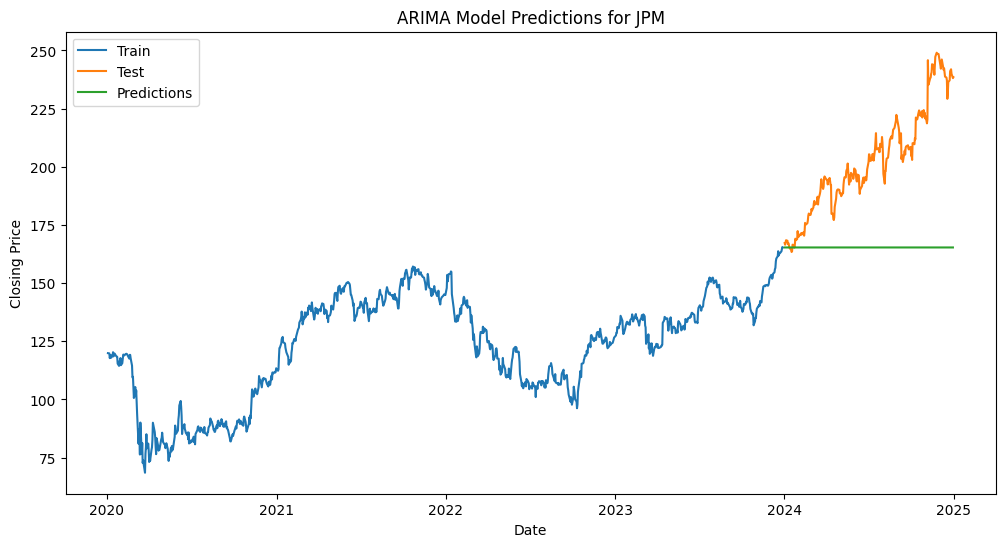

In [ ]:
# prompt: build an arima model for df_jpm (1, 1, 1)

import pandas as pd
import matplotlib.pyplot as plt
# Assuming df_jpm is already defined and contains 'Close_JPM' and 'Date_JPM' columns
# Convert 'Date_JPM' to datetime objects if it's not already
df_jpm['Date_JPM'] = pd.to_datetime(df_jpm['Date_JPM'])

# Train-test split (adjust split ratio as needed)
train_size = int(len(df_jpm) * 0.8)
train_data_jpm, test_data_jpm = df_jpm[:train_size], df_jpm[train_size:]

# Build and train the ARIMA model with order (1, 1, 1)
order = (1, 1, 1)
model_jpm = ARIMA(train_data_jpm['Close_JPM'], order=order)
model_fit_jpm = model_jpm.fit()

# Make predictions
predictions_jpm = model_fit_jpm.forecast(steps=len(test_data_jpm))

# Evaluate the model
mae_jpm = mean_absolute_error(test_data_jpm['Close_JPM'], predictions_jpm)
mse_jpm = mean_squared_error(test_data_jpm['Close_JPM'], predictions_jpm)
rmse_jpm = sqrt(mse_jpm)
r2_jpm = r2_score(test_data_jpm['Close_JPM'], predictions_jpm)

print(f'Mean Absolute Error (MAE): {mae_jpm}')
print(f'Mean Squared Error (MSE): {mse_jpm}')
print(f'Root Mean Squared Error (RMSE): {rmse_jpm}')
print(f'R² Score: {r2_jpm:.4f}')  # R-squared value

# Visualize Predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data_jpm, x='Date_JPM', y='Close_JPM', label='Train')
sns.lineplot(data=test_data_jpm, x='Date_JPM', y='Close_JPM', label='Test')
sns.lineplot(x=test_data_jpm['Date_JPM'], y=predictions_jpm, label='Predictions')
plt.title('ARIMA Model Predictions for JPM')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


Despite using the seemingly optimal order of values from the tests, it is apparent that the RMSE, MAE, MSE, and R^2 shows incredibly inaccurate predictions made by the model, making it highly unreliable. More modelling with better hyperparameters is required.

### Finding the best ARIMA models (p & q values in the 1 to 20 range)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # Import warnings module
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Suppress warnings
warnings.filterwarnings("ignore")

# Train-test split (80% train, 20% test)
train_size = int(len(df_jpm) * 0.8)
train_jpm, test_jpm = df_jpm.iloc[:train_size], df_jpm.iloc[train_size:]

# Iterate through p and q values (1 to 20 in steps of 4)
results = []

for p in range(1, 21, 4):
    for q in range(1, 21, 4):
        try:
            # Train ARIMA model with given (p, d, q)
            order = (p, 1, q)  # d=1 assumed based on stationarity check
            model = ARIMA(train_jpm['Close_JPM'], order=order)
            model_fit = model.fit()

            # Make predictions
            predictions_jpm = model_fit.forecast(steps=len(test_jpm))

            # Evaluate model performance
            mae = mean_absolute_error(test_jpm['Close_JPM'], predictions_jpm)
            mse = mean_squared_error(test_jpm['Close_JPM'], predictions_jpm)
            rmse = sqrt(mse)
            r2 = r2_score(test_jpm['Close_JPM'], predictions_jpm)

            # Store results
            results.append([p, q, mae, mse, rmse, r2])

        except Exception as e:
            print(f"Skipping ARIMA({p}, 1, {q}) due to error: {e}")
            results.append([p, q, None, None, None, None])

# Convert results into a Pandas DataFrame
results_df = pd.DataFrame(results, columns=['p', 'q', 'MAE', 'MSE', 'RMSE', 'R^2'])

# Display results
import IPython.display as display
display.display(results_df)


p   q        MAE          MSE       RMSE       R^2
0    1   1  37.193016  1873.997358  43.289691 -2.797483
1    1   5  37.268066  1879.760892  43.356209 -2.809162
2    1   9  37.151540  1870.587823  43.250293 -2.790574
3    1  13  38.078448  1943.053629  44.080082 -2.937419
4    1  17  38.777811  1998.913298  44.709208 -3.050614
5    5   1  37.314097  1883.286695  43.396851 -2.816307
6    5   5  37.668733  1910.871780  43.713519 -2.872206
7    5   9  37.414446  1890.848402  43.483887 -2.831630
8    5  13  38.591895  1983.876819  44.540732 -3.020144
9    5  17  38.695504  1992.262235  44.634765 -3.037136
10   9   1  37.178963  1872.688710  43.274573 -2.794831
11   9   5  37.161089  1871.201961  43.257392 -2.791818
12   9   9  38.279268  1957.992121  44.249205 -2.967691
13   9  13  38.188768  1951.289885  44.173407 -2.954109
14   9  17  38.263172  1957.136296  44.239533 -2.965956
15  13   1  38.166499  1950.029035  44.159133 -2.951554
16  13   5  38.411909  1969.213428  44.375820 -2.990430
17  13   9  38.596613  1984.213136  44.544507 -3.020825
18  13  13  38.518217  1977.502827  44.469122 -3.007227
19  13  17  38.389232  1967.192856  44.353048 -2.986335
20  17   1  38.619901  1985.807229  44.562397 -3.024055
21  17   5  38.528763  1978.553758  44.480937 -3.009357
22  17   9  38.743301  1995.554589  44.671631 -3.043807
23  17  13  38.650648  1988.036370  44.587401 -3.028572
24  17  17  38.521620  1977.637354  44.470635 -3.007500

The models listed above were created to determine which p and q parameters produced the best results. These values were selected from a range of 1 to 20 based on the PACF & ACF tests, which showed a sharp drop after lag 1, followed by a gradual decline. To balance accuracy and efficiency, values were tested at intervals of 4, ensuring reasonable runtimes without sacrificing model performance.

Order 9, 1, 5 is found to produce predictions with the best evaluation metrics out of the list.

### ARIMA Model (9, 1, 5)

Mean Absolute Error (MAE): 37.16108905503367
Mean Squared Error (MSE): 1871.2019610963448
Root Mean Squared Error (RMSE): 43.25739198213809
R² Score: -2.7918


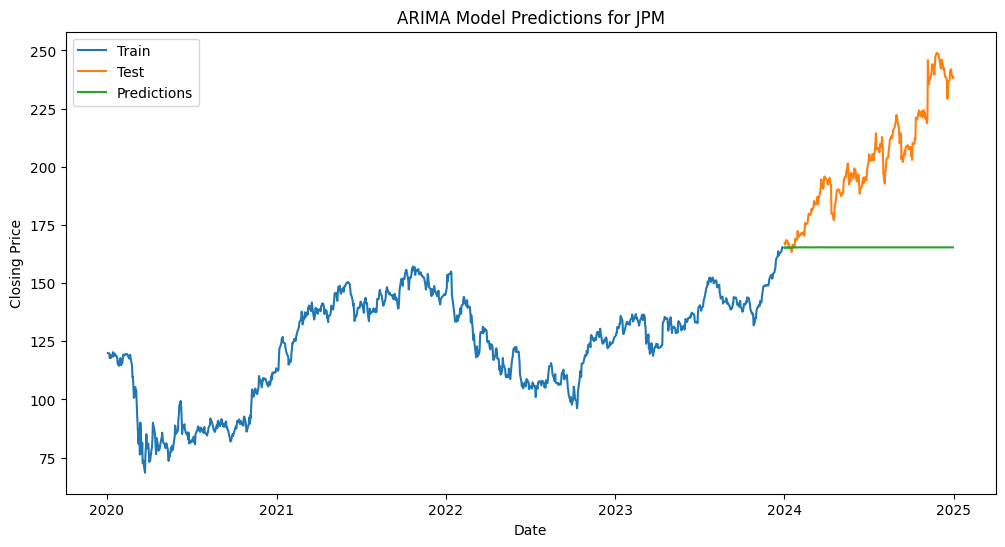

In [ ]:
# prompt: build an arima model for df_jpm (1, 1, 1)

import pandas as pd
import matplotlib.pyplot as plt
# Assuming df_jpm is already defined and contains 'Close_JPM' and 'Date_JPM' columns
# Convert 'Date_JPM' to datetime objects if it's not already
df_jpm['Date_JPM'] = pd.to_datetime(df_jpm['Date_JPM'])

# Train-test split (adjust split ratio as needed)
train_size = int(len(df_jpm) * 0.8)
train_data_jpm, test_data_jpm = df_jpm[:train_size], df_jpm[train_size:]

# Build and train the ARIMA model with order (1, 1, 1)
order = (9, 1, 5)
model_jpm = ARIMA(train_data_jpm['Close_JPM'], order=order)
model_fit_jpm = model_jpm.fit()

# Make predictions
predictions_jpm = model_fit_jpm.forecast(steps=len(test_data_jpm))

# Evaluate the model
mae_jpm = mean_absolute_error(test_data_jpm['Close_JPM'], predictions_jpm)
mse_jpm = mean_squared_error(test_data_jpm['Close_JPM'], predictions_jpm)
rmse_jpm = sqrt(mse_jpm)
r2_jpm = r2_score(test_data_jpm['Close_JPM'], predictions_jpm)

print(f'Mean Absolute Error (MAE): {mae_jpm}')
print(f'Mean Squared Error (MSE): {mse_jpm}')
print(f'Root Mean Squared Error (RMSE): {rmse_jpm}')
print(f'R² Score: {r2_jpm:.4f}')  # R-squared value

# Visualize Predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data_jpm, x='Date_JPM', y='Close_JPM', label='Train')
sns.lineplot(data=test_data_jpm, x='Date_JPM', y='Close_JPM', label='Test')
sns.lineplot(x=test_data_jpm['Date_JPM'], y=predictions_jpm, label='Predictions')
plt.title('ARIMA Model Predictions for JPM')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


Despite being the best from the list of models, it is apparent that the RMSE, MAE, MSE, and R^2 shows incredibly inaccurate predictions made by the model, making it highly unreliable.

## JPM - ARIMA Modelling (2023 & 2024 Dataset)

 A new dataset of values from years 2023 and 2024 will be used as seasonality was found between these periods, which may allow the models to produce more accurate results.

In [ ]:
# prompt:  import a new JPM dataset that only includes 1/1/23 to 1/1/25. make sure the dataframe uses a different name, call it df2_jpm

import pandas as pd
df2_jpm = yf.download(ticker_jpm, start="2023-01-01", end="2025-01-01")
df2_jpm.reset_index(inplace=True)

if isinstance(df2_jpm.columns, pd.MultiIndex):
    df2_jpm.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df2_jpm.columns]

# Rename the 'Date' column
df2_jpm = df2_jpm.rename(columns={'Date_': 'Date_JPM'})

df2_jpm.head()


[*********************100%***********************]  1 of 1 completed


Date_JPM   Close_JPM    High_JPM     Low_JPM    Open_JPM  Volume_JPM
0 2023-01-03  127.490311  129.018846  126.329768  127.603545    11054800
1 2023-01-04  128.679199  129.905782  127.914939  128.311221    11687600
2 2023-01-05  128.650665  128.992847  127.082326  128.945319     8381300
3 2023-01-06  131.112457  131.530681  127.833223  129.392048    10029100
4 2023-01-09  130.570663  132.005933  130.104926  131.739793     8482300

### Running ADF, PACF, and ACF Tests

Before modelling with the new dataset, the ADF, PACF, and ACF tests will first be conducted to identify the optimum p, q, d values.

ADF Statistic: 0.066364
p-value: 0.963688
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
ADF Statistic after differencing: -24.732818
p-value after differencing: 0.000000
Critical Values after differencing:
	1%: -3.443
	5%: -2.867
	10%: -2.570


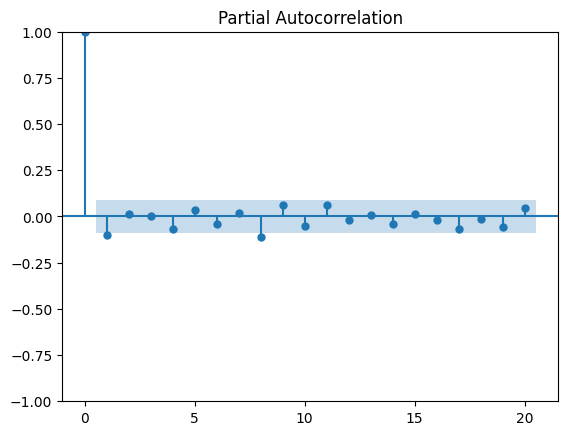

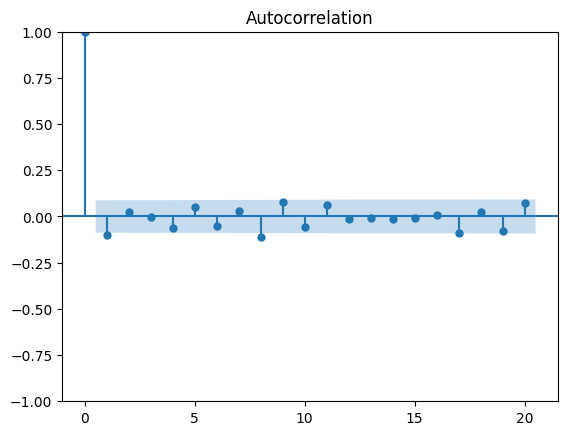

In [ ]:
# prompt: run an ADF, PACF, ACF test

import matplotlib.pyplot as plt
# Assuming df2_jpm is already defined and contains the 'Close_JPM' column

# Perform the Augmented Dickey-Fuller test
result = adfuller(df2_jpm['Close_JPM'])

# Print the test results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Apply first-order differencing to the 'Close_JPM' column
df2_jpm['Close_JPM_Diff'] = df2_jpm['Close_JPM'].diff(periods=1)

# Drop the first row which will have NaN after differencing
df2_jpm = df2_jpm.dropna(subset=['Close_JPM_Diff'])

# Now you can use df2_jpm['Close_JPM_Diff'] for further analysis or modeling
# For example, re-run the ADF test on the differenced series:

result = adfuller(df2_jpm['Close_JPM_Diff'])
print('ADF Statistic after differencing: %f' % result[0])
print('p-value after differencing: %f' % result[1])
print('Critical Values after differencing:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Plot PACF
plot_pacf(df2_jpm['Close_JPM_Diff'], lags=20)  # Adjust the number of lags as needed
plt.show()

# Plot ACF
plot_acf(df2_jpm['Close_JPM_Diff'], lags=20)
plt.show()


The results of the tests are similar to the first, where differencing had to be applied once. PACF and ACF also displayed a sharp drop after 1, therefore p = 1 and q = 1 will be used.

### Building an ARIMA Model with df2_jpm - BEST ARIMA

Mean Absolute Error (MAE): 25.6367558145821
Mean Squared Error (MSE): 876.9104225536038
Root Mean Squared Error (RMSE): 29.61267334358051
R² Score: -2.9919


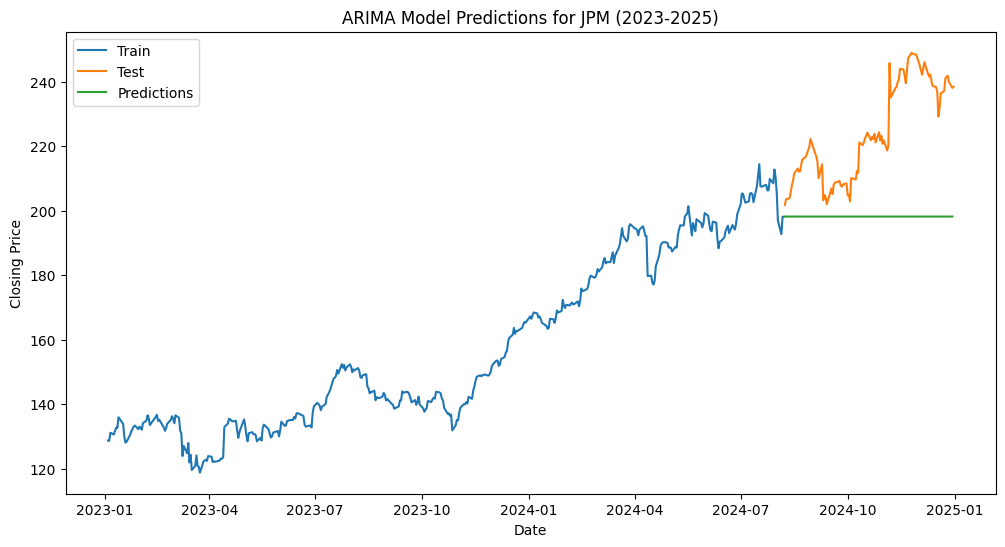

In [ ]:
# prompt: Build an ARIMA model (1, 1, 1)

import pandas as pd
import matplotlib.pyplot as plt
# Assuming df2_jpm is already defined and contains 'Close_JPM' and 'Date_JPM' columns
# Convert 'Date_JPM' to datetime objects if it's not already
df2_jpm['Date_JPM'] = pd.to_datetime(df2_jpm['Date_JPM'])

# Train-test split (adjust split ratio as needed)
train_size = int(len(df2_jpm) * 0.8)
train_data, test_data = df2_jpm[:train_size], df2_jpm[train_size:]

# Build and train the ARIMA model with order (1, 1, 1)
order = (1, 1, 1)
model = ARIMA(train_data['Close_JPM'], order=order)
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Evaluate the model
mae = mean_absolute_error(test_data['Close_JPM'], predictions)
mse = mean_squared_error(test_data['Close_JPM'], predictions)
rmse = sqrt(mse)
r2 = r2_score(test_data['Close_JPM'], predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2:.4f}')  # R-squared value

# Visualize Predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data, x='Date_JPM', y='Close_JPM', label='Train')
sns.lineplot(data=test_data, x='Date_JPM', y='Close_JPM', label='Test')
sns.lineplot(x=test_data['Date_JPM'], y=predictions, label='Predictions')
plt.title('ARIMA Model Predictions for JPM (2023-2025)')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


1. Prediction Accuracy:

- MAE (25.64): The model’s average error is about $25.64, indicating a significant deviation from actual values.

- MSE (876.91) and RMSE (29.61): The RMSE of $29.61 suggests substantial variability in predictions.

- R² Score (-2.9919): A highly negative value, meaning the model performs worse than simply using the mean of past values.

2. Performance Issues

- The flat prediction line again suggests that the ARIMA model fails to capture JPM's upward trend and volatility.

- JPM has exhibited a strong upward trend, but the ARIMA model assumes stationarity and struggles with non-linear price movements.


## JPM - SARIMA Modelling

### SARIMA with Full Dataset (Order: 9, 1, 5)

Mean Absolute Error (MAE): 32.49715253967824
Mean Squared Error (MSE): 1426.664082987461
Root Mean Squared Error (RMSE): 37.77120706288668
R² Score: -1.8910


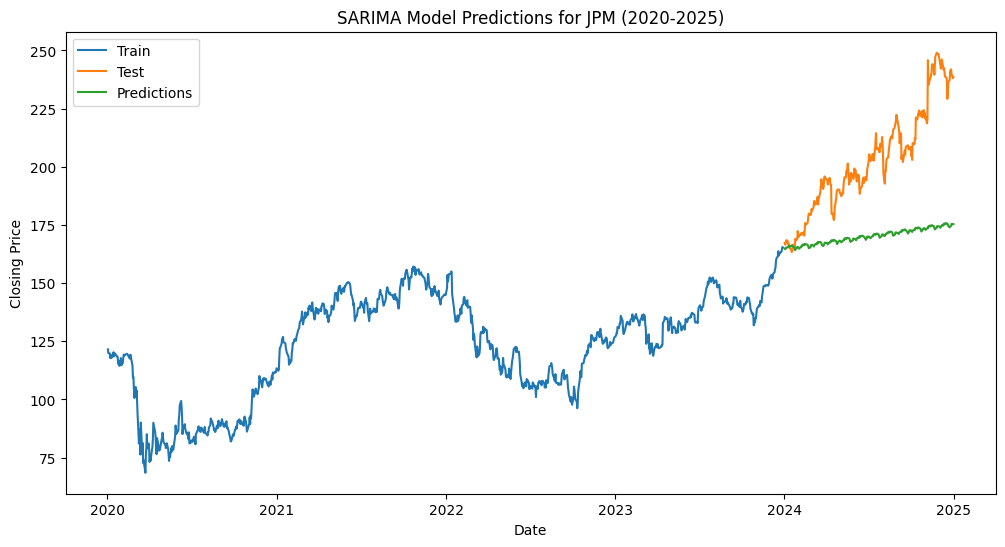

In [ ]:
# prompt: build a SARIMA model with df_jpm

import matplotlib.pyplot as plt
# Set 'Date_JPM' as the index
df_jpm = df_jpm.set_index('Date_JPM')

# Train-test split (adjust split ratio as needed)
train_size = int(len(df_jpm) * 0.8)
train_data, test_data = df_jpm[:train_size], df_jpm[train_size:]

# Define the SARIMA model order (p, d, q) x (P, D, Q, s)
# You'll need to determine appropriate values for these parameters
# based on your data analysis (e.g., ACF, PACF, seasonal patterns).

# Example order:  (1,1,1)x(1,1,1,12) - adjust based on your data
order = (9, 1, 5)  # Example order, adjust as needed
seasonal_order = (1, 1, 1, 21)  # Example seasonal order, adjust as needed


try:
    # Build and train the SARIMA model
    model = SARIMAX(train_data['Close_JPM'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.forecast(steps=len(test_data))

    # Evaluate the model
    mae = mean_absolute_error(test_data['Close_JPM'], predictions)
    mse = mean_squared_error(test_data['Close_JPM'], predictions)
    rmse = sqrt(mse)
    r2 = r2_score(test_data['Close_JPM'], predictions)

    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R² Score: {r2:.4f}')  # R-squared value

    # Visualize Predictions
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=train_data, x=train_data.index, y='Close_JPM', label='Train')
    sns.lineplot(data=test_data, x=test_data.index, y='Close_JPM', label='Test')
    sns.lineplot(x=test_data.index, y=predictions, label='Predictions')
    plt.title('SARIMA Model Predictions for JPM (2020-2025)')
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


Despite being the best from the list of models, it is apparent that the RMSE, MAE, MSE, and R^2 shows incredibly inaccurate predictions made by the model, making it highly unreliable.

### SARIMA with 2023-2025 Dataset (Order: 1, 1, 1) - BEST SARIMA

Mean Absolute Error (MAE): 15.261879760735015
Mean Squared Error (MSE): 337.7542839090696
Root Mean Squared Error (RMSE): 18.378092499197777
R² Score: -0.5375


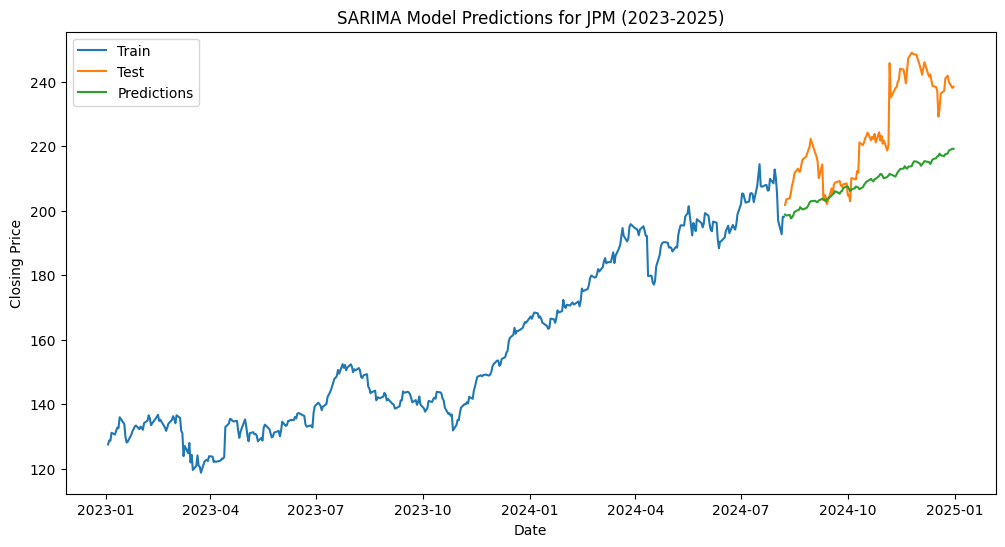

In [ ]:
# prompt: Build SARIMA model with df2_jpm

import matplotlib.pyplot as plt
# Set 'Date_JPM' as the index for df2_jpm
df2_jpm = df2_jpm.set_index('Date_JPM')

# Train-test split (adjust split ratio as needed)
train_size = int(len(df2_jpm) * 0.8)
train_data, test_data = df2_jpm[:train_size], df2_jpm[train_size:]

# Define the SARIMA model order (p, d, q) x (P, D, Q, s)
# You'll need to determine appropriate values for these parameters
# based on your data analysis (e.g., ACF, PACF, seasonal patterns).

# Example order:  (1,1,1)x(1,1,1,12) - adjust based on your data
order = (1, 1, 1)  # Example order, adjust as needed
seasonal_order = (1, 1, 1, 21)  # Example seasonal order, adjust as needed


try:
    # Build and train the SARIMA model
    model = SARIMAX(train_data['Close_JPM'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.forecast(steps=len(test_data))

    # Evaluate the model
    mae = mean_absolute_error(test_data['Close_JPM'], predictions)
    mse = mean_squared_error(test_data['Close_JPM'], predictions)
    rmse = sqrt(mse)
    r2 = r2_score(test_data['Close_JPM'], predictions)

    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R² Score: {r2:.4f}')  # R-squared value

    # Visualize Predictions
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=train_data, x=train_data.index, y='Close_JPM', label='Train')
    sns.lineplot(data=test_data, x=test_data.index, y='Close_JPM', label='Test')
    sns.lineplot(x=test_data.index, y=predictions, label='Predictions')
    plt.title('SARIMA Model Predictions for JPM (2023-2025)')
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


1. Improvement Over ARIMA
- MAE (15.26): The average error has significantly decreased compared to ARIMA (25.64), indicating improved accuracy.

- MSE (337.75) and RMSE (18.38): Lower error values than ARIMA (RMSE of 29.61), suggesting the model better captures variations.

- R² Score (-0.5375): Though still negative, it's a significant improvement from ARIMA’s -2.99, indicating better explanatory power.

2. Observations on the Predictions

- Upward Trend Captured: Unlike ARIMA’s flat-line prediction, SARIMA captures a slight upward movement.

- Underestimation of Volatility: While SARIMA does follow the trend, it smooths out price fluctuations and underestimates JPM’s volatility.

- Better Short-Term Forecasting: The initial few months align closely with actual test data before diverging.

This appears to be the best model to predict JPM's stock prices in comparison to the previous models.

# Amazon

In [ ]:
import pandas as pd
ticker_amzn = "AMZN"

df_amzn = yf.download(ticker_amzn, start="2020-01-01", end="2025-01-01")
df_amzn.reset_index(inplace=True)

if isinstance(df_amzn.columns, pd.MultiIndex):
    df_amzn.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_amzn.columns]

# Rename the 'Date' column
df_amzn = df_amzn.rename(columns={'Date_': 'Date_AMZN'})

df_amzn.head()

[*********************100%***********************]  1 of 1 completed


Date_AMZN  Close_AMZN  High_AMZN   Low_AMZN  Open_AMZN  Volume_AMZN
0 2020-01-02   94.900497  94.900497  93.207497  93.750000     80580000
1 2020-01-03   93.748497  94.309998  93.224998  93.224998     75288000
2 2020-01-06   95.143997  95.184502  93.000000  93.000000     81236000
3 2020-01-07   95.343002  95.694504  94.601997  95.224998     80898000
4 2020-01-08   94.598503  95.550003  94.321999  94.902000     70160000

In [ ]:
df_amzn.tail()

Date_AMZN  Close_AMZN   High_AMZN    Low_AMZN   Open_AMZN  Volume_AMZN
1253 2024-12-24  229.050003  229.139999  226.130005  226.940002     15007500
1254 2024-12-26  227.050003  228.500000  226.669998  228.500000     16146700
1255 2024-12-27  223.750000  226.029999  220.899994  225.600006     27367100
1256 2024-12-30  221.300003  223.000000  218.429993  220.059998     28321200
1257 2024-12-31  219.389999  223.229996  218.940002  222.970001     24819700

#Amazon EDA

In [ ]:
df_amzn.shape

(1258, 6)

## Amazon - Histograms

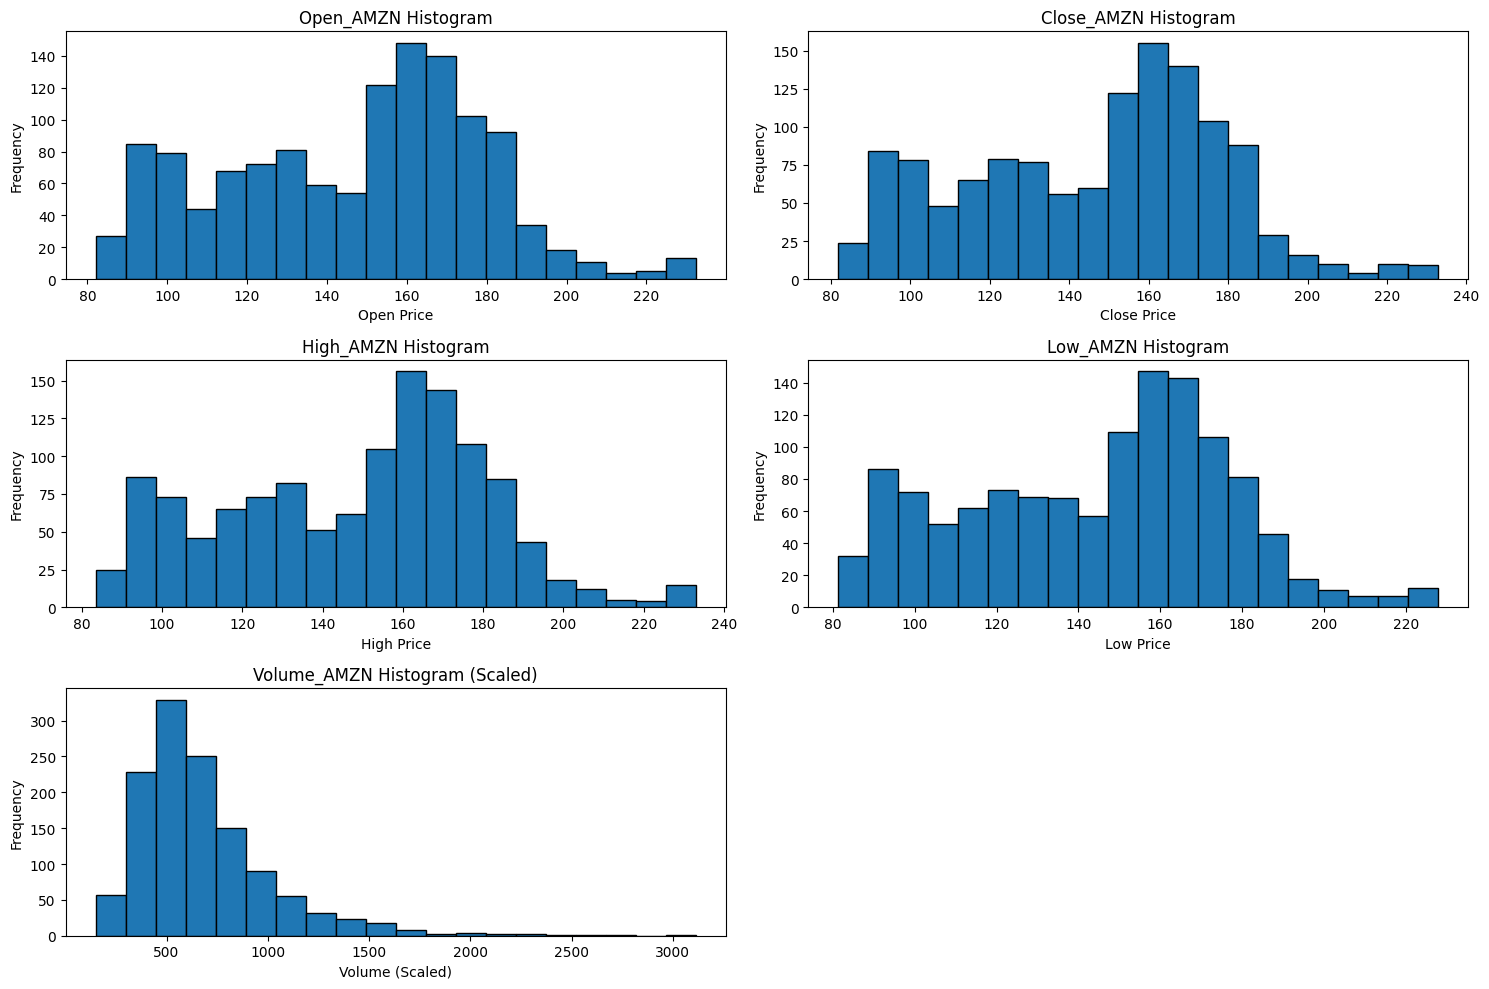

In [ ]:
# prompt: plot histograms with amzn. Use correct column names, i.e. High_amzn

import matplotlib.pyplot as plt
# Histograms for AMZN
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

axes[0, 0].hist(df_amzn['Open_AMZN'], bins=20, edgecolor='black')
axes[0, 0].set_title('Open_AMZN Histogram')
axes[0, 0].set_xlabel('Open Price')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df_amzn['Close_AMZN'], bins=20, edgecolor='black')
axes[0, 1].set_title('Close_AMZN Histogram')
axes[0, 1].set_xlabel('Close Price')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(df_amzn['High_AMZN'], bins=20, edgecolor='black')
axes[1, 0].set_title('High_AMZN Histogram')
axes[1, 0].set_xlabel('High Price')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(df_amzn['Low_AMZN'], bins=20, edgecolor='black')
axes[1, 1].set_title('Low_AMZN Histogram')
axes[1, 1].set_xlabel('Low Price')
axes[1, 1].set_ylabel('Frequency')

scaling_ratio = 0.00001  # Example scaling ratio
axes[2, 0].hist(df_amzn['Volume_AMZN'] * scaling_ratio, bins=20, edgecolor='black')
axes[2, 0].set_title('Volume_AMZN Histogram (Scaled)')
axes[2, 0].set_xlabel('Volume (Scaled)')
axes[2, 0].set_ylabel('Frequency')

axes[2, 1].set_axis_off()

plt.tight_layout()
plt.show()


1. Open, Close, High, and Low Price Histograms
- The four price histograms are nearly identical, demonstrating a strong correlation between opening, closing, high, and low prices for AMZN.

- The distribution is right-skewed, indicating that AMZN has spent more time at lower price levels but has seen consistent growth.

- The peak frequency is around $160, suggesting this has been a dominant trading range for AMZN.

- Fewer data points above $200 - $220, highlighting that AMZN has only recently reached these higher price levels.

Relevant Real-World Events:

- 2018-2019 (E-Commerce Boom & Cloud Growth): AMZN's stock price saw steady growth as AWS expanded, and online retail surged.

- 2020-2021 (COVID-19 E-Commerce Surge): AMZN experienced a significant price spike as lockdowns increased online shopping and cloud computing demand.

- 2022 (Tech Sector Sell-Off & Interest Rate Hikes): AMZN faced a price correction as investors rotated out of growth stocks amid rising interest rates.

- 2023-2024 (AI & Cloud Expansion): AMZN has benefited from renewed AI-driven cloud investments, leading to a resurgence in stock price.

2. Volume Histogram (Scaled)

- The volume histogram is heavily right-skewed, meaning that most trading days have relatively low volume, but there have been occasional extreme spikes.

- The highest frequency is observed at lower volume levels (below 500, scaled units), meaning AMZN trades at a relatively steady volume on most days.

- There are notable outliers with high trading volume (above 2000), indicating periods of intense market activity.

Relevant Real-World Events:

- 2018-2019 (Steady Growth): Trading volume was stable as AMZN expanded its cloud and retail divisions.

- March 2020 (COVID-19 Stock Surge): Extreme spikes in volume occurred as investors rushed into e-commerce and tech stocks.

- 2022 (Tech Sell-Off & Interest Rate Fears): Increased volume as investors exited high-growth stocks in response to Federal Reserve rate hikes.

- 2023-2024 (AI & Cloud-Driven Rally): Trading activity surged as AMZN invested heavily in AI infrastructure, attracting institutional interest.

## Amazon - Boxplots

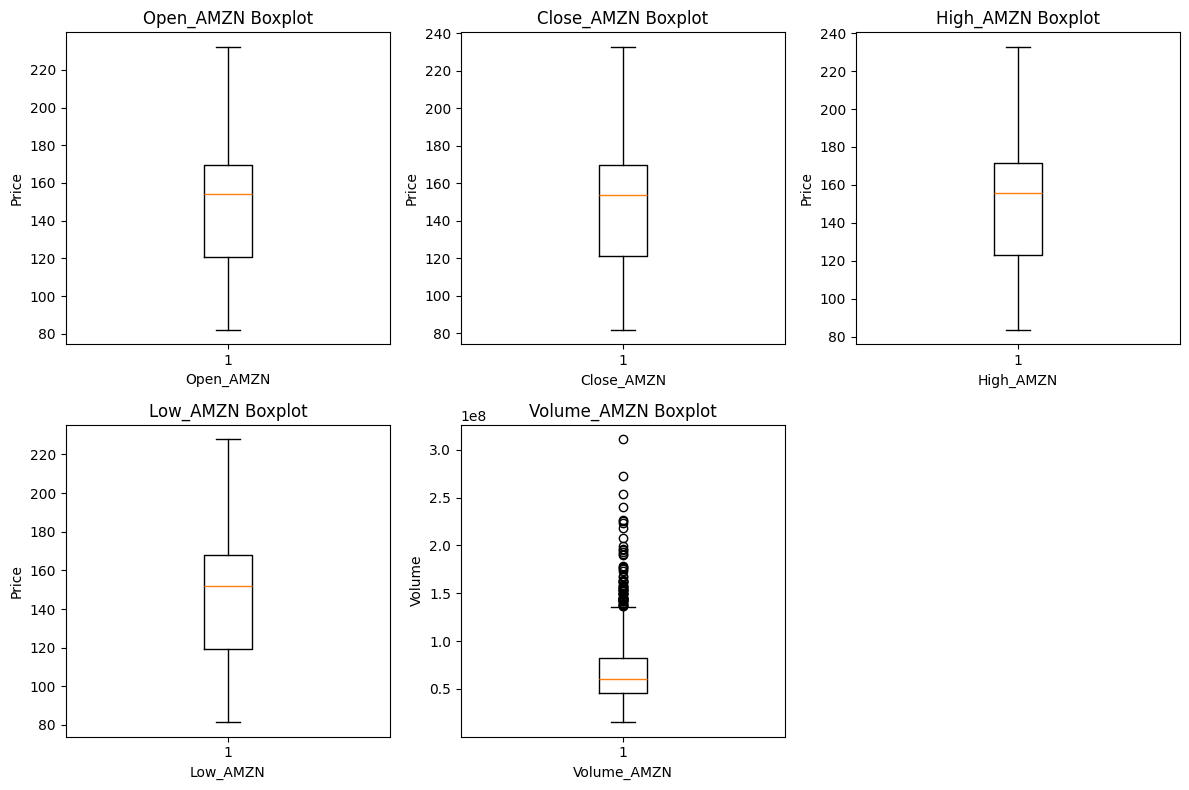

In [ ]:
# prompt: boxplots, add axis titles

import matplotlib.pyplot as plt
# Boxplots for AMZN with axis labels

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.boxplot(df_amzn['Open_AMZN'])
plt.title('Open_AMZN Boxplot')
plt.xlabel('Open_AMZN') # Added x-axis label
plt.ylabel('Price') # Added y-axis label

plt.subplot(2, 3, 2)
plt.boxplot(df_amzn['Close_AMZN'])
plt.title('Close_AMZN Boxplot')
plt.xlabel('Close_AMZN')
plt.ylabel('Price')

plt.subplot(2, 3, 3)
plt.boxplot(df_amzn['High_AMZN'])
plt.title('High_AMZN Boxplot')
plt.xlabel('High_AMZN')
plt.ylabel('Price')

plt.subplot(2, 3, 4)
plt.boxplot(df_amzn['Low_AMZN'])
plt.title('Low_AMZN Boxplot')
plt.xlabel('Low_AMZN')
plt.ylabel('Price')

plt.subplot(2, 3, 5)
plt.boxplot(df_amzn['Volume_AMZN'])
plt.title('Volume_AMZN Boxplot')
plt.xlabel('Volume_AMZN')
plt.ylabel('Volume')

plt.tight_layout()
plt.show()


1. Open, Close, High, and Low Boxplot Analysis:

- The Open, Close, High, and Low prices follow a similar distribution, with IQRs mostly between  10and 50.

- Outliers above $100 in all charts suggest NVDA experienced sharp bullish rallies.

- The stock's High price consistently exceeds the Open & Close, confirming intraday upward movements.

- The Low price rarely dips significantly below the Open, indicating strong buying support at lower levels.

2. Volume Boxplot Boxplot Analysis:

- The median trading volume (orange line) is around 4000 units (scaled), meaning NVDA typically trades at this level.

- The interquartile range (IQR) spans from 2000 to 6000, indicating that most trading days fall within this range.

- There are many outliers above 8000, showing that NVDA occasionally experiences significant spikes in trading volume.

- The two extreme outliers (15,000-16,000) suggest days with unusually high trading activity, likely due to events like the AI & Gaming booms, trading hype among retail investors, and other factors that were previously discussed.

## Amazon - Correlation Matrix

             Open_AMZN  High_AMZN  Low_AMZN  Close_AMZN  Volume_AMZN
Open_AMZN     1.000000   0.998879  0.998684    0.997115    -0.335488
High_AMZN     0.998879   1.000000  0.998606    0.998722    -0.323145
Low_AMZN      0.998684   0.998606  1.000000    0.998788    -0.350088
Close_AMZN    0.997115   0.998722  0.998788    1.000000    -0.336692
Volume_AMZN  -0.335488  -0.323145 -0.350088   -0.336692     1.000000


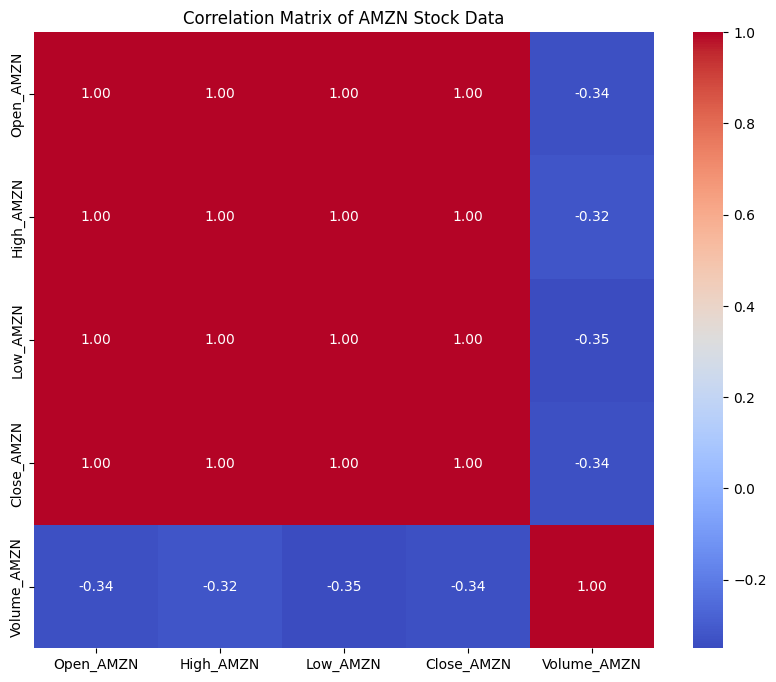

In [ ]:
# prompt: build a correlation matrix for amzn

import matplotlib.pyplot as plt
# Calculate the correlation matrix for AMZN
correlation_matrix_amzn = df_amzn[['Open_AMZN', 'High_AMZN', 'Low_AMZN', 'Close_AMZN', 'Volume_AMZN']].corr()

# Display the correlation matrix for AMZN
print(correlation_matrix_amzn)

# Visualize the correlation matrix for AMZN using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_amzn, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of AMZN Stock Data')
plt.show()


The correlation matrix shows that open vs high and close vs high displays the highest correlation coefficients, while high vs volume and low vs volume have the lowest.

### Analyzing the 2 Highest Correlating vs 2 Lowest Correlating Variables

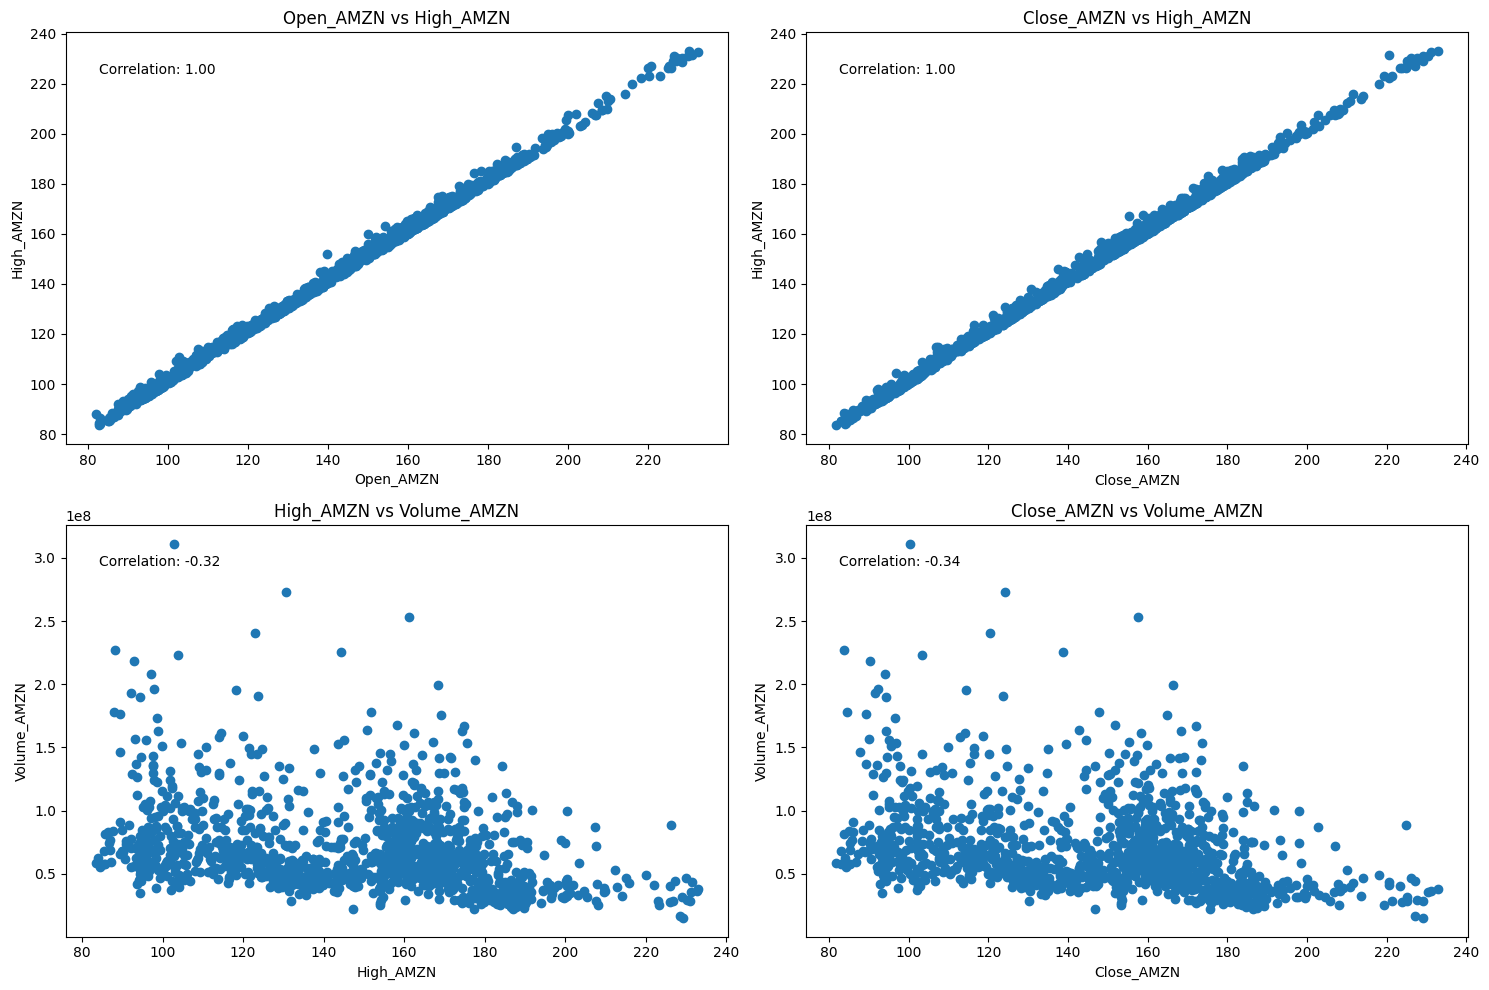

In [ ]:
# prompt: plot these 4 scatterplots for amzn: open vs high, close vs high, high vs volume, close vs volume. Display their respective correlation coefficients as well

import matplotlib.pyplot as plt

# Assuming df_amzn is already defined from the previous code

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Open vs High
axes[0, 0].scatter(df_amzn['Open_AMZN'], df_amzn['High_AMZN'])
axes[0, 0].set_title('Open_AMZN vs High_AMZN')
axes[0, 0].set_xlabel('Open_AMZN')
axes[0, 0].set_ylabel('High_AMZN')
correlation_coefficient = df_amzn['Open_AMZN'].corr(df_amzn['High_AMZN'])
axes[0,0].text(0.05, 0.9, f"Correlation: {correlation_coefficient:.2f}", transform=axes[0,0].transAxes)

# Close vs High
axes[0, 1].scatter(df_amzn['Close_AMZN'], df_amzn['High_AMZN'])
axes[0, 1].set_title('Close_AMZN vs High_AMZN')
axes[0, 1].set_xlabel('Close_AMZN')
axes[0, 1].set_ylabel('High_AMZN')
correlation_coefficient = df_amzn['Close_AMZN'].corr(df_amzn['High_AMZN'])
axes[0,1].text(0.05, 0.9, f"Correlation: {correlation_coefficient:.2f}", transform=axes[0,1].transAxes)

# High vs Volume
axes[1, 0].scatter(df_amzn['High_AMZN'], df_amzn['Volume_AMZN'])
axes[1, 0].set_title('High_AMZN vs Volume_AMZN')
axes[1, 0].set_xlabel('High_AMZN')
axes[1, 0].set_ylabel('Volume_AMZN')
correlation_coefficient = df_amzn['High_AMZN'].corr(df_amzn['Volume_AMZN'])
axes[1,0].text(0.05, 0.9, f"Correlation: {correlation_coefficient:.2f}", transform=axes[1,0].transAxes)

# Close vs Volume
axes[1, 1].scatter(df_amzn['Close_AMZN'], df_amzn['Volume_AMZN'])
axes[1, 1].set_title('Close_AMZN vs Volume_AMZN')
axes[1, 1].set_xlabel('Close_AMZN')
axes[1, 1].set_ylabel('Volume_AMZN')
correlation_coefficient = df_amzn['Close_AMZN'].corr(df_amzn['Volume_AMZN'])
axes[1,1].text(0.05, 0.9, f"Correlation: {correlation_coefficient:.2f}", transform=axes[1,1].transAxes)


plt.tight_layout()
plt.show()


Amazon Scatter Plot Analysis

1. High vs. Open Prices:

- Perfect Correlation: The scatter plot reveals a perfect linear relationship (correlation coefficient of 1.00) between the High and Open prices.

- Potential Cause: This strong correlation suggests that the day’s highest price is closely tied to the opening price, likely due to stable intraday price movements. When investors show strong sentiment at market open, it often results in sustained bullish momentum, driving the stock to new highs during the session.

2. High vs. Close Prices:

- Perfect Correlation: The Close price and High price also exhibit a correlation coefficient of 1.00, forming a clear linear relationship.

- Potential Cause: This pattern indicates that closing prices tend to reach or remain near the day's highest levels, suggesting that Amazon’s stock often experiences upward momentum throughout the trading session. Strong demand and bullish sentiment could keep the stock price elevated until the market closes.

3. High vs. Volume:

- Negative Correlation (-0.32): The scatter plot shows a weak negative correlation between High prices and trading volume.

- Potential Cause: This suggests that higher prices are not necessarily driven by higher trading volumes. Instead, Amazon’s stock might experience price increases on moderate volume due to limited selling pressure. Large volume spikes could be associated with sell-offs or profit-taking events, explaining the inverse relationship.

4. Close vs. Volume:

- Negative Correlation (-0.34): There is a weak negative correlation between closing prices and trading volume.

- Potential Cause: This indicates that days with high trading volume may coincide with declining or stabilizing prices, possibly due to increased market participation from institutional traders, profit-taking, or news-driven volatility. Conversely, when volume is lower, the price tends to be more stable or rise steadily.



## Amazon - Checking Seasonality

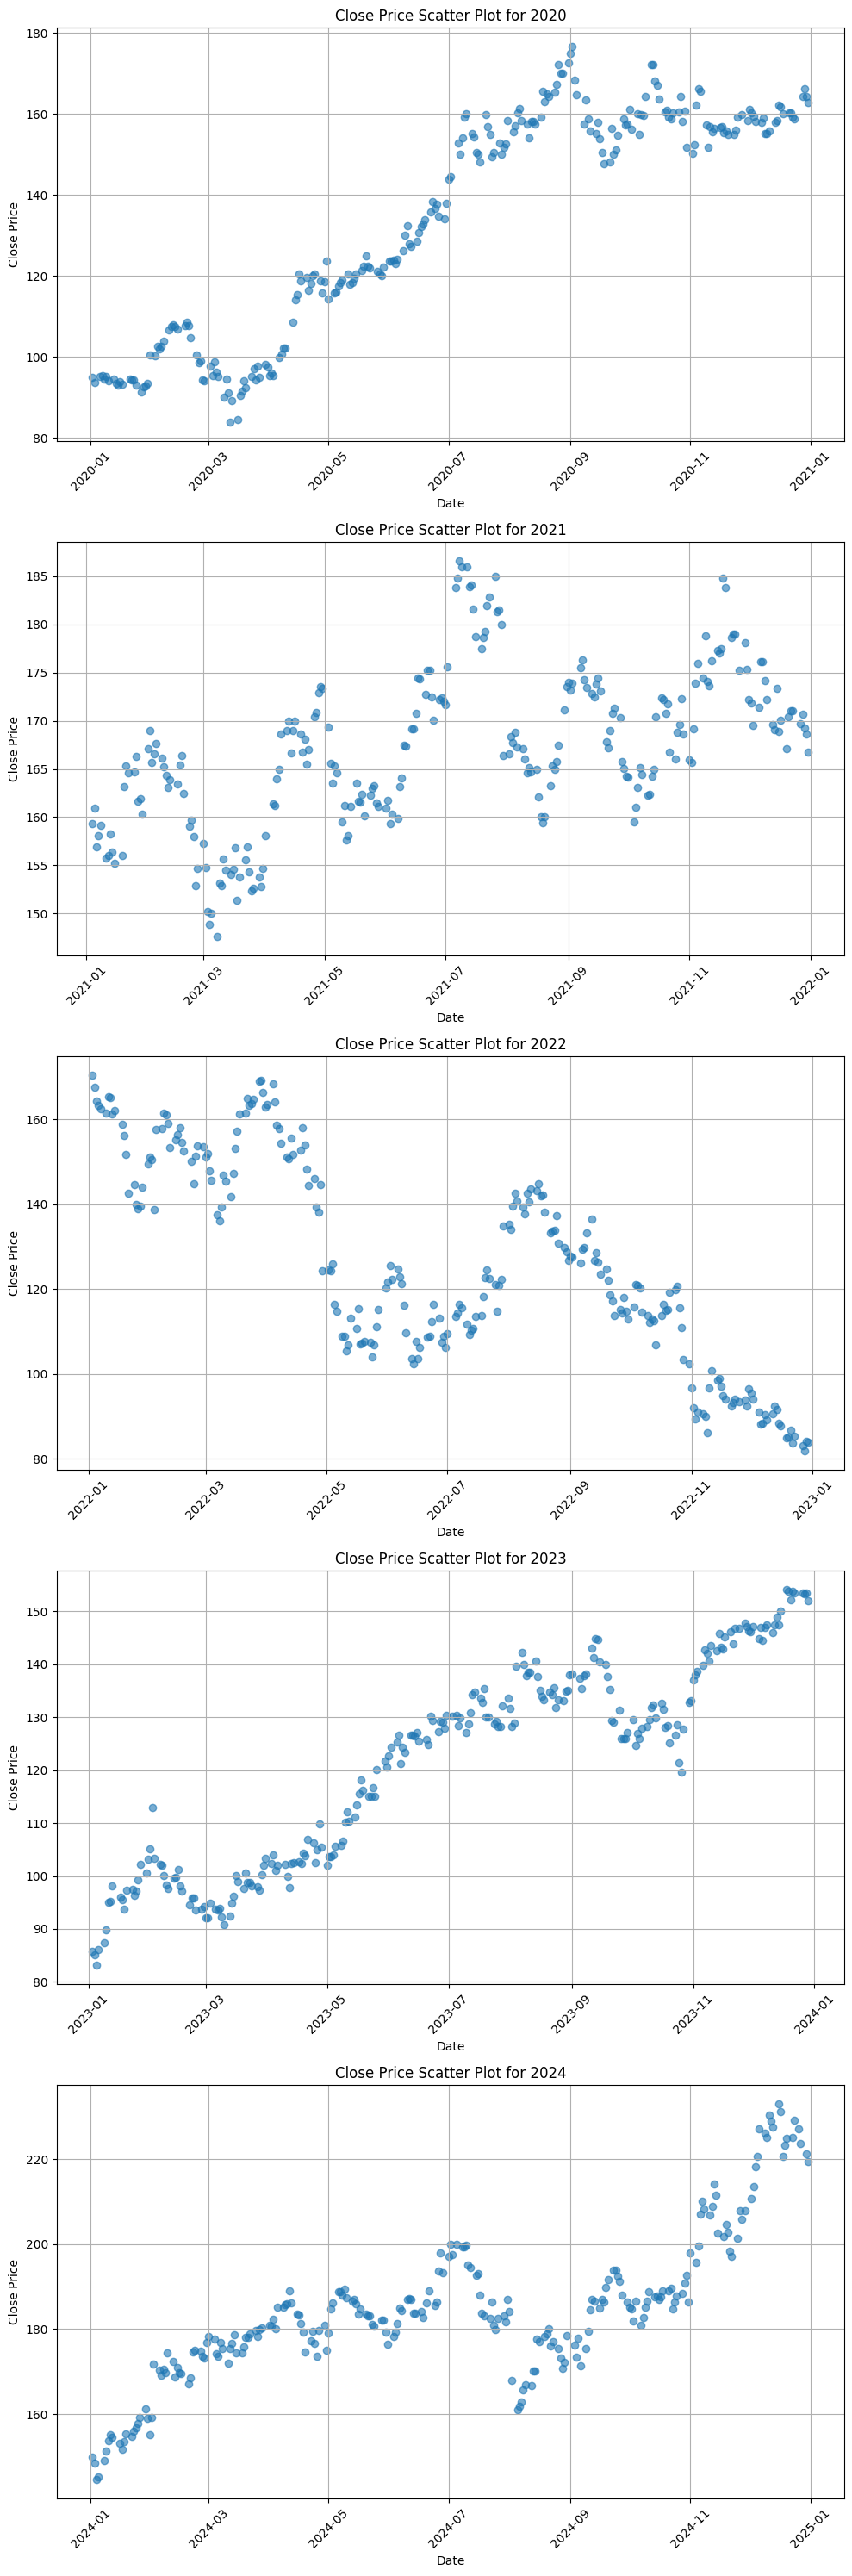

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date_AMZN' is in datetime format
df_amzn['Date_AMZN'] = pd.to_datetime(df_amzn['Date_AMZN'])

# Create a year column
df_amzn['Year'] = df_amzn['Date_AMZN'].dt.year

# Get unique years (ensure only 5 years are selected)
years = sorted(df_amzn['Year'].unique())[:5]  # Select up to 5 years if more exist

# Create subplots for each year
fig, axes = plt.subplots(len(years), 1, figsize=(10, 6 * len(years)))

# Ensure axes is iterable if only one year exists
if len(years) == 1:
    axes = [axes]

# Generate scatter plots for each year
for i, year in enumerate(years):
    year_data = df_amzn[df_amzn['Year'] == year]
    axes[i].scatter(year_data['Date_AMZN'], year_data['Close_AMZN'], alpha=0.6)
    axes[i].set_title(f'Close Price Scatter Plot for {year}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Close Price')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    axes[i].grid(True)

plt.tight_layout()
plt.show()


Several factors may contribute to this seasonality:

1. E-commerce Growth and Consumer Spending:

- Stronger Holiday Sales: Amazon traditionally experiences higher revenue in Q4 due to Black Friday, Cyber Monday, and holiday shopping demand. The stock's upward trend in late 2023 and 2024 may reflect this pattern.

- Prime Day Impact: Amazon’s annual Prime Day event in mid-year drives substantial revenue, often leading to stock price surges around this period.

2. Macroeconomic and Market Conditions:

- Post-Pandemic Normalization (2023-2024): The market rebounded after the 2022 downturn, leading to increased investor confidence in tech stocks, including Amazon.

- Inflation & Fed Policies (2024): Interest rate expectations significantly impact tech stocks. A potential rate cut by the Federal Reserve in late 2024 may have fueled Amazon’s stock rally.

3. Amazon's Financial Performance:

- Consistently Strong Earnings: Amazon’s quarterly earnings reports drive market sentiment. Better-than-expected earnings in Q3 and Q4 of 2024 could have led to the uptrend observed at the end of the year.

- Cloud and AI Expansion: Amazon Web Services (AWS) and AI-driven innovations in logistics and retail continue to attract investors, possibly influencing price movements.

4. Investor and Institutional Behavior:

- Portfolio Rebalancing: Investors often adjust holdings at the end of each fiscal year, influencing stock price trends.

- Institutional Buying Patterns: Hedge funds and large investors may increase Amazon positions based on earnings momentum and economic forecasts for the following year.

Hypothesis: Similar to JP Morgan, the low price that was seen in early-2020 may have signaled investors to buy shares of the stock with anticipation for it to rise in the coming years as investors may speculate that the stock's rise in the coming years.

## Multivariate Scatter Plot

Hypothesis: Similar to JP Morgan's stock, the drasticly low price that occurred in early-2020 may signal investors to buy shares of the stock with anticipation for it to rise in the coming years as investors may speculate that the stock's rise in the coming years.

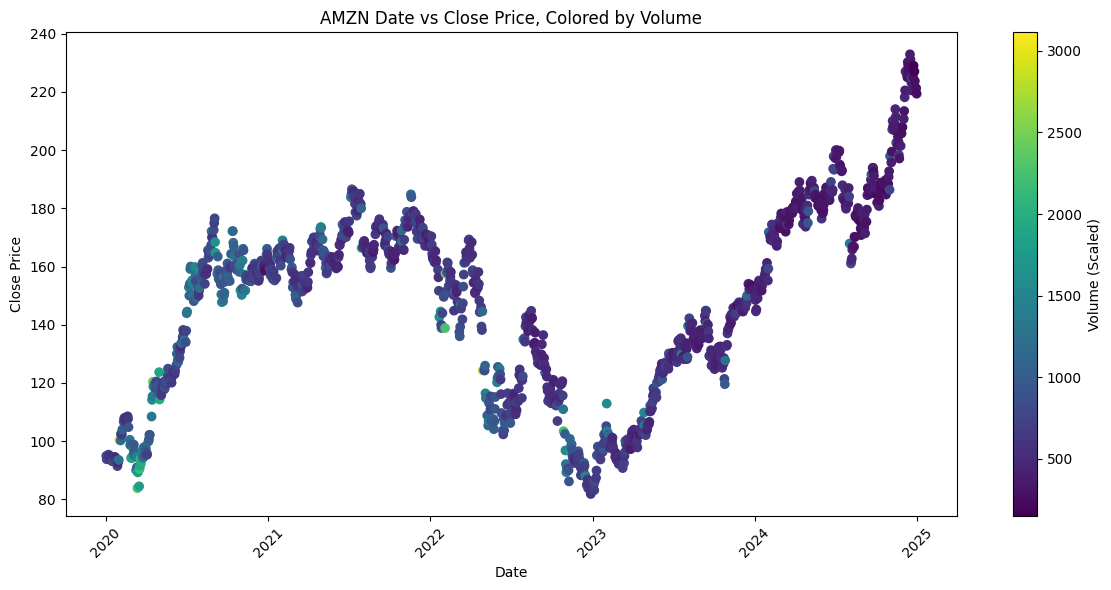

In [ ]:
# prompt: plot a scatter plot date_amzn vs close_amzn, colored by volume_amzn (with provide volume scaling ratio)

import matplotlib.pyplot as plt
# Assuming df_amzn and scaling_ratio are already defined from the previous code

plt.figure(figsize=(12, 6))
plt.scatter(df_amzn['Date_AMZN'], df_amzn['Close_AMZN'], c=df_amzn['Volume_AMZN'] * scaling_ratio, cmap='viridis')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AMZN Date vs Close Price, Colored by Volume')
plt.colorbar(label='Volume (Scaled)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Analysis of Amazon's Stock Performance

1. General Upward Trend

The stock price exhibits a long-term bullish trend, particularly from late 2023 onward, indicating strong fundamentals and growing investor confidence. Contributing factors may include:

- Robust E-commerce and Cloud Growth: Amazon’s dominance in e-commerce and AWS (Amazon Web Services) expansion continue to drive revenue and profitability.

- Macroeconomic Recovery: As consumer spending stabilizes and businesses increase cloud adoption, Amazon benefits from broader economic trends.

- AI and Automation Investments: Increased adoption of AI and automation in logistics and AWS services likely supports long-term revenue growth.

2. No Clear Cyclical Variation

There are no consistent, repeated patterns of rises and falls at fixed intervals, suggesting Amazon's stock is not directly tied to traditional economic cycles. Instead, its movement is influenced by:

- Consumer Spending Trends: E-commerce demand, especially during peak sales periods like holidays, influences stock price fluctuations.

- Cloud Computing Growth: AWS performance plays a key role in driving Amazon’s overall valuation.

- Regulatory and Market Conditions: Antitrust scrutiny and broader tech sector movements contribute to price variations.

3. No Clear Signs of Overall Seasonality

Unlike industries with strong seasonal fluctuations, Amazon’s stock price does not display strict seasonal patterns. However, certain periods may experience temporary spikes or dips due to:

- Prime Day and Holiday Sales: Seasonal revenue boosts from major sales events impact short-term performance.

- Quarterly Earnings Announcements: Strong or weak financial reports can cause stock price fluctuations.

- Market Sentiment on Tech Stocks: Broader tech trends, such as AI-driven innovations, affect investor confidence.

4. No Apparent Irregular Points (Outliers)

There are no extreme deviations or sudden crashes/spikes that suggest unexpected shocks. This indicates:

- Consistent Investor Sentiment: No signs of panic-driven selloffs or irrational exuberance.

- Stable Market Performance: Volume fluctuations align with typical trading patterns, reflecting sustained investor interest in Amazon’s long-term growth.

Lastly, the hypothesis is again proven to be correct as seen in the graph as much volume of shares were traded in early 2020 right when the price of the stock was low. However in addition to that, the same thing did not occur in 2023 when the stock hit another low, this may have happened due to low consumer sentiment at that time as travel and import-export restrictions were high, which worried investors and diswayed them from trading the stock.

# Amazon - Modelling

## Amazon - Modelling (Full Dataset)

### Running ADF, PACF, and ACF Tests

Before modelling the ADF, PACF, and ACF tests will first be conducted to identify the optimum p, q, d values.

ADF Statistic: -1.372054
p-value: 0.595598
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
ADF Statistic after differencing: -35.899763
p-value after differencing: 0.000000
Critical Values after differencing:
	1%: -3.436
	5%: -2.864
	10%: -2.568


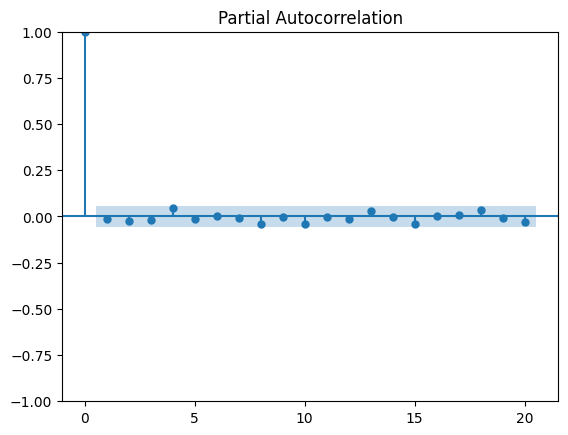

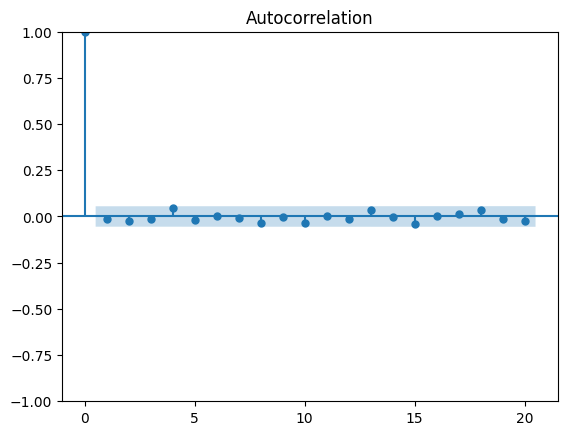

In [ ]:
# prompt: Run ADF, PACF, and ACF tests on df_amzn

import matplotlib.pyplot as plt
# Assuming df_amzn is already defined and contains the 'Close_AMZN' column and 'Date_AMZN'

# Perform the Augmented Dickey-Fuller test
result = adfuller(df_amzn['Close_AMZN'])

# Print the test results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Apply first-order differencing to the 'Close_AMZN' column
df_amzn['Close_AMZN_Diff'] = df_amzn['Close_AMZN'].diff(periods=1)

# Drop the first row which will have NaN after differencing
df_amzn = df_amzn.dropna(subset=['Close_AMZN_Diff'])

# Now you can use df_amzn['Close_AMZN_Diff'] for further analysis or modeling
# For example, re-run the ADF test on the differenced series:

result = adfuller(df_amzn['Close_AMZN_Diff'])
print('ADF Statistic after differencing: %f' % result[0])
print('p-value after differencing: %f' % result[1])
print('Critical Values after differencing:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Plot PACF
plot_pacf(df_amzn['Close_AMZN_Diff'], lags=20)  # Adjust the number of lags as needed
plt.show()

# Plot ACF
plot_acf(df_amzn['Close_AMZN_Diff'], lags=20)
plt.show()


The results of the tests are similar to the first, where differencing had to be applied once. PACF and ACF also displayed a sharp drop after 1, therefore p = 1 and q = 1 will be used.

### Building ARIMA Baseline (Order: 1, 1, 1)

Mean Absolute Error (MAE): 32.83606868333557
Mean Squared Error (MSE): 1368.5239622284964
Root Mean Squared Error (RMSE): 36.99356649781819
R² Score: -3.5238


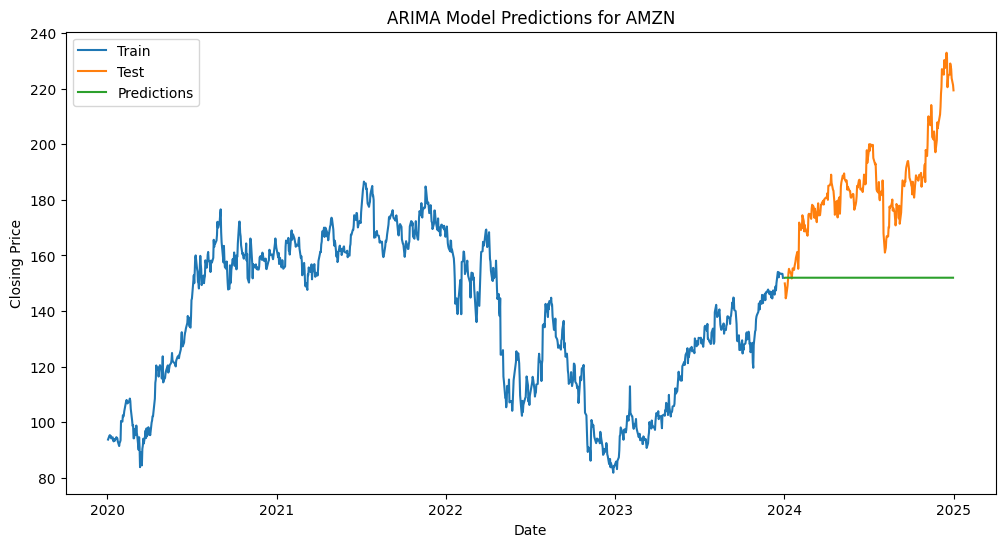

In [ ]:
# prompt: build an ARIMA model on df_amzn with order (1,1,1)

import pandas as pd
import matplotlib.pyplot as plt
# Assuming df_amzn is already defined and preprocessed as in the provided code.
# Convert 'Date_AMZN' to datetime objects if it's not already
df_amzn['Date_AMZN'] = pd.to_datetime(df_amzn['Date_AMZN'])

# Train-test split (adjust split ratio as needed)
train_size = int(len(df_amzn) * 0.8)
train_data, test_data = df_amzn[:train_size], df_amzn[train_size:]

# Build and train the ARIMA model with order (1, 1, 1)
order = (1, 1, 1)
model = ARIMA(train_data['Close_AMZN'], order=order)
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Evaluate the model
mae = mean_absolute_error(test_data['Close_AMZN'], predictions)
mse = mean_squared_error(test_data['Close_AMZN'], predictions)
rmse = sqrt(mse)
r2 = r2_score(test_data['Close_AMZN'], predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2:.4f}')  # R-squared value

# Visualize Predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data, x='Date_AMZN', y='Close_AMZN', label='Train')
sns.lineplot(data=test_data, x='Date_AMZN', y='Close_AMZN', label='Test')
sns.lineplot(x=test_data['Date_AMZN'], y=predictions, label='Predictions')
plt.title('ARIMA Model Predictions for AMZN')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


Despite using the seemingly optimal order of values from the tests, it is apparent that the RMSE, MAE, MSE, and R^2 shows incredibly inaccurate predictions made by the model, making it highly unreliable. More modelling with better hyperparameters is required.

### Finding the Best ARIMA Model (p & q values range from 1 to 5)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # Import warnings module
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Suppress warnings
warnings.filterwarnings("ignore")

# Train-test split (80% train, 20% test)
train_size = int(len(df_amzn) * 0.8)
train_amzn, test_amzn = df_amzn.iloc[:train_size], df_amzn.iloc[train_size:]

# Iterate through p and q values (1 to 20 in steps of 4)
results = []

for p in range(1, 5, 1):
    for q in range(1, 5, 1):
        try:
            # Train ARIMA model with given (p, d, q)
            order = (p, 1, q)  # d=1 assumed based on stationarity check
            model = ARIMA(train_amzn['Close_AMZN'], order=order)
            model_fit = model.fit()

            # Make predictions
            predictions_amzn = model_fit.forecast(steps=len(test_amzn))

            # Evaluate model performance
            mae = mean_absolute_error(test_amzn['Close_AMZN'], predictions_amzn)
            mse = mean_squared_error(test_amzn['Close_AMZN'], predictions_amzn)
            rmse = sqrt(mse)
            r2 = r2_score(test_amzn['Close_AMZN'], predictions_amzn)

            # Store results
            results.append([p, q, mae, mse, rmse, r2])

        except Exception as e:
            print(f"Skipping ARIMA({p}, 1, {q}) due to error: {e}")
            results.append([p, q, None, None, None, None])

# Convert results into a Pandas DataFrame
results_df = pd.DataFrame(results, columns=['p', 'q', 'MAE', 'MSE', 'RMSE', 'R^2'])

# Display results
import IPython.display as display
display.display(results_df)


p  q        MAE          MSE       RMSE       R^2
0   1  1  32.836069  1368.523962  36.993566 -3.523840
1   1  2  32.859158  1370.119530  37.015126 -3.529114
2   1  3  32.800863  1366.110695  36.960935 -3.515862
3   1  4  32.836811  1368.570228  36.994192 -3.523993
4   2  1  32.856996  1369.969936  37.013105 -3.528620
5   2  2  32.841420  1368.865035  36.998176 -3.524967
6   2  3  32.804086  1366.283857  36.963277 -3.516435
7   2  4  32.860218  1370.220985  37.016496 -3.529450
8   3  1  32.803706  1366.304757  36.963560 -3.516504
9   3  2  32.809613  1366.669177  36.968489 -3.517709
10  3  3  33.483838  1414.000584  37.603199 -3.674169
11  3  4  33.984970  1452.292697  38.108958 -3.800749
12  4  1  32.839218  1368.738952  36.996472 -3.524550
13  4  2  32.806797  1366.545068  36.966810 -3.517298
14  4  3  33.855449  1443.811623  37.997521 -3.772713
15  4  4  32.866468  1370.584062  37.021400 -3.530650

The models listed above were created to determine which p and q parameters produced the best results. These values were selected from a range of 1 to 4 based on the PACF & ACF tests, which showed a sudden tick around the 4 mark. Therefore, the values between 1 (where sharp drop occurred) and 4 (where a slight tick occurred) were chosen. No intervals were used due to low amount of p & q values to test.

Order 1, 1, 3 is found to produce predictions with the best evaluation metrics out of the list.

### ARIMA model (Order: 1, 1, 3)

Mean Absolute Error (MAE): 32.80086303488742
Mean Squared Error (MSE): 1366.1106947502067
Root Mean Squared Error (RMSE): 36.96093471153302
R² Score: -3.5159


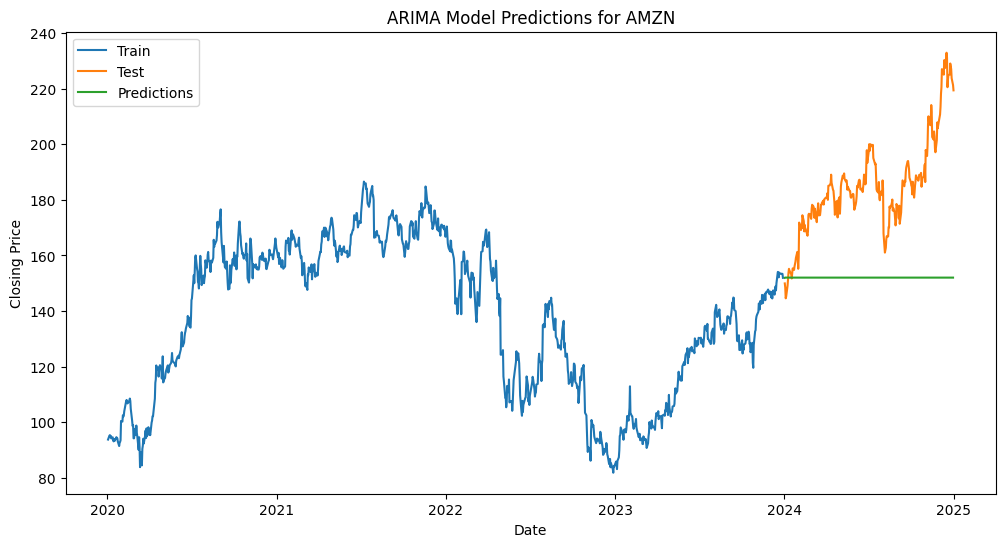

In [ ]:
# prompt: build an ARIMA model on df_amzn with order (1,1,1)

import pandas as pd
import matplotlib.pyplot as plt
# Assuming df_amzn is already defined and preprocessed as in the provided code.
# Convert 'Date_AMZN' to datetime objects if it's not already
df_amzn['Date_AMZN'] = pd.to_datetime(df_amzn['Date_AMZN'])

# Train-test split (adjust split ratio as needed)
train_size = int(len(df_amzn) * 0.8)
train_data, test_data = df_amzn[:train_size], df_amzn[train_size:]

# Build and train the ARIMA model with order (1, 1, 1)
order = (1, 1, 3)
model = ARIMA(train_data['Close_AMZN'], order=order)
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Evaluate the model
mae = mean_absolute_error(test_data['Close_AMZN'], predictions)
mse = mean_squared_error(test_data['Close_AMZN'], predictions)
rmse = sqrt(mse)
r2 = r2_score(test_data['Close_AMZN'], predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2:.4f}')  # R-squared value

# Visualize Predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data, x='Date_AMZN', y='Close_AMZN', label='Train')
sns.lineplot(data=test_data, x='Date_AMZN', y='Close_AMZN', label='Test')
sns.lineplot(x=test_data['Date_AMZN'], y=predictions, label='Predictions')
plt.title('ARIMA Model Predictions for AMZN')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


Despite being the best from the list of models, it is apparent that the RMSE, MAE, MSE, and R^2 shows incredibly inaccurate predictions made by the model, making it highly unreliable.

## Amazon - ARIMA Modelling (2023-2025 Dataset)

 A new dataset of values from years 2023 and 2024 will be used as seasonality was found between these periods, which may allow the models to produce more accurate results.

In [ ]:
import pandas as pd
import yfinance as yf

# Define the ticker symbol for Amazon
ticker_amzn = "AMZN"

# Download AMZN stock data for the given date range
df2_amzn = yf.download(ticker_amzn, start="2023-01-01", end="2025-01-01")

# Reset index to make 'Date' a column
df2_amzn.reset_index(inplace=True)

# Ensure correct column naming in case of MultiIndex
if isinstance(df2_amzn.columns, pd.MultiIndex):
    df2_amzn.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df2_amzn.columns]

# Rename 'Date' column to 'Date_AMZN'
df2_amzn.rename(columns={'Date_': 'Date_AMZN'}, inplace=True)

# Display the first few rows
df2_amzn.head()

[*********************100%***********************]  1 of 1 completed


Date_AMZN  Close_AMZN  High_AMZN   Low_AMZN  Open_AMZN  Volume_AMZN
0 2023-01-03   85.820000  86.959999  84.209999  85.459999     76706000
1 2023-01-04   85.139999  86.980003  83.360001  86.550003     68885100
2 2023-01-05   83.120003  85.419998  83.070000  85.330002     67930800
3 2023-01-06   86.080002  86.400002  81.430000  83.029999     83303400
4 2023-01-09   87.360001  89.480003  87.080002  87.459999     65266100

### Running ADF, PACF, and ACF

Before modelling with the new dataset, the ADF, PACF, and ACF tests will first be conducted to identify the optimum p, q, d values.

ADF Statistic: -0.795626
p-value: 0.820403
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570
ADF Statistic after differencing: -18.300029
p-value after differencing: 0.000000
Critical Values after differencing:
	1%: -3.444
	5%: -2.867
	10%: -2.570


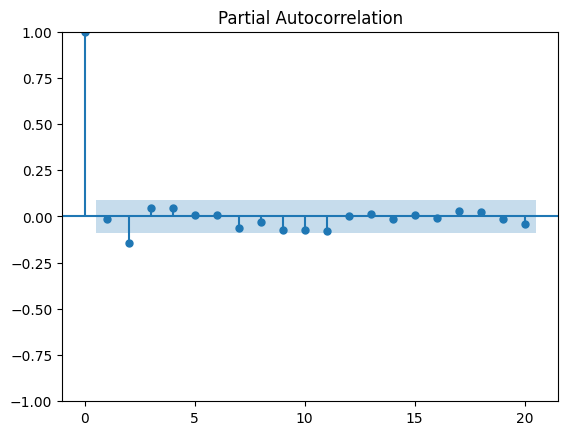

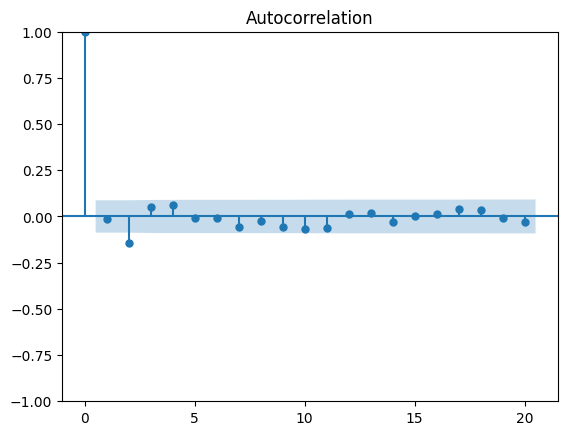

In [ ]:
# prompt: run the adf, pacf, and acf tests

import matplotlib.pyplot as plt
# Assuming df2_amzn is already defined and contains the 'Close_AMZN' column and 'Date_AMZN'

# Perform the Augmented Dickey-Fuller test
result = adfuller(df2_amzn['Close_AMZN'])

# Print the test results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Apply first-order differencing to the 'Close_AMZN' column
df2_amzn['Close_AMZN_Diff'] = df2_amzn['Close_AMZN'].diff(periods=1)

# Drop the first row which will have NaN after differencing
df2_amzn = df2_amzn.dropna(subset=['Close_AMZN_Diff'])

# Now you can use df2_amzn['Close_AMZN_Diff'] for further analysis or modeling
# For example, re-run the ADF test on the differenced series:

result = adfuller(df2_amzn['Close_AMZN_Diff'])
print('ADF Statistic after differencing: %f' % result[0])
print('p-value after differencing: %f' % result[1])
print('Critical Values after differencing:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Plot PACF
plot_pacf(df2_amzn['Close_AMZN_Diff'], lags=20)  # Adjust the number of lags as needed
plt.show()

# Plot ACF
plot_acf(df2_amzn['Close_AMZN_Diff'], lags=20)
plt.show()


The results of the tests are similar to the first, where differencing had to be applied once. PACF and ACF also displayed a sharp drop after 1, therefore p = 1 and q = 1 will be used.

### ARIMA Model (1, 1, 1) - BEST ARIMA

Mean Absolute Error (MAE): 29.857107806463556
Mean Squared Error (MSE): 1216.027288286015
Root Mean Squared Error (RMSE): 34.87158281876541
R² Score: -2.7468


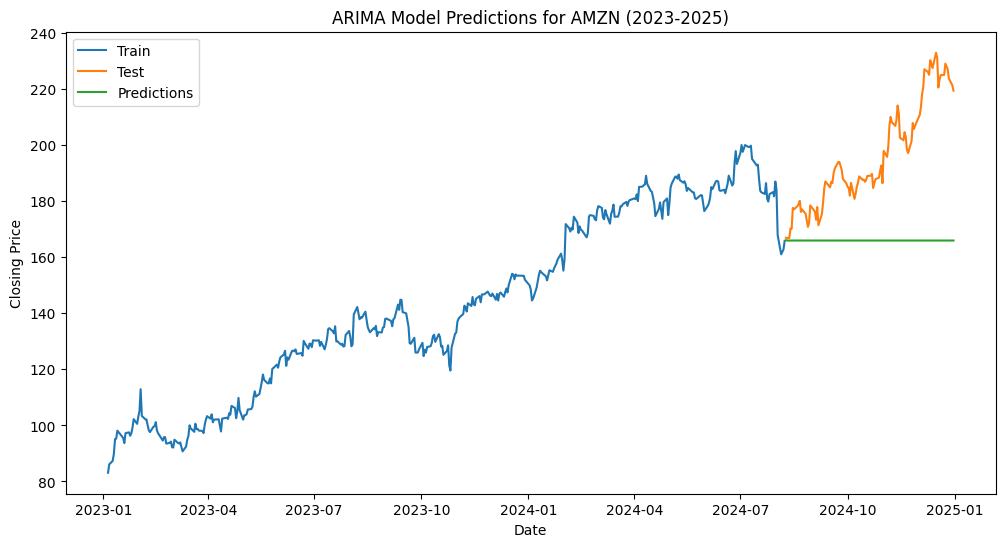

In [ ]:
# prompt: build an arima with (1,1,1) on df2_amzn

import pandas as pd
import matplotlib.pyplot as plt
# Assuming df2_amzn is already defined and preprocessed as in the provided code.
# Convert 'Date_AMZN' to datetime objects if it's not already
df2_amzn['Date_AMZN'] = pd.to_datetime(df2_amzn['Date_AMZN'])

# Set 'Date_AMZN' as the index
df2_amzn = df2_amzn.set_index('Date_AMZN')

# Train-test split (adjust split ratio as needed)
train_size = int(len(df2_amzn) * 0.8)
train_data, test_data = df2_amzn[:train_size], df2_amzn[train_size:]

# Build and train the ARIMA model with order (1, 1, 1)
order = (1, 1, 1)
model = ARIMA(train_data['Close_AMZN'], order=order)
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Evaluate the model
mae = mean_absolute_error(test_data['Close_AMZN'], predictions)
mse = mean_squared_error(test_data['Close_AMZN'], predictions)
rmse = sqrt(mse)
r2 = r2_score(test_data['Close_AMZN'], predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2:.4f}')  # R-squared value

# Visualize Predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data, x=train_data.index, y='Close_AMZN', label='Train')
sns.lineplot(data=test_data, x=test_data.index, y='Close_AMZN', label='Test')
sns.lineplot(x=test_data.index, y=predictions, label='Predictions')
plt.title('ARIMA Model Predictions for AMZN (2023-2025)')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


1. Prediction Performance

- MAE (29.86): The average prediction error remains high.

- MSE (1216.03) and RMSE (34.87): The errors continue to be significant, showing the model's inability to closely follow actual price movements.

- R² Score (-2.7468): This negative score suggests that the model is worse than a simple mean benchmark. It fails to explain the stock’s variability.

2. Observations:

- Upward Trend Captured but Underestimated: The model captures some upward movement but fails to follow the volatility of actual test prices.

- Consistently Lower Predictions: The dashed green forecasted line remains well below actual prices, indicating underestimation.

- Seasonality Not Well Represented: The model does not seem to account for sharp increases in the actual AMZN stock price.

### Finding the Best ARIMA Model (p & q values range from 1 to 5)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # Import warnings module
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Suppress warnings
warnings.filterwarnings("ignore")

# Train-test split (80% train, 20% test)
train_size = int(len(df2_amzn) * 0.8)
train_amzn, test_amzn = df2_amzn.iloc[:train_size], df2_amzn.iloc[train_size:]

# Iterate through p and q values (1 to 5 in steps of 1)
results = []

for p in range(1, 5, 1):
    for q in range(1, 5, 1):
        try:
            # Train ARIMA model with given (p, d, q)
            order = (p, 1, q)  # d=1 assumed based on stationarity check
            model = ARIMA(train_amzn['Close_AMZN'], order=order)
            model_fit = model.fit()

            # Make predictions
            predictions_amzn = model_fit.forecast(steps=len(test_amzn))

            # Evaluate model performance
            mae = mean_absolute_error(test_amzn['Close_AMZN'], predictions_amzn)
            mse = mean_squared_error(test_amzn['Close_AMZN'], predictions_amzn)
            rmse = sqrt(mse)
            r2 = r2_score(test_amzn['Close_AMZN'], predictions_amzn)

            # Store results
            results.append([p, q, mae, mse, rmse, r2])

        except Exception as e:
            print(f"Skipping ARIMA({p}, 1, {q}) due to error: {e}")
            results.append([p, q, None, None, None, None])

# Convert results into a Pandas DataFrame
results_df = pd.DataFrame(results, columns=['p', 'q', 'MAE', 'MSE', 'RMSE', 'R^2'])

# Display results
import IPython.display as display
display.display(results_df)


p  q        MAE          MSE       RMSE       R^2
0   1  1  29.857108  1216.027288  34.871583 -2.746770
1   1  2  30.333108  1244.878717  35.282839 -2.835665
2   1  3  30.995863  1285.452549  35.853208 -2.960680
3   1  4  30.894972  1278.585902  35.757320 -2.939522
4   2  1  30.446823  1251.715020  35.379585 -2.856729
5   2  2  30.210742  1237.262204  35.174738 -2.812198
6   2  3  30.545656  1256.900017  35.452786 -2.872705
7   2  4  30.586563  1259.567591  35.490387 -2.880924
8   3  1  30.813567  1274.122176  35.694848 -2.925769
9   3  2  30.569145  1258.469532  35.474914 -2.877541
10  3  3  29.912275  1219.643390  34.923393 -2.757911
11  3  4  30.595894  1259.930833  35.495504 -2.882043
12  4  1  30.387241  1247.707446  35.322903 -2.844381
13  4  2  30.532425  1256.601736  35.448579 -2.871786
14  4  3  30.550312  1257.462578  35.460719 -2.874438
15  4  4  30.253680  1238.833694  35.197069 -2.817040

This confirms that the order 1,1,1 is produces the best ARIMA model.

## Amazon - SARIMA Modelling

### SARIMA model with Full Dataset (Order: 1, 1, 1)

Mean Absolute Error (MAE): 25.717838353249736
Mean Squared Error (MSE): 858.8766179784847
Root Mean Squared Error (RMSE): 29.30659683379298
R² Score: -1.8391


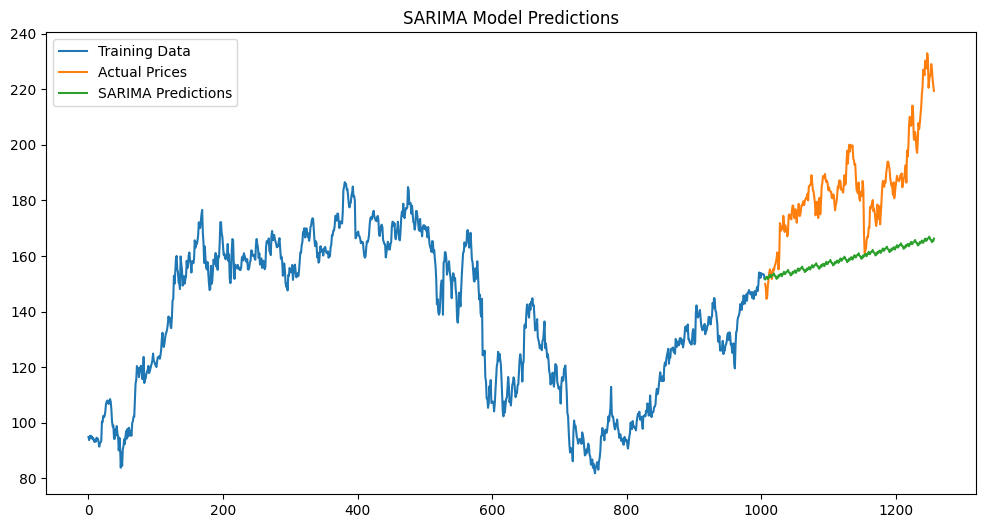

In [ ]:
# prompt: build a SARIMA model with df_amzn

import matplotlib.pyplot as plt
# Assuming df_amzn is your DataFrame and 'Date_AMZN' is your datetime index
# and 'Close_AMZN' is the column you want to model.

# Example SARIMA model (adjust the order (p, d, q) and seasonal order (P, D, Q, s) accordingly):

# Train-test split
train_size = int(len(df_amzn) * 0.8)
train_data, test_data = df_amzn[:train_size], df_amzn[train_size:]


# Set 'Date_AMZN' as index if not already set
df_amzn = df_amzn.set_index('Date_AMZN')

# Fit the SARIMA model
model = SARIMAX(train_data['Close_AMZN'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 21)) #Example order and seasonal order. Tune these parameters.
model_fit = model.fit()

# Make predictions
predictions = model_fit.get_forecast(steps=len(test_data))
predictions_ci = predictions.conf_int()
predictions = predictions.predicted_mean

# Evaluate the model
mae = mean_absolute_error(test_data['Close_AMZN'], predictions)
mse = mean_squared_error(test_data['Close_AMZN'], predictions)
rmse = sqrt(mse)
r2 = r2_score(test_data['Close_AMZN'], predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2:.4f}')  # R-squared value

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data['Close_AMZN'], label='Training Data')
plt.plot(test_data['Close_AMZN'], label='Actual Prices')
plt.plot(predictions, label='SARIMA Predictions')
plt.legend()
plt.title('SARIMA Model Predictions')
plt.show()


Despite being the best from the list of models, it is apparent that the RMSE, MAE, MSE, and R^2 shows incredibly inaccurate predictions made by the model, making it highly unreliable.

### SARIMA model with 2023-2025 Dataset (Order: 1, 1, 1) - BEST SARIMA

Mean Absolute Error (MAE): 29.35
Mean Squared Error (MSE): 1102.68
Root Mean Squared Error (RMSE): 33.21
R² Score: -2.3398


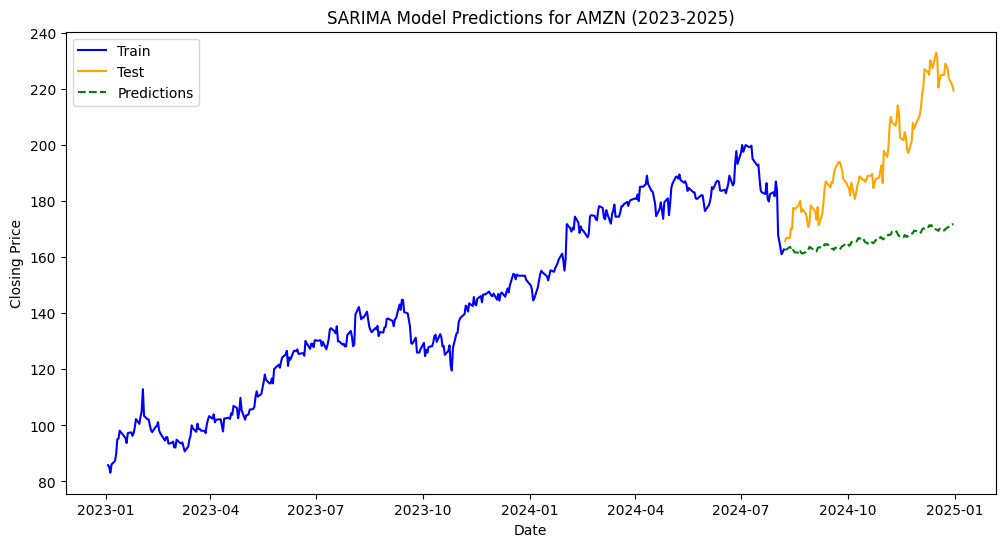

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Suppress warnings
warnings.filterwarnings("ignore")

# Set 'Date_AMZN' as the index for df2_amzn
df2_amzn = df2_amzn.set_index('Date_AMZN')

# Train-test split (80% train, 20% test)
train_size = int(len(df2_amzn) * 0.8)
train_data, test_data = df2_amzn[:train_size], df2_amzn[train_size:]

# Define the SARIMA model order (p, d, q) x (P, D, Q, s)
order = (1, 1, 1)  # Example order, adjust as needed
seasonal_order = (1, 1, 1, 21)  # Example seasonal order, adjust as needed

# Build and train the SARIMA model
model = SARIMAX(train_data['Close_AMZN'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Evaluate the model
mae = mean_absolute_error(test_data['Close_AMZN'], predictions)
mse = mean_squared_error(test_data['Close_AMZN'], predictions)
rmse = sqrt(mse)
r2 = r2_score(test_data['Close_AMZN'], predictions)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R² Score: {r2:.4f}')  # R-squared value

# Visualize Predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data, x=train_data.index, y='Close_AMZN', label='Train', color='blue')
sns.lineplot(data=test_data, x=test_data.index, y='Close_AMZN', label='Test', color='orange')
sns.lineplot(x=test_data.index, y=predictions, label='Predictions', color='green', linestyle='dashed')
plt.title('SARIMA Model Predictions for AMZN (2023-2025)')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()


1. Model Performance

- MAE (29.35): The average absolute error is quite high.

- MSE (1102.68) and RMSE (33.21): These indicate a large variance in prediction errors.

- R² Score (-2.3398): A very poor fit, meaning the model struggles to explain
AMZN's price movements.

2. Observations on Predictions

- Upward Trend Captured but Underestimated: The model captures some upward movement but fails to follow the volatility of actual test prices.

- Consistently Lower Predictions: The dashed green forecasted line remains well below actual prices, indicating underestimation.

- Seasonality Not Well Represented: The model does not seem to account for sharp increases in the actual AMZN stock price.

This appears to be the best model to predict JPM's stock prices in comparison to the previous models.

# Portfolio Construction

## Portfolio EDA

In [ ]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Define the ticker symbols
tickers = ['AMZN', 'NVDA', 'JPM']

# Download historical data
data = yf.download(tickers, start="2022-01-01", end="2023-01-01")


[*********************100%***********************]  3 of 3 completed


In [ ]:
df_stocks.head()

Date_Stocks  Close_AMZN   Close_JPM  Close_NVDA  High_AMZN    High_JPM  \
0  2020-01-02   94.900497  121.477203    5.972710  94.900497  121.485822   
1  2020-01-03   93.748497  119.874123    5.877112  94.309998  120.645323   
2  2020-01-06   95.143997  119.778854    5.901756  95.184502  119.813523   
3  2020-01-07   95.343002  117.742516    5.973208  95.694504  119.458218   
4  2020-01-08   94.598503  118.661034    5.984411  95.550003  119.215605   

   High_NVDA   Low_AMZN     Low_JPM  Low_NVDA  Open_AMZN    Open_JPM  \
0   5.972710  93.207497  119.901588  5.893293  93.750000  120.357913   
1   5.920928  93.224998  118.782314  5.828067  93.224998  119.146251   
2   5.906984  93.000000  118.279781  5.757611  93.000000  118.331770   
3   6.019016  94.601997  117.690527  5.885077  95.224998  118.955636   
4   6.025738  94.321999  117.499902  5.928894  94.902000  117.586546   

   Open_NVDA  Volume_AMZN  Volume_JPM  Volume_NVDA  
0   5.943831     80580000    10803700    237536000  
1   5.852963     75288000    10386800    205384000  
2   5.783751     81236000    10259000    262636000  
3   5.930138     80898000    10531300    314856000  
4   5.968976     70160000     9695300    277108000

## Correlation Matrix

[*********************100%***********************]  3 of 3 completed


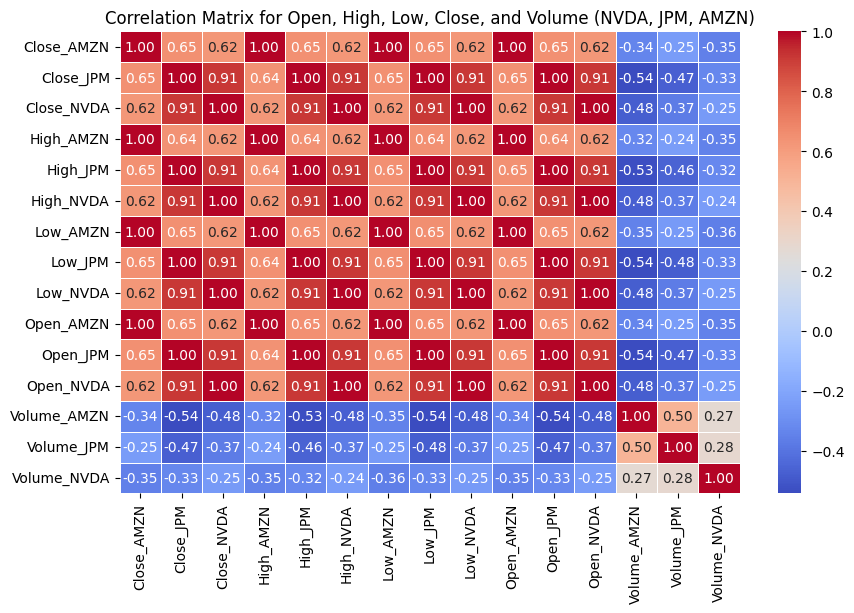

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

# Define tickers
tickers = ["NVDA", "JPM", "AMZN"]

# Download stock data for the given date range
df_stocks = yf.download(tickers, start="2020-01-01", end="2025-01-01")

# Reset index to make 'Date' a column
df_stocks.reset_index(inplace=True)

# Drop 'Adj Close' column
df_stocks.drop(columns=[('Adj Close', 'NVDA'), ('Adj Close', 'JPM'), ('Adj Close', 'AMZN')], inplace=True, errors='ignore')

# Flatten MultiIndex columns (if applicable)
if isinstance(df_stocks.columns, pd.MultiIndex):
    df_stocks.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_stocks.columns]

# Rename 'Date' column
df_stocks.rename(columns={'Date_': 'Date_Stocks'}, inplace=True)

# Select only Open, High, Low, Close, and Volume columns for correlation
columns_of_interest = [col for col in df_stocks.columns if any(x in col for x in ['Open', 'High', 'Low', 'Close', 'Volume'])]
df_corr = df_stocks[columns_of_interest].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Open, High, Low, Close, and Volume (NVDA, JPM, AMZN)")
plt.show()


This correlation matrix shows the relationships between the Open, High, Low, Close prices, and Volume for NVDA, JPM, and AMZN. Here's a brief analysis:

1. Strong Positive Correlation Within Each Stock:

The Open, High, Low, and Close prices for each stock (AMZN, JPM, NVDA) are highly correlated with each other (correlation ~1.00). This is expected, as these values move closely together during a trading session.

2. High Correlation Between JPM and NVDA:

Close, Open, High, and Low prices of JPM and NVDA show strong positive correlations (~0.91). This suggests that these two stocks often move in the same direction, possibly reflecting broader market trends.
Moderate Correlation Between AMZN and Other Stocks:

AMZN's price metrics have moderate correlations (~0.62–0.65) with both NVDA and JPM. This suggests some co-movement but less tightly linked compared to NVDA and JPM.

3. Volume Shows Negative or Weak Correlation:

Trading volume for all three stocks has weak to moderately negative correlations with prices (-0.25 to -0.54). This indicates that higher volumes don’t necessarily align with higher prices and could reflect profit-taking or increased volatility.

4. Cross-Sector Insight:

JPM (financial sector) has stronger correlations with NVDA (technology sector) than with AMZN (consumer sector). This might suggest that broader market conditions, rather than sector-specific factors, drive their price movements.

## Multivariate Analysis

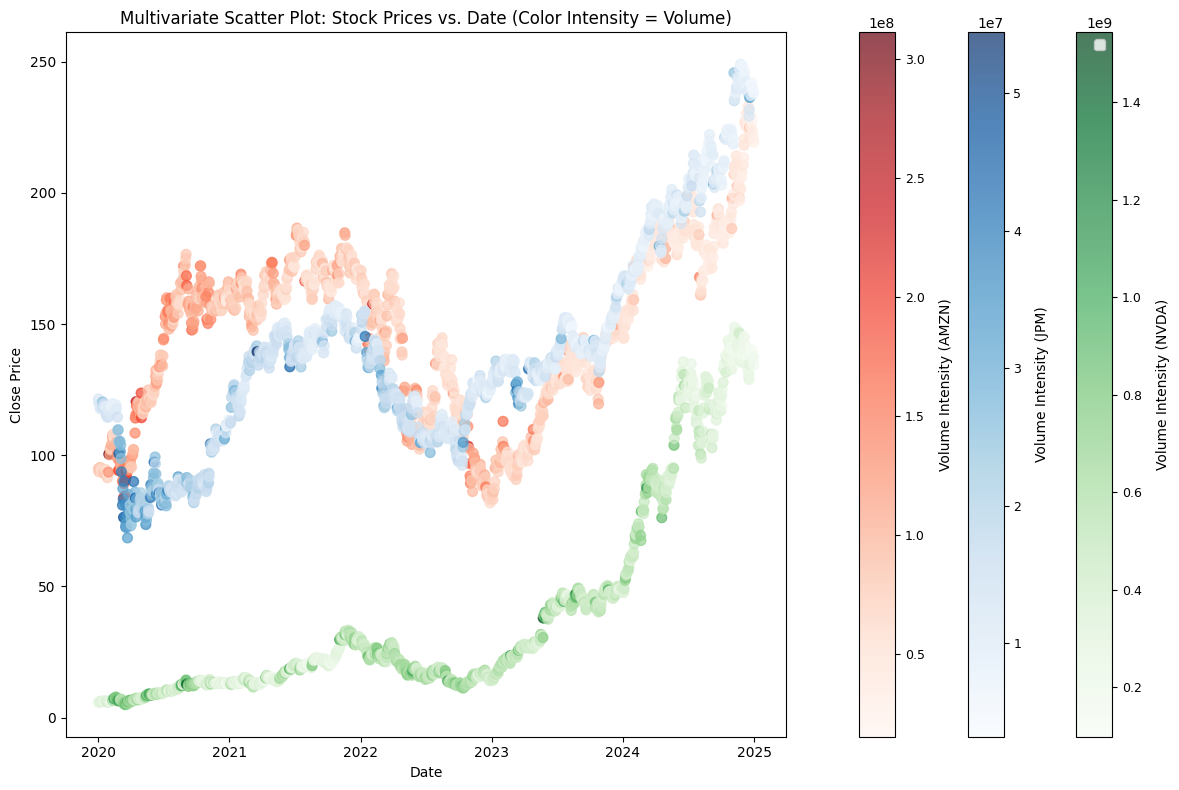

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.gridspec as gridspec

# Create figure with a wider layout for better spacing
fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(1, 4, width_ratios=[4, 0.2, 0.2, 0.2])  # Adjust widths for colorbars

ax = plt.subplot(gs[0])  # Main plot area

colors = ['red', 'blue', 'green']
stock_names = ['AMZN', 'JPM', 'NVDA']
cmaps = ['Reds', 'Blues', 'Greens']

scatters = []

for i, stock in enumerate(stock_names):
    date_col = 'Date_Stocks'
    close_col = f'Close_{stock}'
    volume_col = f'Volume_{stock}'

    norm = mcolors.Normalize(vmin=df_stocks[volume_col].min(), vmax=df_stocks[volume_col].max())

    scatter = ax.scatter(df_stocks[date_col], df_stocks[close_col],
                         c=df_stocks[volume_col], cmap=cmaps[i], label=stock,
                         s=50, alpha=0.7, norm=norm)

    scatters.append(scatter)

    # Define a separate colorbar axis
    cbar_ax = plt.subplot(gs[i + 1])
    cbar = plt.colorbar(scatter, cax=cbar_ax)
    cbar.set_label(f'Volume Intensity ({stock})', labelpad=10, fontsize=10)
    cbar.ax.tick_params(labelsize=9)

# Formatting
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('Multivariate Scatter Plot: Stock Prices vs. Date (Color Intensity = Volume)')
plt.xticks(rotation=45)
plt.legend()
plt.subplots_adjust(wspace=0.5)  # Adjust spacing between colorbars and the main plot
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for colorbars

plt.show()


Key Observations:

1. Price Trends:

- AMZN (Red): Experienced significant price growth from 2020 to 2021, followed by a decline through 2022 and partial recovery in 2024. Recent prices are climbing again.

- JPM (Blue): Showed a similar pattern to AMZN but with less volatility. Prices peaked in 2022, dipped, and are now on a steady upward trend.

- NVDA (Green): Had a significant upward trend, especially from late 2023 to 2024, reflecting the stock's strong performance in recent years.

2.Volume Intensity:

- AMZN: Spikes in volume coincide with price peaks and dips, suggesting high activity during volatility.

- JPM: Volume remained moderate but surged during price declines.

- NVDA: Volume increased alongside price growth, indicating strong buying interest.

3. Market Sentiment:

NVDA appears to have the strongest bullish trend with sustained volume, while AMZN and JPM show more cyclical behavior.

# 100 USD Portfolio Allocation

In [ ]:
import pandas as pd

# Extract the latest closing prices
latest_prices = df_stocks.iloc[-1][["Close_AMZN", "Close_JPM", "Close_NVDA"]]

# Define portfolio allocation percentages
allocation = {"AMZN": 0.35, "JPM": 0.35, "NVDA": 0.30}
portfolio_value = 100  # Total investment amount

# Calculate number of shares for each stock
shares_allocated = {stock: (portfolio_value * allocation[stock]) / latest_prices[f"Close_{stock}"] for stock in allocation}

# Convert to DataFrame
portfolio_df = pd.DataFrame.from_dict(shares_allocated, orient="index", columns=["Shares Purchased"])

# Ensure investment calculation is correct
portfolio_df["Stock Price ($)"] = latest_prices.values  # Assign stock prices
portfolio_df["Investment ($)"] = portfolio_df["Shares Purchased"] * portfolio_df["Stock Price ($)"]

# Display fixed portfolio allocation
print("Portfolio Allocation:\n", portfolio_df)


Portfolio Allocation:
       Shares Purchased Stock Price ($) Investment ($)
AMZN          0.159533      219.389999           35.0
JPM           0.146764      238.478348           35.0
NVDA          0.223397      134.289993           30.0


In [ ]:
import numpy as np

# Step 1: Compute daily returns
returns = df_stocks[['Close_AMZN', 'Close_JPM', 'Close_NVDA']].pct_change().dropna()

# Step 2: Expected Return (Mean of Daily Returns)
expected_returns = returns.mean()

# Step 3: Portfolio Volatility (Standard Deviation of Returns)
cov_matrix = returns.cov()  # Covariance matrix of returns

# Portfolio Weights (Based on Initial Allocation)
weights = np.array([0.35, 0.35, 0.30])  # AMZN, JPM, NVDA

# Expected Portfolio Return
expected_portfolio_return = np.dot(weights, expected_returns)

# Portfolio Standard Deviation (Risk)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Step 4: Sharpe Ratio Calculation (Assume 3% Annual Risk-Free Rate -> 0.012% Daily)
risk_free_rate = 0.00012  # 3% annual risk-free rate converted to daily

sharpe_ratio = (expected_portfolio_return - risk_free_rate) / portfolio_volatility

# Display Results
expected_portfolio_return, portfolio_volatility, sharpe_ratio


(0.0014991107254470563, 0.01973110094547067, 0.06989527493972074)